# CUSTOMER SEGMENTATION AND DEPOSIT DETECTION SYSTEM CASE STUDY - NEXUS BANK


# Background
Nexus Bank is a financial institution dedicated to delivering unparalleled banking services to our clients. The Bank's mission is to establish enduring relationships with our customers by providing tailored financial solutions that align with their individual needs and goals. In the last board meeting, the directors where unsatisfied with their current situation
and need to optimize the operations at Nexus bank.


# Objective

Due to the discussions at the recent board meeting, the objective of this case study is the need to improve efficiently and optimize the operations at Nexus bank. This will be achieved by gaining insights into the bank, leverage on the power of data and anticipate customer behavior.

We will carry out tasks to identify patterns and trends in customer behavior to decipher if customer demographics such as age, educational level e.t.c influences customers attitude toward defaulting. The board specifically wants to anticipate future customer behavior and know the likelihood of subscription to term deposits from customers.

We also want to understand how effective their campaigns are and thus develop marketing campaigns to reach specific customer segments. By analyzing customer behaviors, loan trends, and marketing campaign effectiveness, Nexus wants to optimize its operations, mitigate risks/ loan defaults, and improve customer subscription to term deposits.

# Methodology

The methodology used in this case study involves the following steps:

Data cleaning and preprocessing: The first step is to clean and preprocess the data, including handling missing values, removing outliers, and transforming variables as necessary.

Exploratory data analysis: Next, we will perform exploratory data analysis to gain insights into the data, such as identifying trends and patterns, and identifying correlations between variables.

Feature engineering: Based on the insights gained from the exploratory data analysis, we will perform feature engineering to select the most relevant features for predicting customer behavior and transform them as necessary.

Model selection and training: We will then select a suitable machine learning algorithm for predicting customer behavior, such as linear regression or a decision tree, and train the model on the preprocessed data.

Model evaluation and fine-tuning: We will evaluate the performance of the model using various metrics, such as mean absolute error and mean squared error, and fine-tune the model as necessary to improve its accuracy.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd   #used for Data preprocessing
import matplotlib.pyplot as plt   # used for Data Visualization
%matplotlib inline
import seaborn as sns   # used for Data Visualization
from collections import Counter # used for counting
import missingno as msno #used for Missing Data ; Data Visualisation
sns.set()
from subprocess import check_output #for viewing profile report
import warnings
warnings.filterwarnings("ignore")
import locale
import matplotlib.ticker as mticker
plt.style.use('ggplot')
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
capstone= pd.read_csv(r"C:\Users\opeye\Documents\Data Science\10Alytics\Capstone Project\bank.csv")
capstone.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [3]:
# To show columns and rows and general info of data
capstone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
capstone.shape

(45211, 17)

In [5]:
capstone.duplicated().sum()

0

In [6]:
#To checkk description of numerical data
capstone.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [7]:
#To check description of categorical and numerical data
capstone.describe(include='all').T

count unique          top   freq         mean          std  \
age        45211.0    NaN          NaN    NaN     40.93621    10.618762   
job          45211     12  blue-collar   9732          NaN          NaN   
marital      45211      3      married  27214          NaN          NaN   
education    45211      4    secondary  23202          NaN          NaN   
default      45211      2           no  44396          NaN          NaN   
balance    45211.0    NaN          NaN    NaN  1362.272058  3044.765829   
housing      45211      2          yes  25130          NaN          NaN   
loan         45211      2           no  37967          NaN          NaN   
contact      45211      3     cellular  29285          NaN          NaN   
day        45211.0    NaN          NaN    NaN    15.806419     8.322476   
month        45211     12          may  13766          NaN          NaN   
duration   45211.0    NaN          NaN    NaN    258.16308   257.527812   
campaign   45211.0    NaN          NaN    NaN     2.763841     3.098021   
pdays      45211.0    NaN          NaN    NaN    40.197828   100.128746   
previous   45211.0    NaN          NaN    NaN     0.580323     2.303441   
poutcome     45211      4      unknown  36959          NaN          NaN   
deposit      45211      2           no  39922          NaN          NaN   

              min    25%    50%     75%       max  
age          18.0   33.0   39.0    48.0      95.0  
job           NaN    NaN    NaN     NaN       NaN  
marital       NaN    NaN    NaN     NaN       NaN  
education     NaN    NaN    NaN     NaN       NaN  
default       NaN    NaN    NaN     NaN       NaN  
balance   -8019.0   72.0  448.0  1428.0  102127.0  
housing       NaN    NaN    NaN     NaN       NaN  
loan          NaN    NaN    NaN     NaN       NaN  
contact       NaN    NaN    NaN     NaN       NaN  
day           1.0    8.0   16.0    21.0      31.0  
month         NaN    NaN    NaN     NaN       NaN  
duration      0.0  103.0  180.0   319.0    4918.0  
campaign      1.0    1.0    2.0     3.0      63.0  
pdays        -1.0   -1.0   -1.0    -1.0     871.0  
previous      0.0    0.0    0.0     0.0     275.0  
poutcome      NaN    NaN    NaN     NaN       NaN  
deposit       NaN    NaN    NaN     NaN       NaN

In [8]:
# To check description of categorical data
capstone.describe(include=['object','bool'])

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome deposit  
count   45211    45211   45211  
unique     12        4       2  
top       may  unknown      no  
freq    13766    36959   39922

In [9]:
from pandas_profiling import ProfileReport

In [10]:
capstone_profile = ProfileReport(capstone, title='capstone_Before_data_cleaning')
capstone_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# To make a copy
capstone1=capstone.copy()
capstone1.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may       261         1     -1         0  unknown      no  
1    5   may       151         1     -1         0  unknown      no

In [12]:
#to check unique value in each column

for i in capstone1.columns.tolist():
    print(i, '\n\n', capstone[i].unique())
    print('\n ------------------------------------------------------------------------------------------------------')

age 

 [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

 ------------------------------------------------------------------------------------------------------
job 

 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

 ------------------------------------------------------------------------------------------------------
marital 

 ['married' 'single' 'divorced']

 ------------------------------------------------------------------------------------------------------
education 

 ['tertiary' 'secondary' 'unknown' 'primary']

 ------------------------------------------------------------------------------------------------------
default 

 ['no' 'yes']

 -----------------------------------------------------

In [13]:
#to replace unknown data with top result in categorical data (job)
capstone1.loc[capstone1['job'] == 'unknown', 'job'] = 'blue-collar'

In [14]:
#to replace unknown data with top result in categorical data (education)
capstone1.loc[capstone1['education'] == 'unknown', 'education'] = 'secondary'

In [15]:
#to replace other data with top result in categorical data (unknown)
capstone1.loc[capstone1['poutcome'] == 'other', 'poutcome'] = 'unknown'

In [16]:
capstone1.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [17]:
# To define age group 
def age_group(x):
    if x <= 25:
        return '<=25 Young Adult'
    elif x <= 40:
        return '25-40 Adult'
    elif x <=50:
        return '41-50 Old Adult'
    else:
        return '>=51 Elders'
    
#Apply function to the data
capstone1['age_group'] = capstone1['age'].apply(age_group)
capstone1.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  \
0    5   may       261         1     -1         0  unknown      no   
1    5   may       151         1     -1         0  unknown      no   

         age_group  
0      >=51 Elders  
1  41-50 Old Adult

In [18]:
# To define pdays on months
def pmonths(x):
    if x <= 30:
        return 'In Month 1'
    elif x <= 60:
        return 'In Month 2'
    elif x <=90:
        return 'In Month 3'
    elif x <= 120:
        return 'In Month 4'
    elif x <=150:
        return 'In Month 5'
    elif x <= 180:
        return 'In Month 6'  
    else:
        return 'After 6 Months'
    
#Apply function to the data
capstone1['pmonths'] = capstone1['pdays'].apply(pmonths)
capstone1.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  \
0    5   may       261         1     -1         0  unknown      no   
1    5   may       151         1     -1         0  unknown      no   

         age_group     pmonths  
0      >=51 Elders  In Month 1  
1  41-50 Old Adult  In Month 1

In [19]:
# To define duration in Minutes
def duratmins(x):
    if x <= 600:
        return '<=10 Mins'
    elif x <= 1200:
        return '11-20 Mins'
    elif x <= 1800:
        return '21-30 Mins ' 
    else:
        return 'Over 30 Mins'
    
#Apply function to the data
capstone1['duratmins'] = capstone1['duration'].apply(duratmins)
capstone1.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  \
0    5   may       261         1     -1         0  unknown      no   
1    5   may       151         1     -1         0  unknown      no   

         age_group     pmonths  duratmins  
0      >=51 Elders  In Month 1  <=10 Mins  
1  41-50 Old Adult  In Month 1  <=10 Mins

In [20]:
def perc_plot(plot,feature):
  total = len(feature)
  for p in plot.patches:
    perc = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(perc,(x,y), size=12)
  plt.show()

# Categorical Visualization

Univariate Analysis

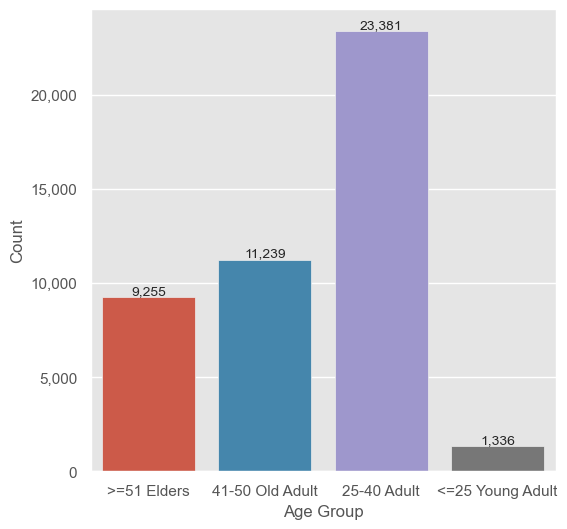

In [21]:
# To view the age-group with the highest number of accounts

plt.figure(figsize=(6, 6)) 
sns.countplot(x='age_group', data=capstone1)

# Adding values/labels to the plot
ax = plt.gca() 

# Loop through each bar in the plot
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar
    ax.text(p.get_x() + p.get_width() / 2, height, f'{height:,}', ha='center', va='bottom')
plt.xlabel('Age Group')
plt.ylabel('Count')
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

plt.show()



Observation: 
The customers type with the highest number of accounts in the data set is the 'Adult' with an age range of 25 to 40 years old. The customers below 25 years old have the least number of accounts.This shows that Nexus bank has a market group that is yet to be mined. Efficient and effective market drive within this group will serve as a source of new deposits for the bank.

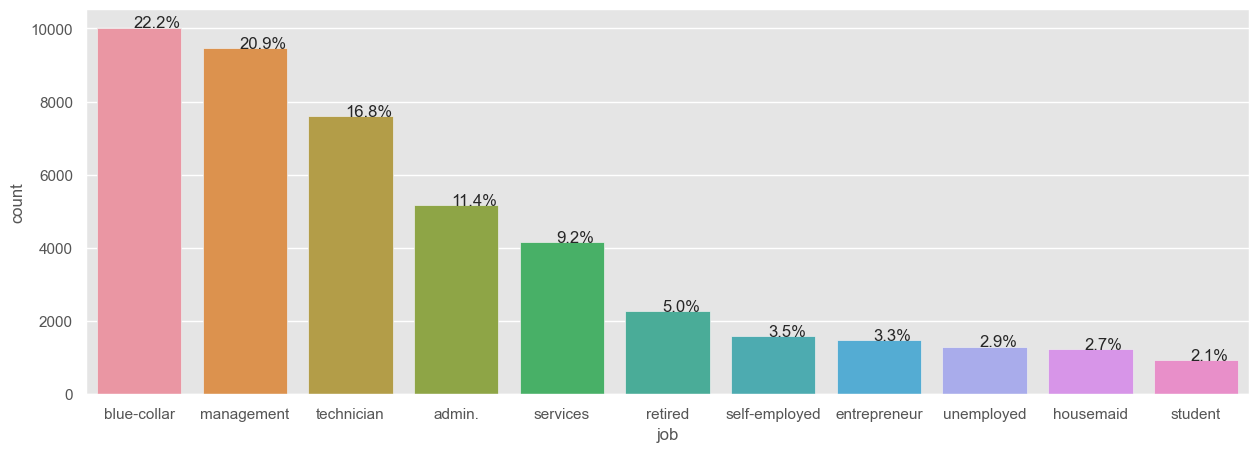

In [22]:
# To view the job type with the highest number of accounts
plt.figure(figsize=(15,5))
ax = sns.countplot(x=capstone1['job'], order= capstone1['job'].value_counts(ascending=False).index)
values = capstone1['job'].value_counts(ascending=False).values
perc_plot(ax,capstone1.job)

Observation: 
Out of the 11 Job Types; Blue-Collar, Management and Technicians account for 59.9% of the number of accounts opened. The other sub-groups account for 40.1%. There are obvious potentials to source for accounts from Entrepreneurs and the Self-employed. Nexus Bank should carry out market campaigns to focus on these sub-groups. Also the number of accounts belonging to the retired is just 5%. Does the bank loose customers when they retire from their place of employment? This may be an indication that the Nexus bank does not have customer/consumer friendly packages for Retirees and Students(2.1%).

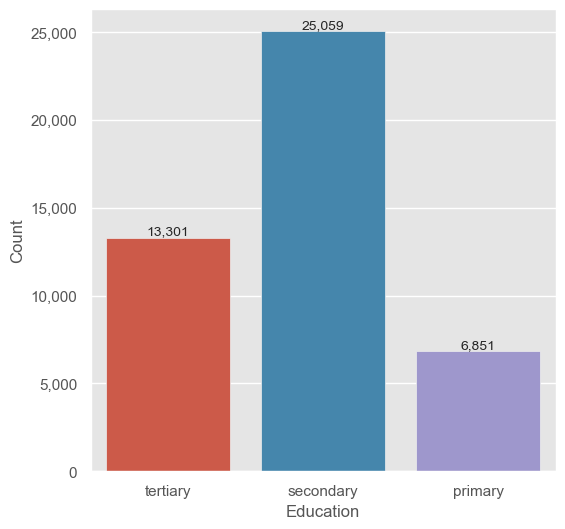

In [23]:
# To view the education type with the highest number of accounts
plt.figure(figsize=(6, 6))  
sns.countplot(x='education', data=capstone1)

# Adding values/labels to the plot
ax = plt.gca() 

# Loop through each bar in the plot
for p in ax.patches:
    height = p.get_height() 
    ax.text(p.get_x() + p.get_width() / 2, height, f'{height:,}', ha='center', va='bottom')
plt.xlabel('Education')
plt.ylabel('Count')

# Format y-axis labels with commas
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Observation:
Most of the customers that have accounts in Nexus Bank have Secondary education has the highest form of education. This is a reflection of the Blue-collar and Technicians having a high percentage of the total number of accounts 

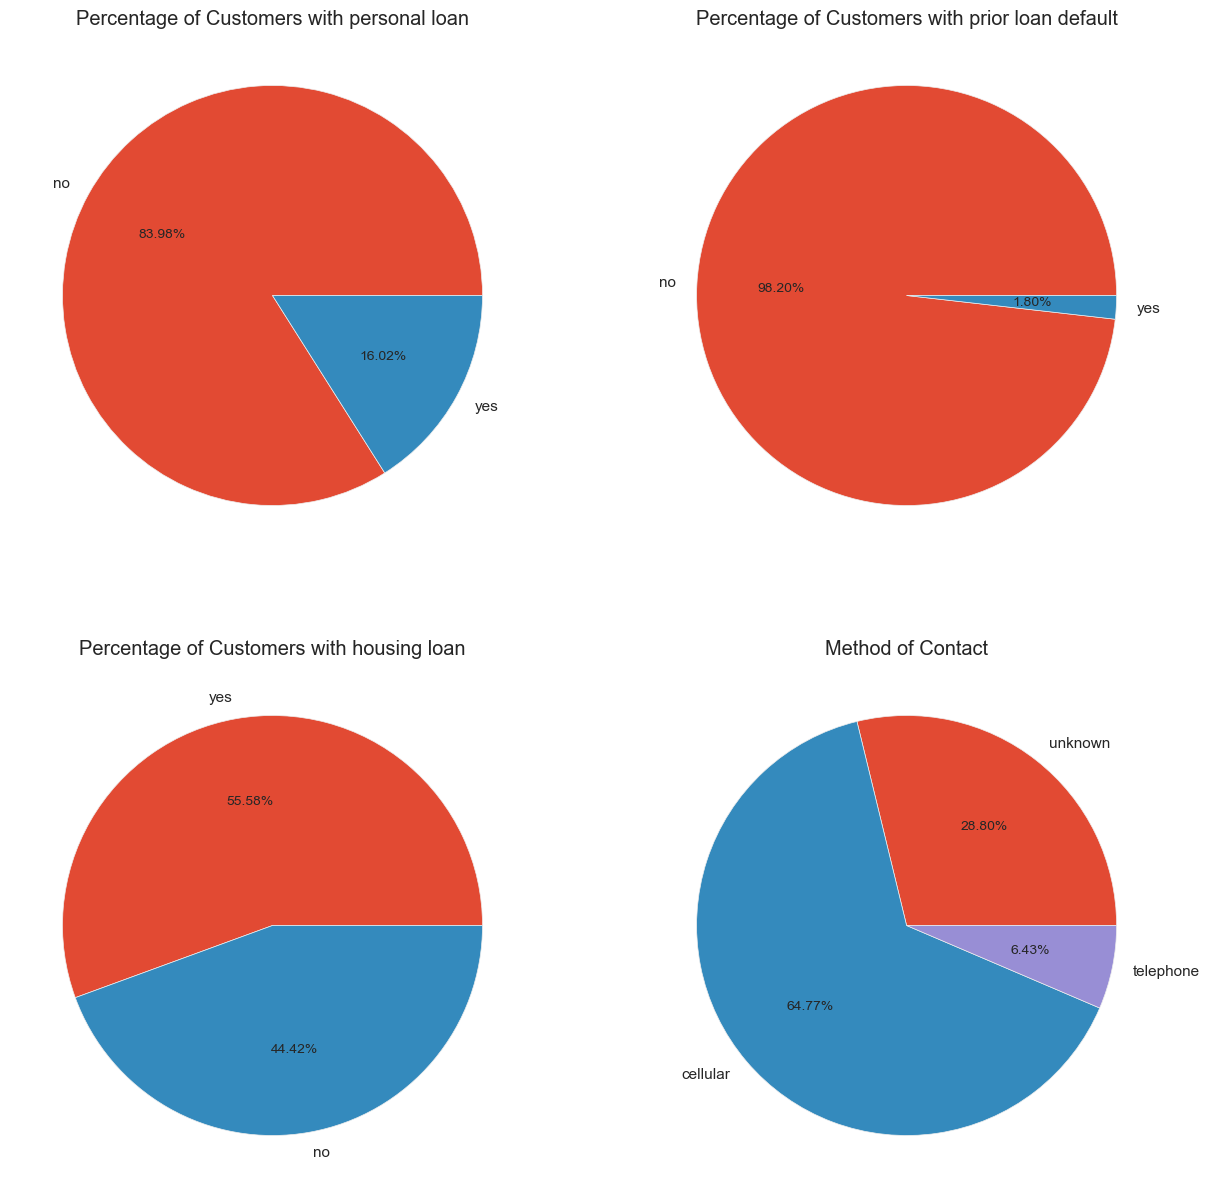

In [24]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# To view the  customers with personal loan
loan_count = Counter(capstone1['loan'])
axs[0, 0].pie(loan_count.values(), labels=loan_count.keys(), autopct=lambda p: f'{p:.2f}%')
axs[0, 0].set_title('Percentage of Customers with personal loan')

# To view the  customers with prior loan/credit card default
def_count = Counter(capstone1['default'])
axs[0, 1].pie(def_count.values(), labels=def_count.keys(), autopct=lambda p: f'{p:.2f}%')
axs[0, 1].set_title('Percentage of Customers with prior loan default')

# To view the  customers with housing loan
housing_count = Counter(capstone1['housing'])
axs[1, 0].pie(housing_count.values(), labels=housing_count.keys(), autopct=lambda p: f'{p:.2f}%')
axs[1, 0].set_title('Percentage of Customers with housing loan')

# To view the method of contact used to reach out to customer
contact_count = Counter(capstone1['contact'])
axs[1, 1].pie(contact_count.values(), labels=contact_count.keys(), autopct=lambda p: f'{p:.2f}%')
axs[1, 1].set_title('Method of Contact')

plt.show()

Observation:
Out of a data set of 45,211 customers, only 16.02% have personal loans while 55.58% have housing loans. This is despite a low default rate of 1.80%. According to Investopedia, the ideal loan to deposit ratio is between 80% to 90%. Nexus bank cleary falls below the bench mark. Therefore are the interest rates for personal loans unattractive? Is there adequate awareness of the personal and housing loan products available to potential customers?  There is an obvious lapse in the number of loan disbursed in Nexus bank. The bank should carry out strategic campaigns to focus on these issues.

    

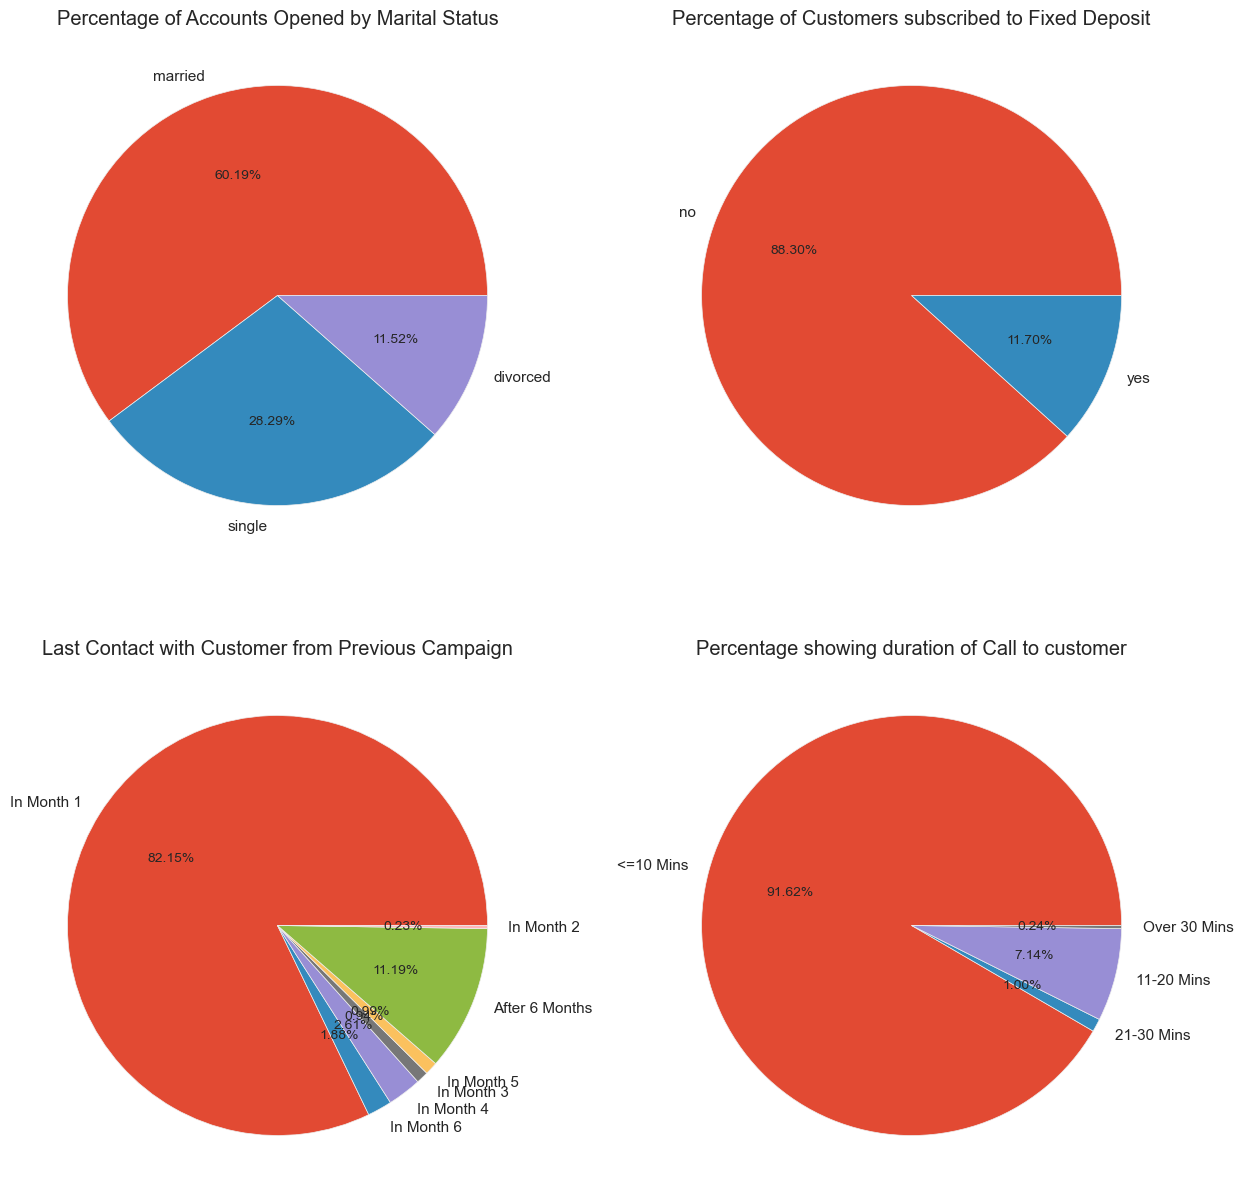

In [25]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# To view the marital status with the highest number of accounts
marital_count = Counter(capstone1['marital'])
axs[0, 0].pie(marital_count.values(), labels=marital_count.keys(), autopct=lambda p: f'{p:.2f}%')
axs[0, 0].set_title('Percentage of Accounts Opened by Marital Status')

#To view percentage of customers who have subscribed to Fixed deposit investment
deposit_count = Counter(capstone1['deposit'])
axs[0, 1].pie(deposit_count.values(), labels=deposit_count.keys(), autopct=lambda p: f'{p:.2f}%')
axs[0, 1].set_title('Percentage of Customers subscribed to Fixed Deposit')

# To view months passed after customer was last contacted from previous campaign
pmonths_count = Counter(capstone1['pmonths'])
axs[1, 0].pie(pmonths_count.values(), labels=pmonths_count.keys(), autopct=lambda p: f'{p:.2f}%')
axs[1, 0].set_title('Last Contact with Customer from Previous Campaign')

# Details showing duration of last contact with customer (in mins) 
duratmins_count = Counter(capstone1['duratmins'])
axs[1, 1].pie(duratmins_count.values(), labels=duratmins_count.keys(), autopct=lambda p: f'{p:.2f}%')
axs[1, 1].set_title('Percentage showing duration of Call to customer')

plt.show()

Observation:
Marital Status:  Married customers have the highest number of accounts in the bank. They account for 60.2% of the total number of accounts. This also reiterates the fact that the bank is yet to focus on the young adults of ages below 25 years.

Deposit: Only 11.70% of the customer base of 45,211 have subscribed to fixed deposit investment. Compared to other financial institutions, are the fixed deposit rates unattractive? Is there adequate awareness? Nexus Bank should drill down to the reasons why the figures are low. Although The ideal ratio of fixed deposit (FD) investment to regular deposits in banks can vary depending on its financial goals, risk tolerance, and liquidity needs. There is no one-size-fits-all answer to this question as it depends on various factors. However, here are some general considerations to keep in mind such as Risk and Return, Liquidity needs as well asDiversification. Nexus Bank should also carry out investigations to find out what other banks are offering. Also aggressive marketing campaigns need to be carried out urgently to enable the bank improve subscription to the term deposits.

PMonths: This shows the number of months that have passed since the customer was last contacted from a previous campaign. This shows that 82.15% of the customers were contacted within the first month after the previous campaign. However 17.85% was contaced after one month and 11.19% was contacted after 6 months. Nexus banks needs to discuss the frequency of the campaigns and how the maximum time duration required to contact the customer after.

Duration: 91.62% of the calls were made within the 10 mins. Nexus bank may wish to set a maximum time for such calls to ensure efficiency and effective customer engagement.

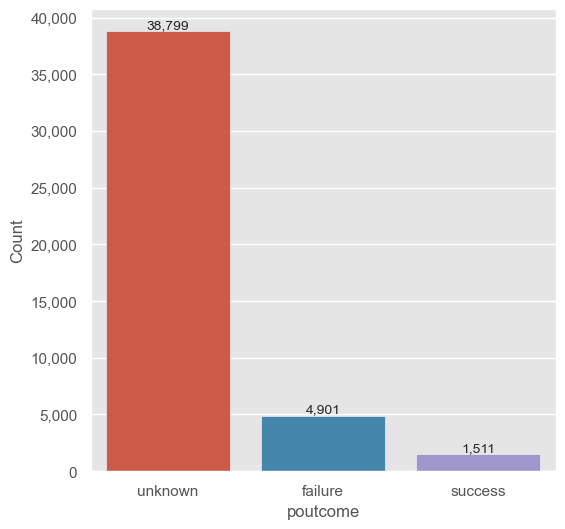

In [26]:
#General overview of outcome of previous marketing campaign

plt.figure(figsize=(6, 6))  
sns.countplot(x='poutcome', data=capstone1)

# Adding values/labels to the plot
ax = plt.gca() 

# Loop through each bar in the plot
for p in ax.patches:
    height = p.get_height() 
    ax.text(p.get_x() + p.get_width() / 2, height, f'{height:,}', ha='center', va='bottom')
plt.xlabel('poutcome')
plt.ylabel('Count')

# Format y-axis labels with commas
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Observation:
Despite a 100% customer contact the failure and unknown outcome of the previous campaign accounts for 99% of the total figure. This may be an indication that the last campaign was not a success. Was there adequate awareness? Were effective marketing strategies deployed? What are the lessons learnt and way forward, this are the questions Nexus Bank needs to review.

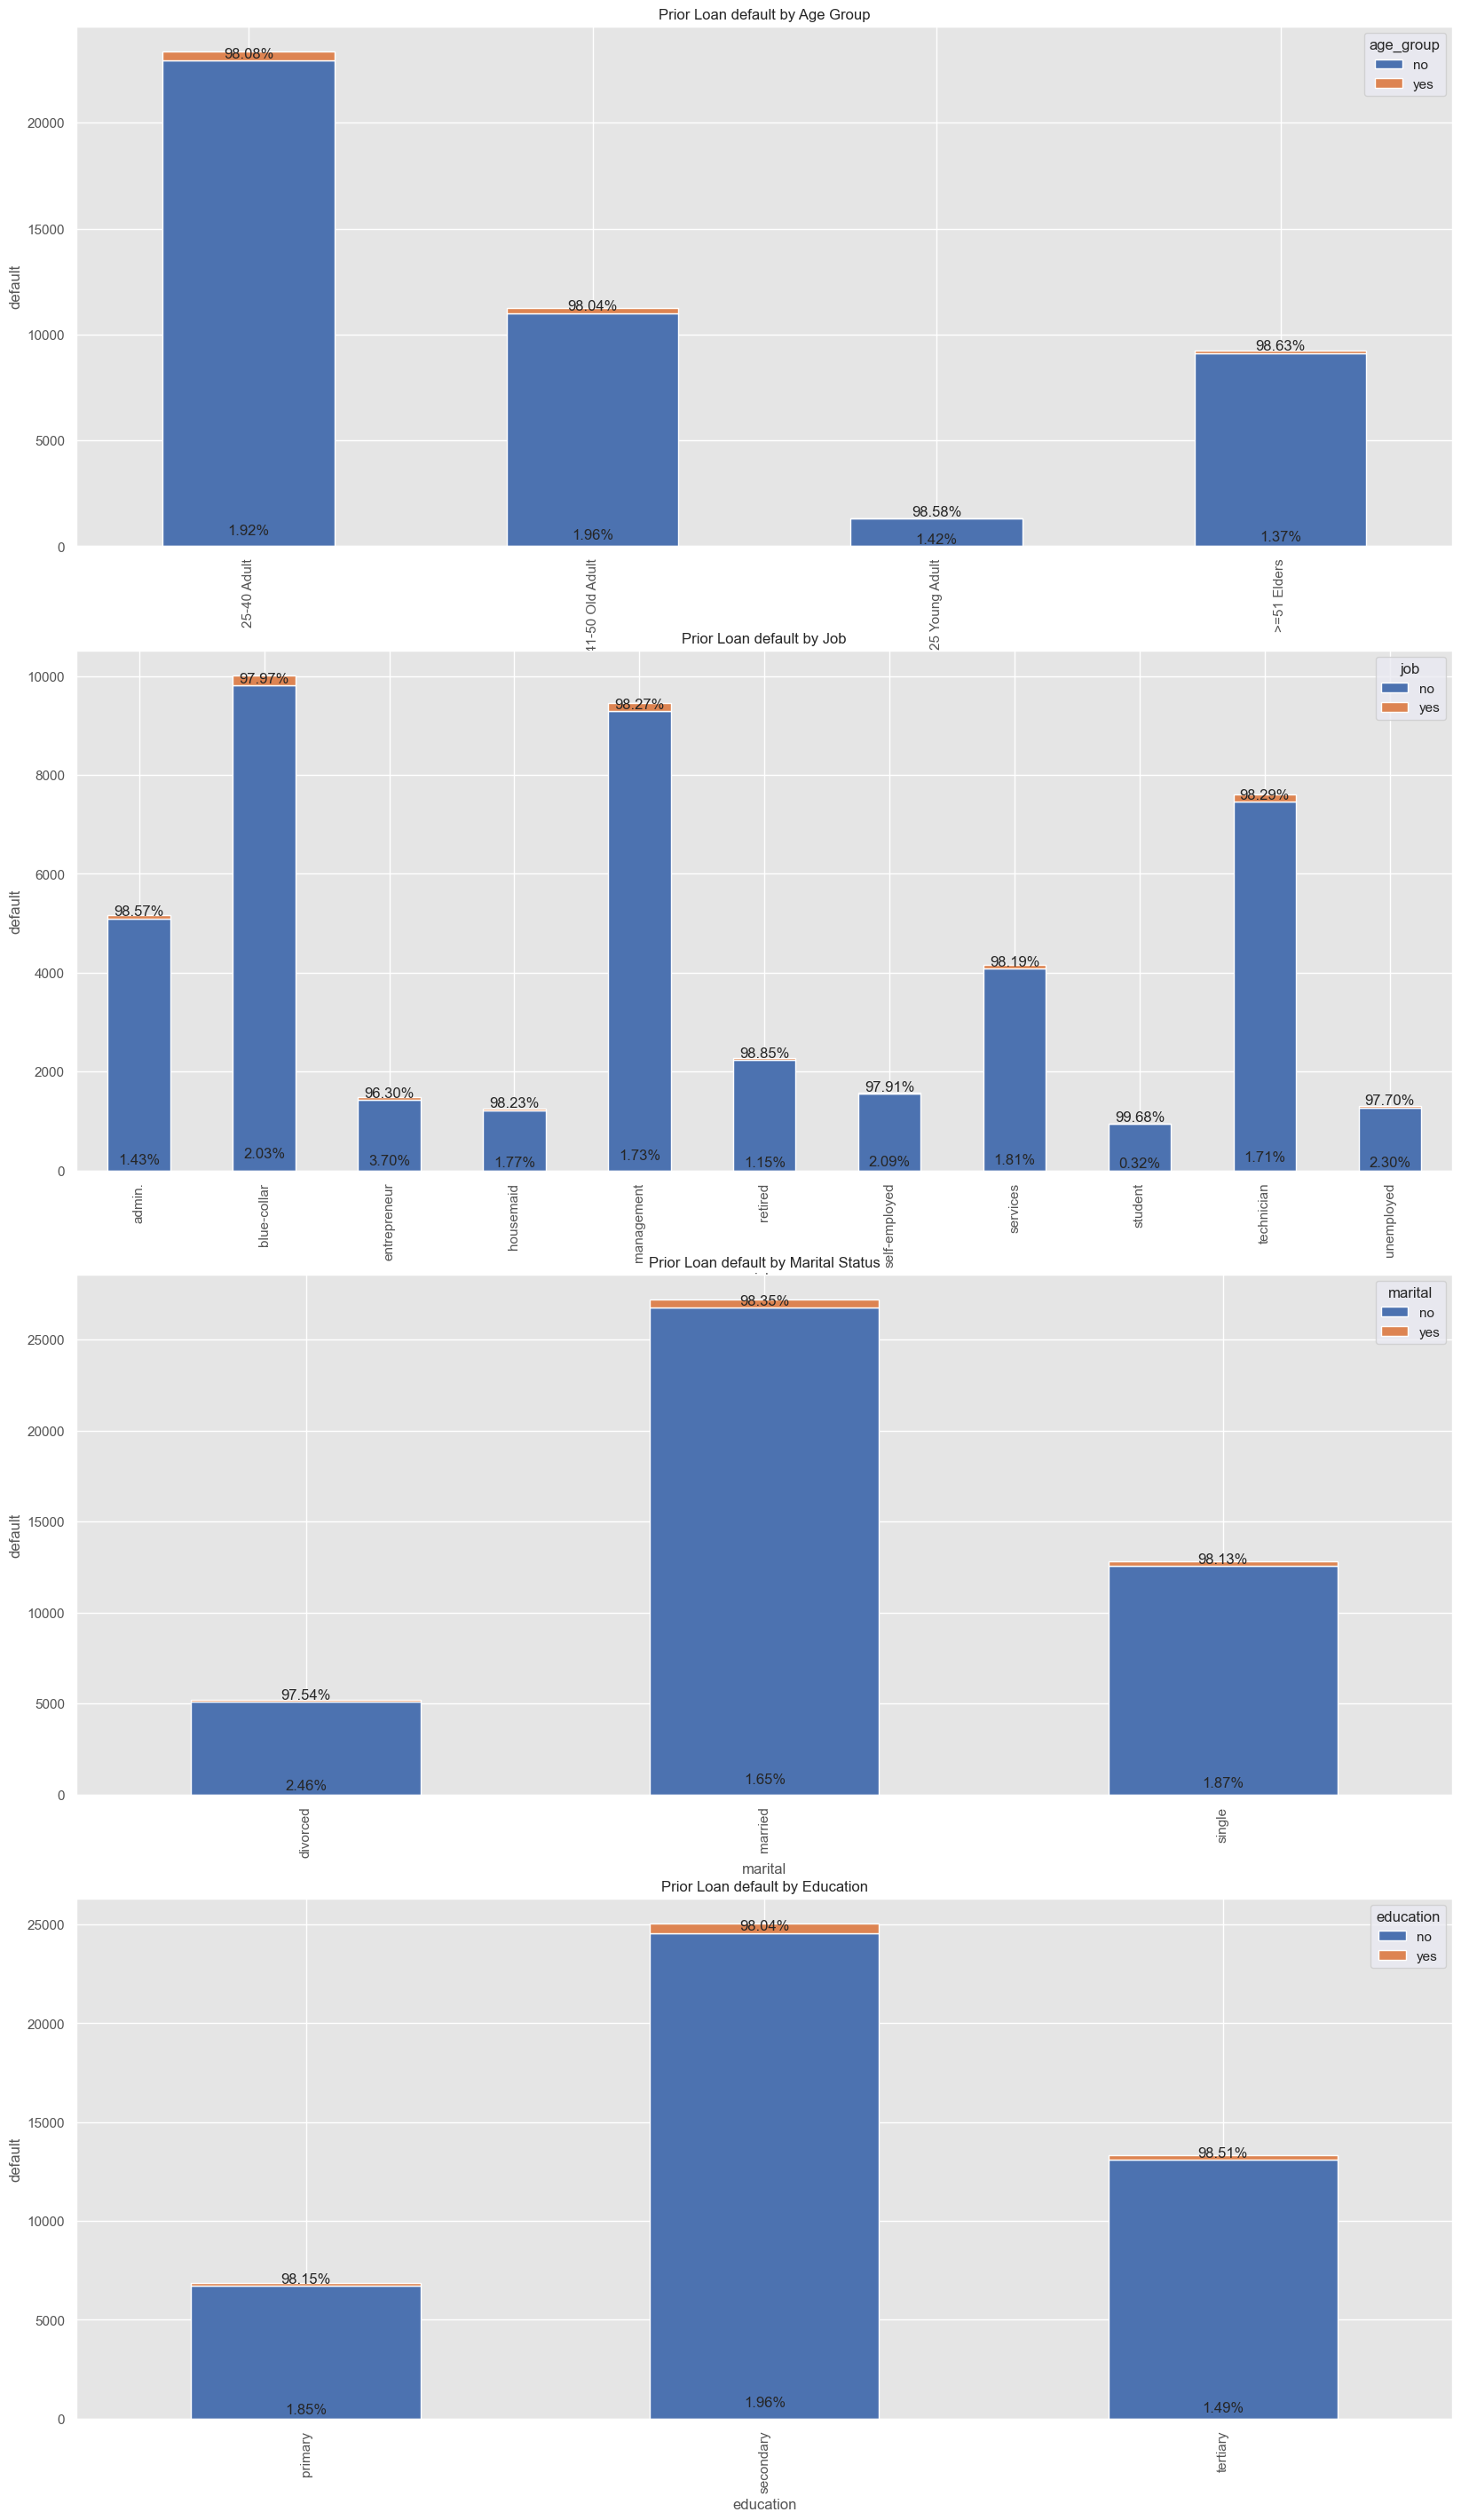

In [27]:
#To view how customer demographics affects loan default

fig, axs = plt.subplots(nrows=4, figsize=(20, 35))

age_default = pd.crosstab(capstone1['age_group'], capstone1['default'])
sns.set(style="darkgrid")
age_default.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_xlabel('age_group')
axs[0].set_ylabel('default')
axs[0].set_title('Prior Loan default by Age Group')
axs[0].legend(title='age_group')

job_default = pd.crosstab(capstone1['job'], capstone1['default'])
sns.set(style="darkgrid")
job_default.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_xlabel('job')
axs[1].set_ylabel('default')
axs[1].set_title('Prior Loan default by Job')
axs[1].legend(title='job')

marital_default = pd.crosstab(capstone1['marital'], capstone1['default'])
sns.set(style="darkgrid")
marital_default.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_xlabel('marital')
axs[2].set_ylabel('default')
axs[2].set_title('Prior Loan default by Marital Status')
axs[2].legend(title='marital')

education_default = pd.crosstab(capstone1['education'], capstone1['default'])
sns.set(style="darkgrid")
education_default.plot(kind='bar', stacked=True, ax=axs[3])
axs[3].set_xlabel('education')
axs[3].set_ylabel('default')
axs[3].set_title('Prior Loan default by Education')
axs[3].legend(title='education')

for i in range(len(age_default)):
    for j in range(len(age_default.columns)):
        count = age_default.iloc[i, j]
        percent = count / age_default.iloc[i].sum() * 100
        axs[0].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(job_default)):
    for j in range(len(job_default.columns)):
        count = job_default.iloc[i, j]
        percent = count / job_default.iloc[i].sum() * 100
        axs[1].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(marital_default)):
    for j in range(len(marital_default.columns)):
        count = marital_default.iloc[i, j]
        percent = count / marital_default.iloc[i].sum() * 100
        axs[2].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(education_default)):
    for j in range(len(education_default.columns)):
        count = education_default.iloc[i, j]
        percent = count / education_default.iloc[i].sum() * 100
        axs[3].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

plt.show()

Observation;
The prior default status on personal and credit card loan is relatively constant through the demographics when comparing with the general overview (98.20%/1.80%). This is also reflective of the following:
1.Age group: individuals between ages 25 to 40 years having a higher statistic compared to young adults. This is due to the fact that the prior group has the highest number of accounts compared to the young adults
2.Job category: customers who work in the blue-collar, technician and management categories also have a higher figure compared to other job categories. This is because the prior job categories account for 59.9% of the accounts in the data set
3.Marital Status: The customers who are married have a higher value compared to other groups.
4.Education: While the customers who are secondary school graduates also have the highest information compared to other groups

As stated earlier, there are demographics Nexus Bank need to focus on such as young adults, enterprenuers, self-employed, retirees, primary school and tertiary school graduates. Adequate campaigns and agrresive marketing strategies should be deployed.



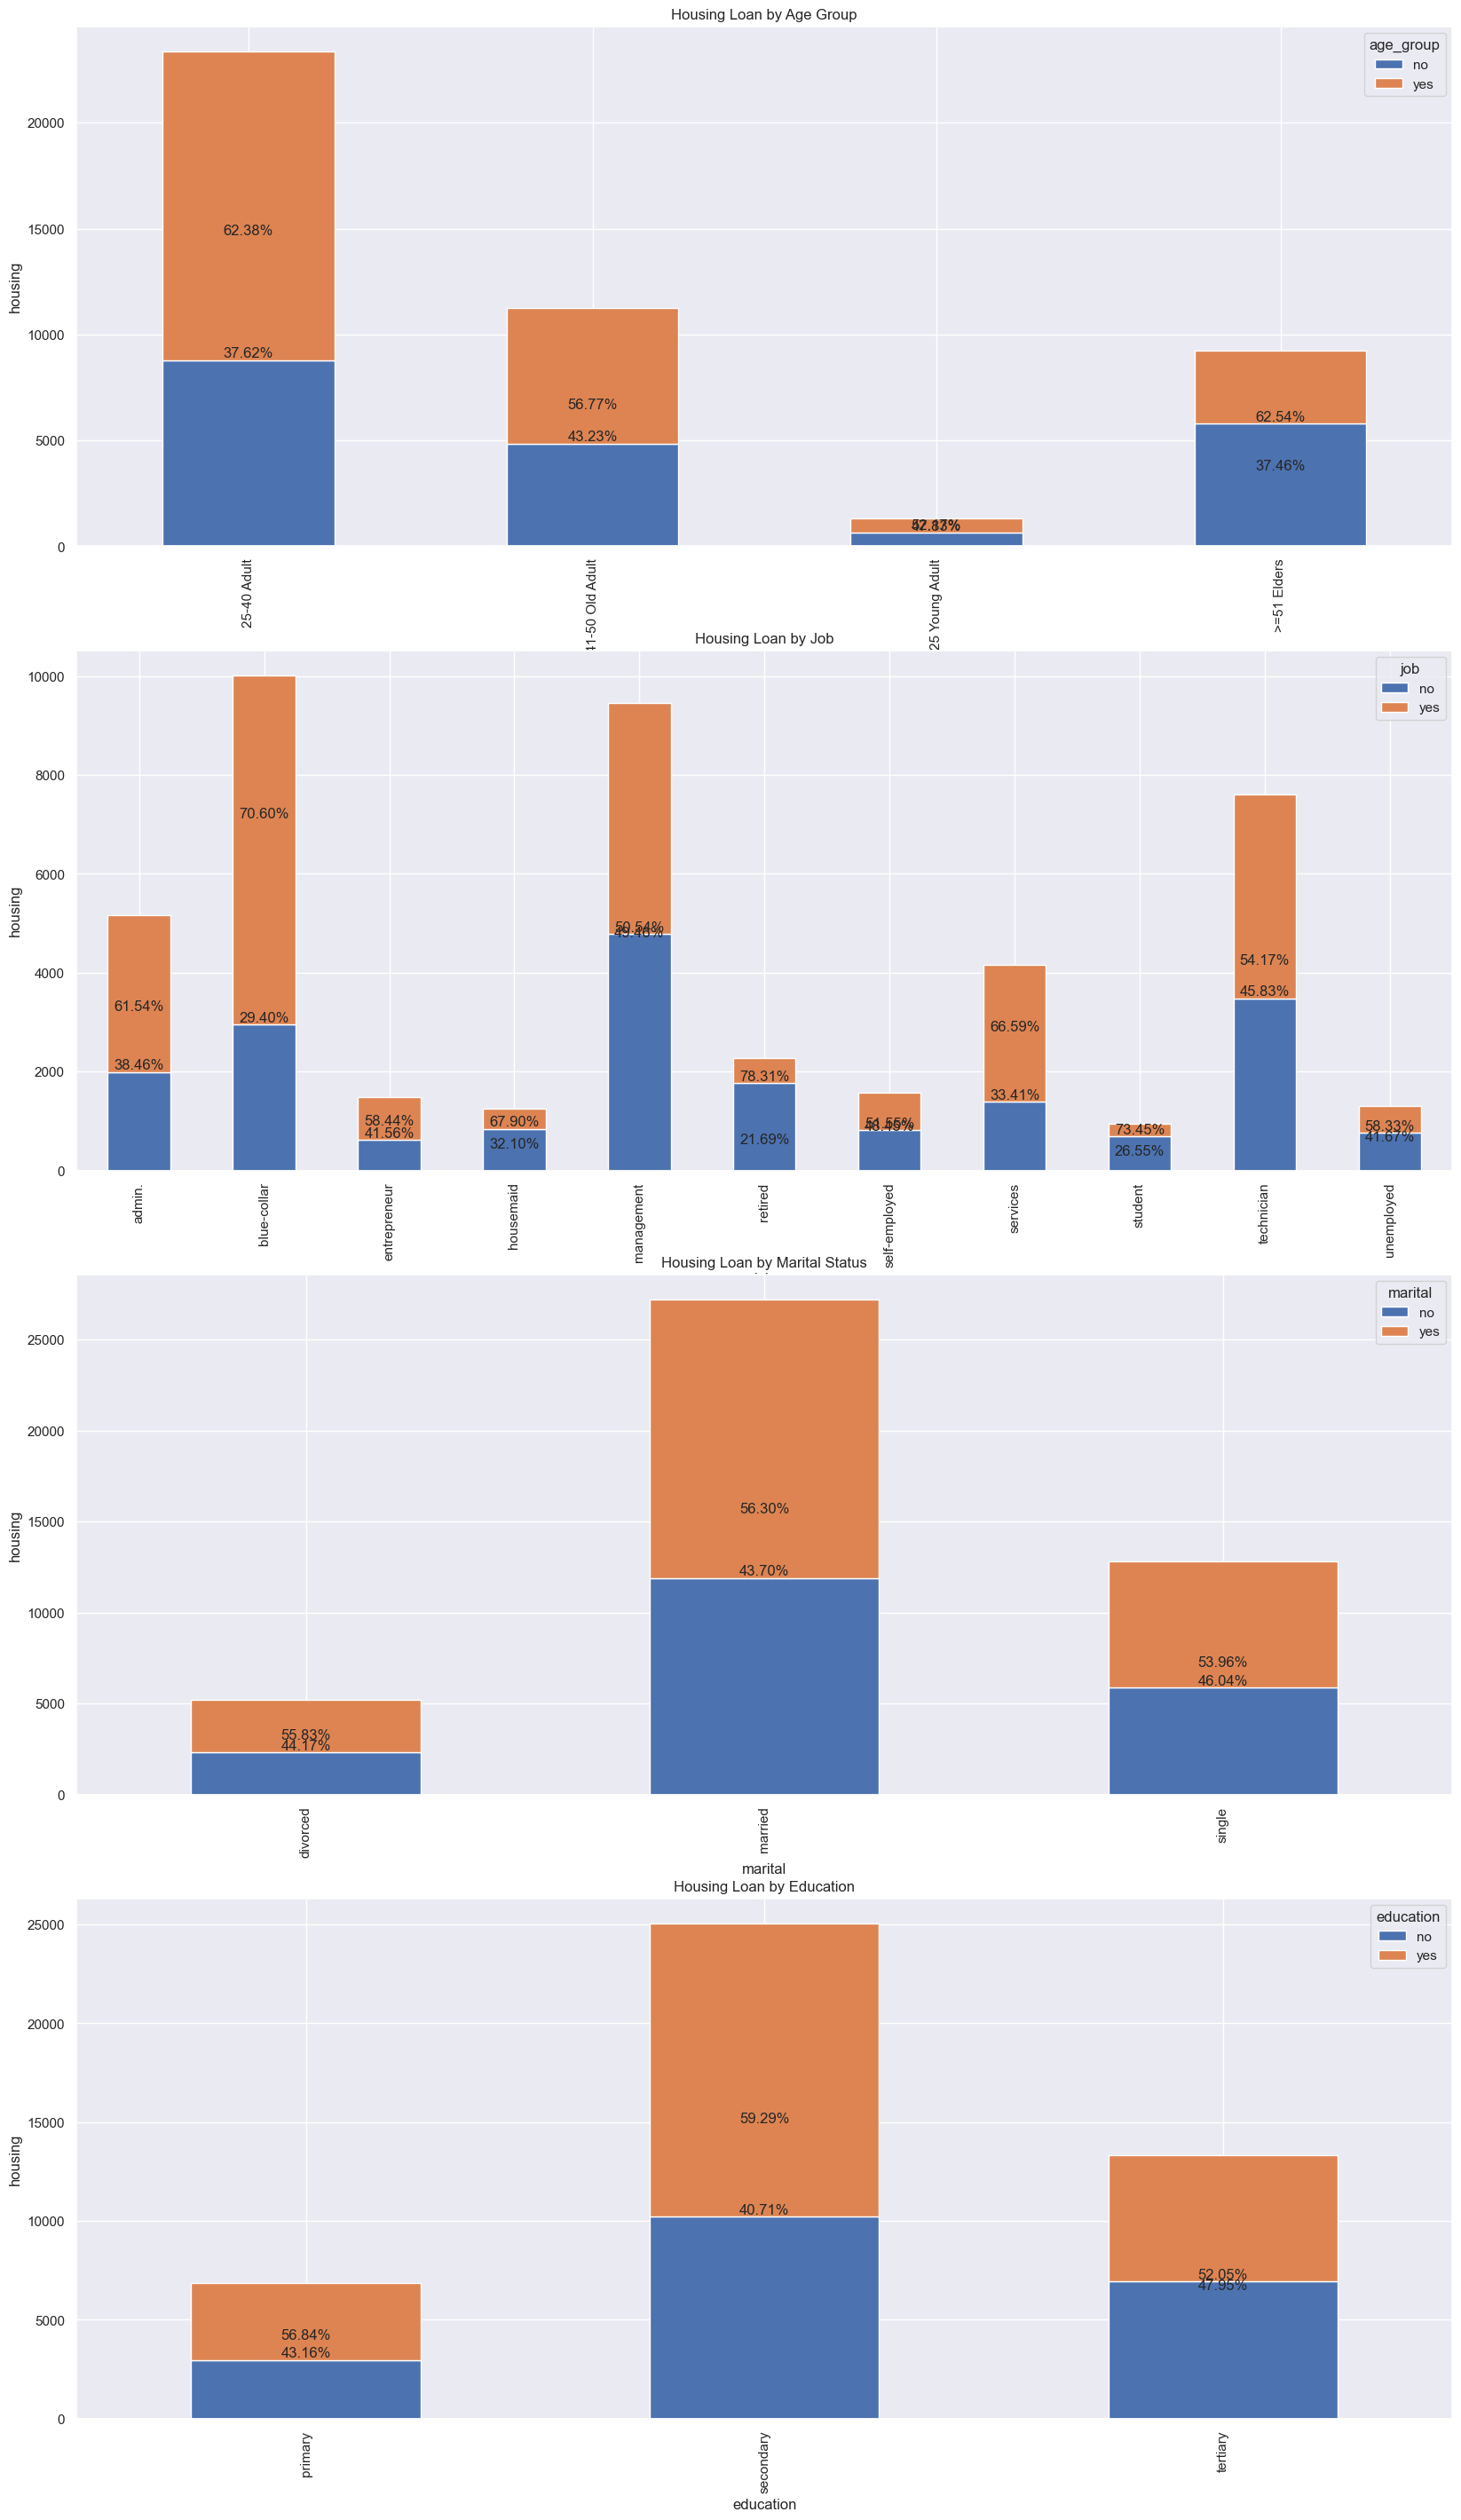

In [28]:
#To view how customer demographics affects housing loan


fig, axs = plt.subplots(nrows=4, figsize=(20, 35))

age_housing = pd.crosstab(capstone1['age_group'], capstone1['housing'])
sns.set(style="darkgrid")
age_housing.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_xlabel('age_group')
axs[0].set_ylabel('housing')
axs[0].set_title('Housing Loan by Age Group')
axs[0].legend(title='age_group')

job_housing = pd.crosstab(capstone1['job'], capstone1['housing'])
sns.set(style="darkgrid")
job_housing.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_xlabel('job')
axs[1].set_ylabel('housing')
axs[1].set_title('Housing Loan by Job')
axs[1].legend(title='job')

marital_housing = pd.crosstab(capstone1['marital'], capstone1['housing'])
sns.set(style="darkgrid")
marital_housing.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_xlabel('marital')
axs[2].set_ylabel('housing')
axs[2].set_title('Housing Loan by Marital Status')
axs[2].legend(title='marital')

education_housing = pd.crosstab(capstone1['education'], capstone1['housing'])
sns.set(style="darkgrid")
education_housing.plot(kind='bar', stacked=True, ax=axs[3])
axs[3].set_xlabel('education')
axs[3].set_ylabel('housing')
axs[3].set_title('Housing Loan by Education')
axs[3].legend(title='education')

for i in range(len(age_housing)):
    for j in range(len(age_housing.columns)):
        count = age_housing.iloc[i, j]
        percent = count / age_housing.iloc[i].sum() * 100
        axs[0].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(job_housing)):
    for j in range(len(job_housing.columns)):
        count = job_housing.iloc[i, j]
        percent = count / job_housing.iloc[i].sum() * 100
        axs[1].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(marital_housing)):
    for j in range(len(marital_housing.columns)):
        count = marital_housing.iloc[i, j]
        percent = count / marital_housing.iloc[i].sum() * 100
        axs[2].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(education_housing)):
    for j in range(len(education_housing.columns)):
        count = education_housing.iloc[i, j]
        percent = count / education_housing.iloc[i].sum() * 100
        axs[3].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

plt.show()

Observation:
The information displayed is also a  relative reflection of the general overview of the customers who have housing loan, that is 55.58%/44.2%. However there are some the following information is important to note:
Job Category: The job categoies with the highest number of Housing loans are Blue-Collar(70.60%), Services(66.59%) and Admin (61.54%).  The other job categories fall below 60%. According to Investopedia, the ideal loan to deposit ratio is between 80% to 90%. Nexus bank cleary falls below the bench mark. 
There is potential for growth in the Management category (49.40%), Self-Employed (54.58%) and Enterprenuer (58.44%). A growth in these categories will have a significant impact on the overall figure.


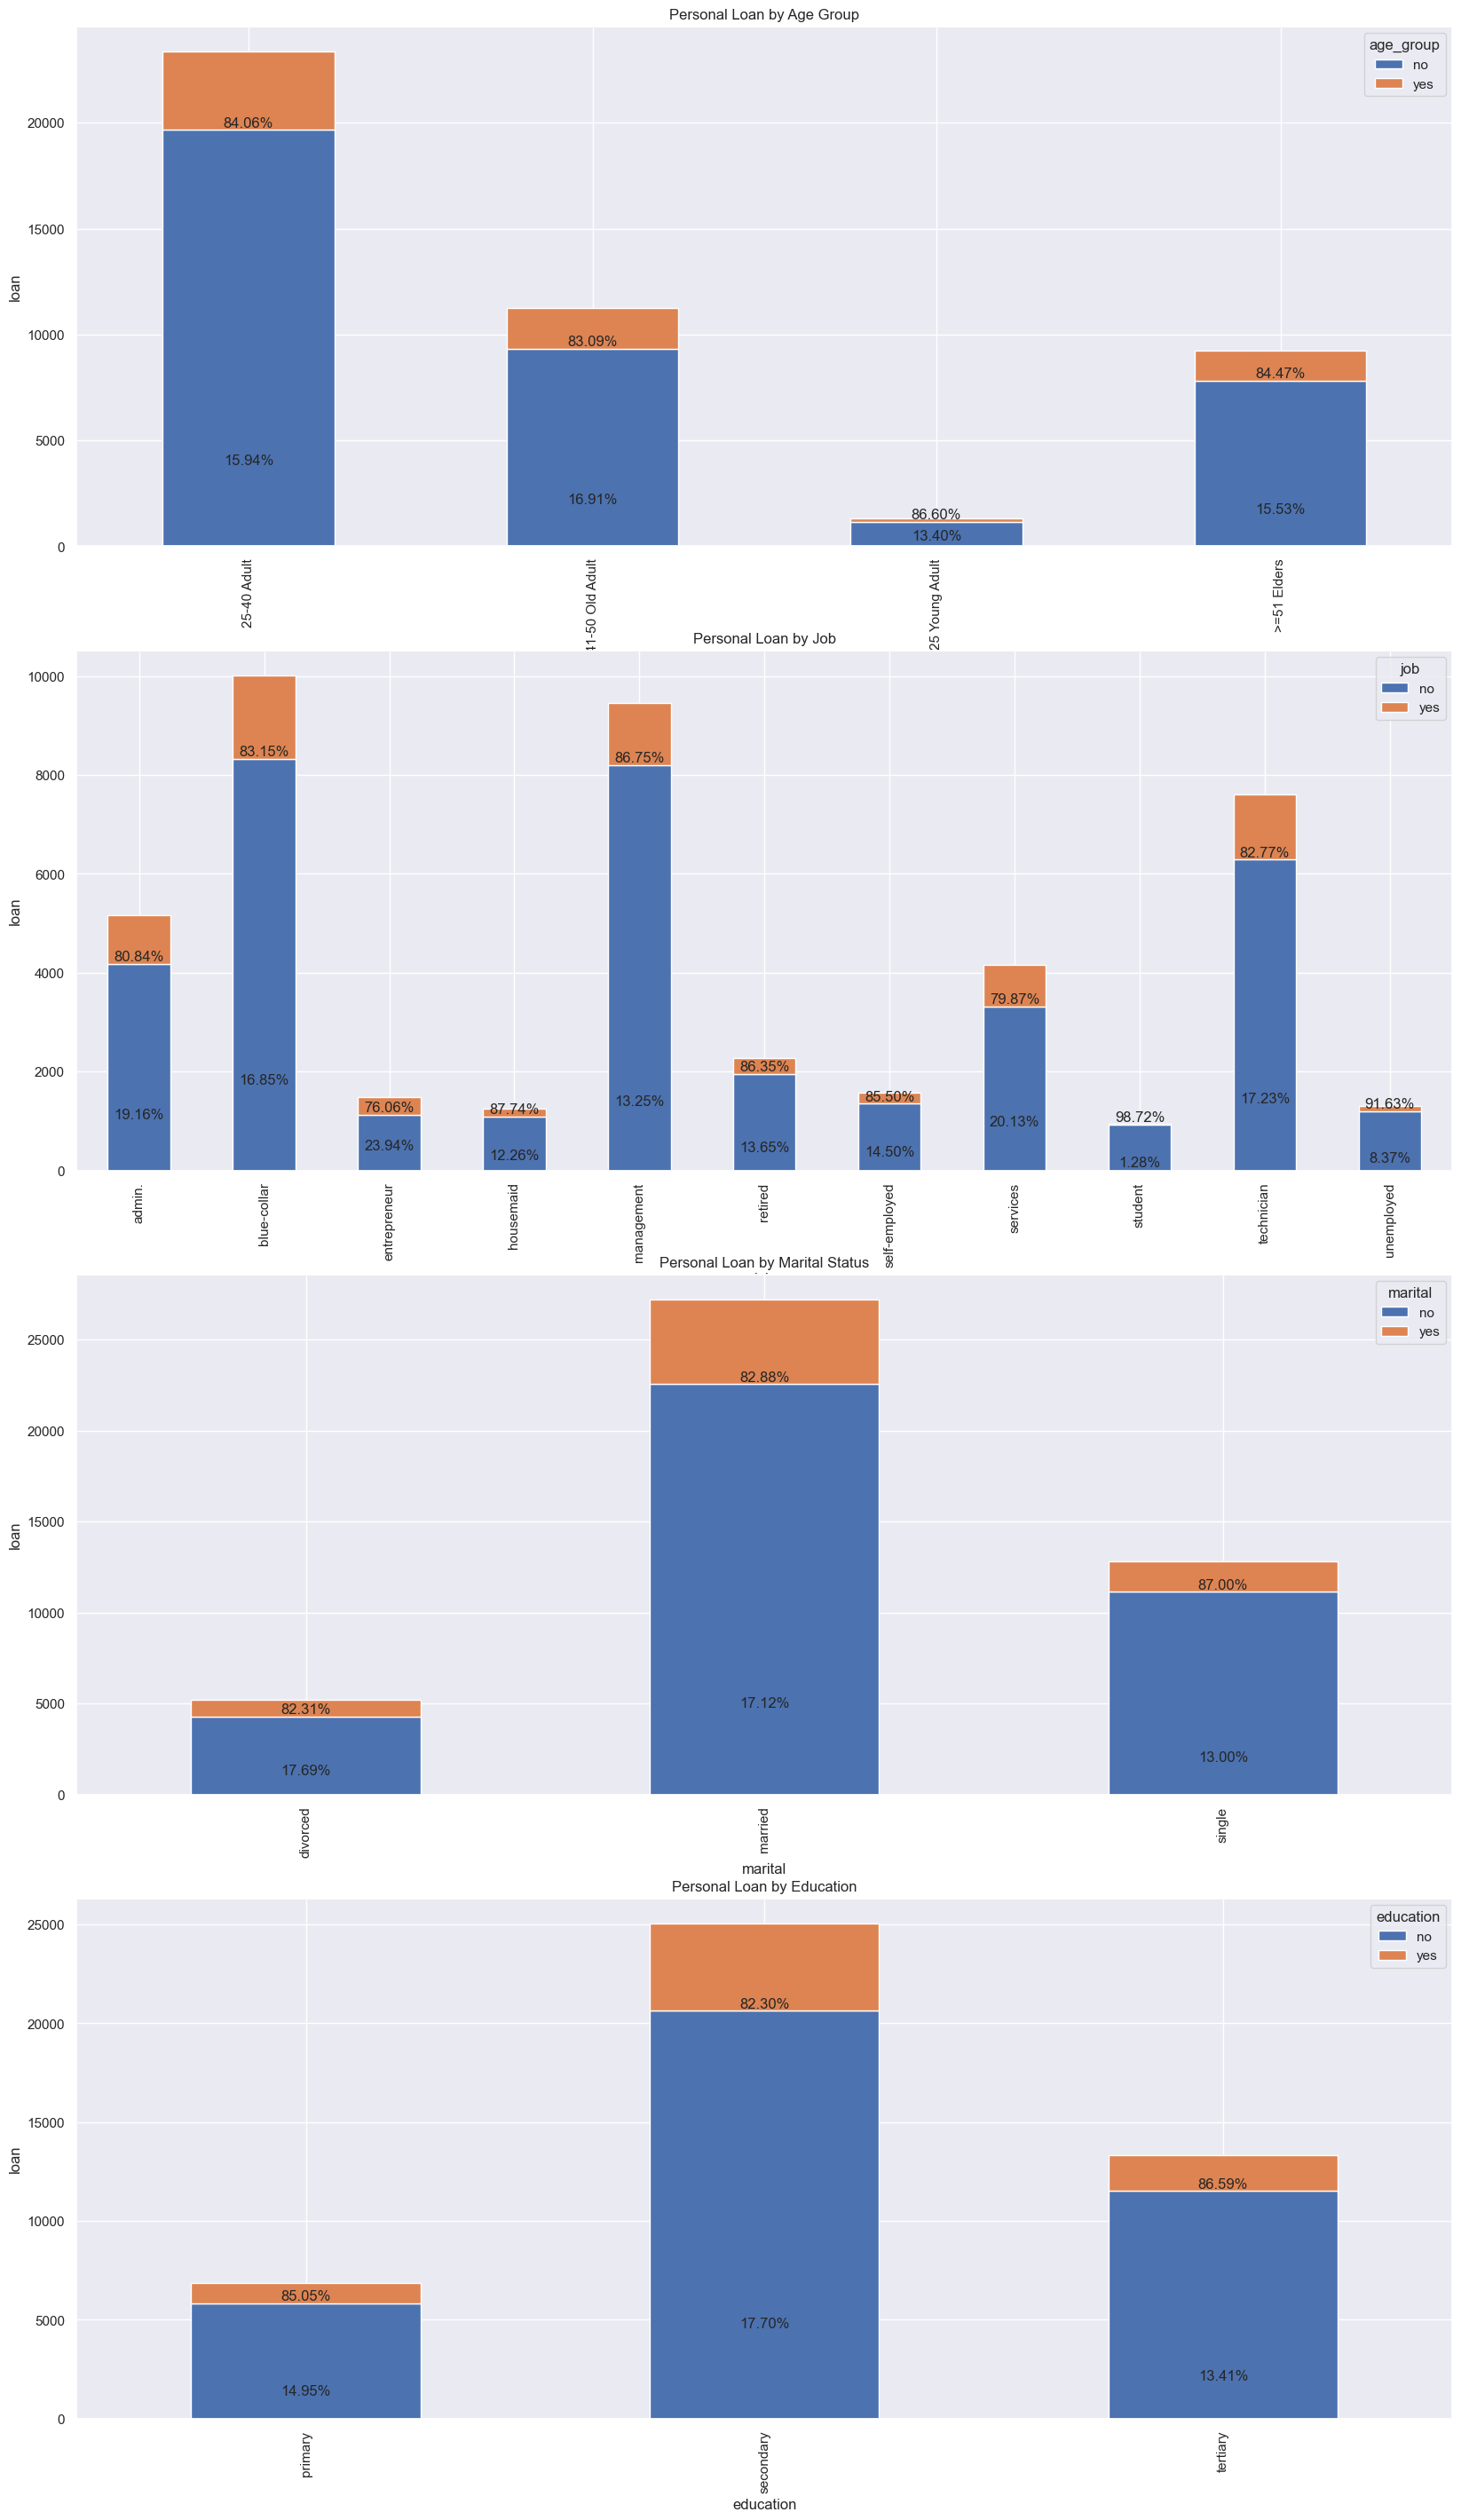

In [29]:
#To view how customer demographics affects personal loan


fig, axs = plt.subplots(nrows=4, figsize=(20, 35))

age_loan = pd.crosstab(capstone1['age_group'], capstone1['loan'])
sns.set(style="darkgrid")
age_loan.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_xlabel('age_group')
axs[0].set_ylabel('loan')
axs[0].set_title('Personal Loan by Age Group')
axs[0].legend(title='age_group')

job_loan = pd.crosstab(capstone1['job'], capstone1['loan'])
sns.set(style="darkgrid")
job_loan.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_xlabel('job')
axs[1].set_ylabel('loan')
axs[1].set_title('Personal Loan by Job')
axs[1].legend(title='job')

marital_loan = pd.crosstab(capstone1['marital'], capstone1['loan'])
sns.set(style="darkgrid")
marital_loan.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_xlabel('marital')
axs[2].set_ylabel('loan')
axs[2].set_title('Personal Loan by Marital Status')
axs[2].legend(title='marital')

education_loan = pd.crosstab(capstone1['education'], capstone1['loan'])
sns.set(style="darkgrid")
education_loan.plot(kind='bar', stacked=True, ax=axs[3])
axs[3].set_xlabel('education')
axs[3].set_ylabel('loan')
axs[3].set_title('Personal Loan by Education')
axs[3].legend(title='education')

for i in range(len(age_loan)):
    for j in range(len(age_loan.columns)):
        count = age_loan.iloc[i, j]
        percent = count / age_loan.iloc[i].sum() * 100
        axs[0].text(i, count + 10, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(job_loan)):
    for j in range(len(job_loan.columns)):
        count = job_loan.iloc[i, j]
        percent = count / job_loan.iloc[i].sum() * 100
        axs[1].text(i, count + 10, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(marital_loan)):
    for j in range(len(marital_loan.columns)):
        count = marital_loan.iloc[i, j]
        percent = count / marital_loan.iloc[i].sum() * 100
        axs[2].text(i, count + 10, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(education_loan)):
    for j in range(len(education_loan.columns)):
        count = education_loan.iloc[i, j]
        percent = count / education_loan.iloc[i].sum() * 100
        axs[3].text(i, count + 10, f"{percent:.2f}%", ha='center', va='bottom')

plt.show()

Observation:
The breakdown above is also a reflection of the general overview of customers who have accessed personal loan which is 83.98%/16.02%. This shows that customers are not subscribing to the personal loan accross board, regardless of marital status, education background and job category. As stated earlier, Nexus bank needs to carry out aggressive marketing strategies and campaign to drive this prersonal loan.


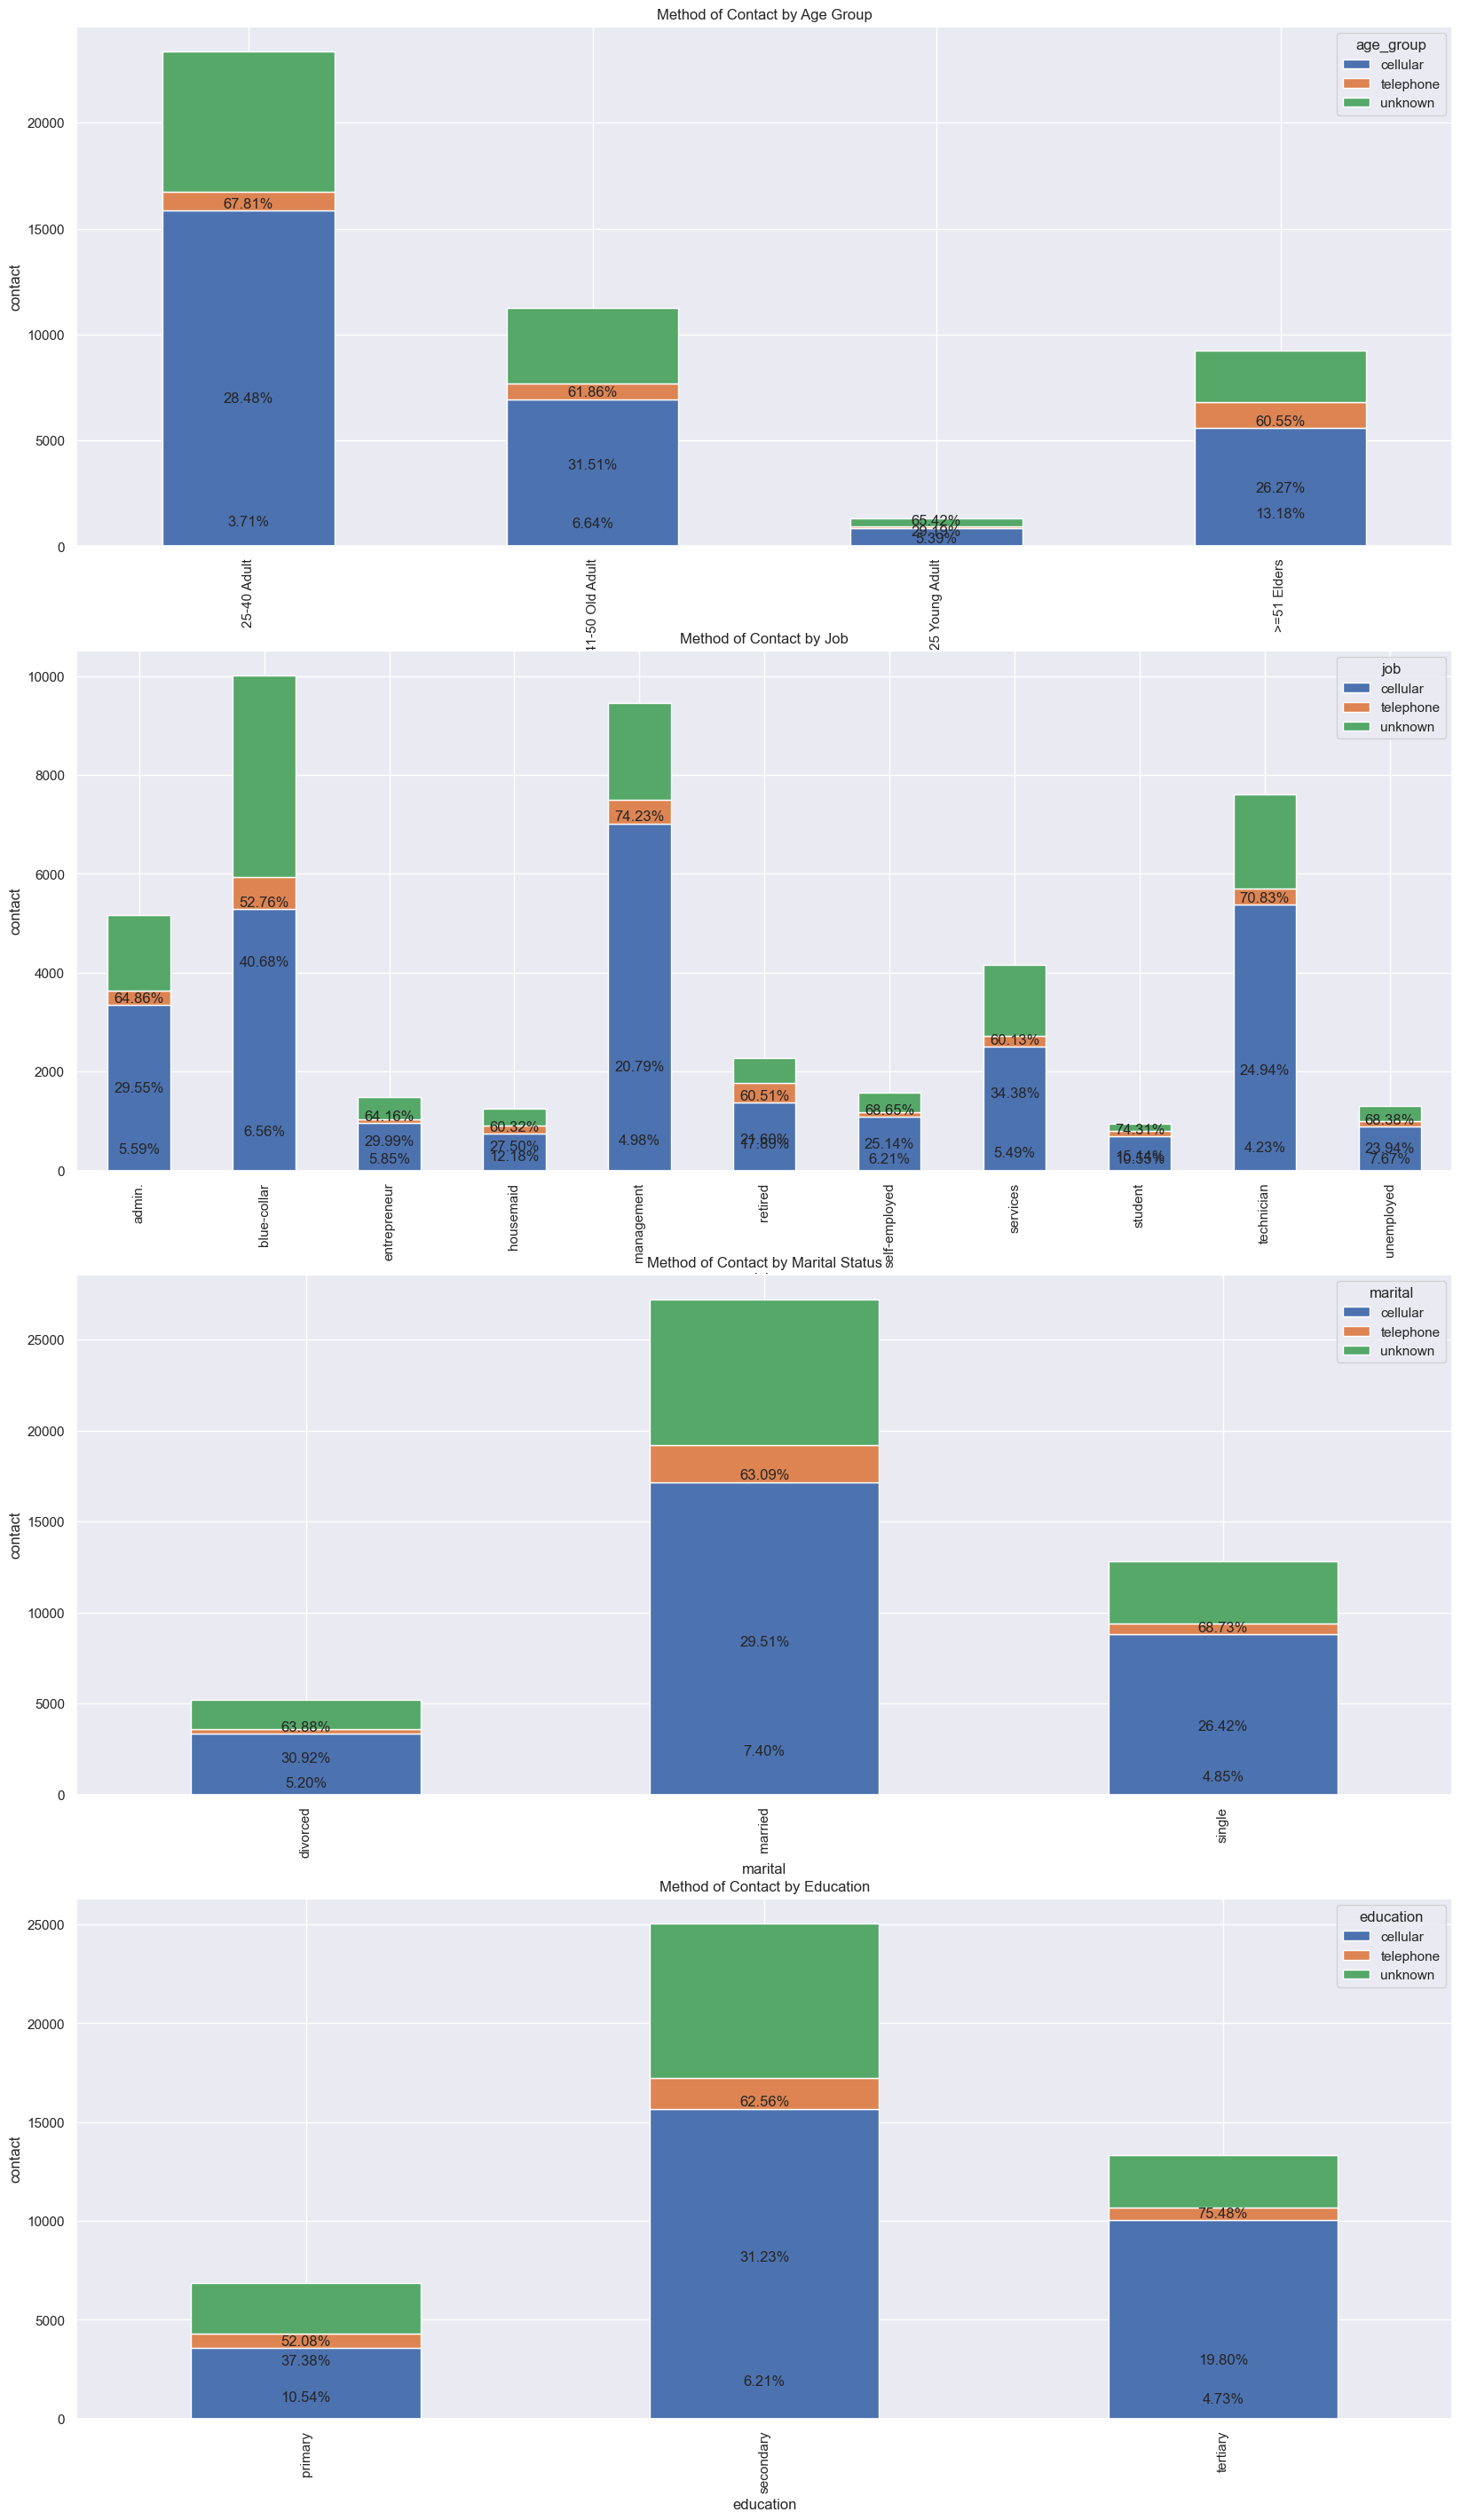

In [30]:
#To view how customer demographics affects Method of contact


fig, axs = plt.subplots(nrows=4, figsize=(20, 35))

age_contact = pd.crosstab(capstone1['age_group'], capstone1['contact'])
sns.set(style="darkgrid")
age_contact.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_xlabel('age_group')
axs[0].set_ylabel('contact')
axs[0].set_title('Method of Contact by Age Group')
axs[0].legend(title='age_group')

job_contact = pd.crosstab(capstone1['job'], capstone1['contact'])
sns.set(style="darkgrid")
job_contact.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_xlabel('job')
axs[1].set_ylabel('contact')
axs[1].set_title('Method of Contact by Job')
axs[1].legend(title='job')

marital_contact = pd.crosstab(capstone1['marital'], capstone1['contact'])
sns.set(style="darkgrid")
marital_contact.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_xlabel('marital')
axs[2].set_ylabel('contact')
axs[2].set_title('Method of Contact by Marital Status')
axs[2].legend(title='marital')

education_contact = pd.crosstab(capstone1['education'], capstone1['contact'])
sns.set(style="darkgrid")
education_contact.plot(kind='bar', stacked=True, ax=axs[3])
axs[3].set_xlabel('education')
axs[3].set_ylabel('contact')
axs[3].set_title('Method of Contact by Education')
axs[3].legend(title='education')

for i in range(len(age_contact)):
    for j in range(len(age_contact.columns)):
        count = age_contact.iloc[i, j]
        percent = count / age_contact.iloc[i].sum() * 100
        axs[0].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(job_contact)):
    for j in range(len(job_contact.columns)):
        count = job_contact.iloc[i, j]
        percent = count / job_contact.iloc[i].sum() * 100
        axs[1].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(marital_contact)):
    for j in range(len(marital_contact.columns)):
        count = marital_contact.iloc[i, j]
        percent = count / marital_contact.iloc[i].sum() * 100
        axs[2].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(education_contact)):
    for j in range(len(education_contact.columns)):
        count = education_contact.iloc[i, j]
        percent = count / education_contact.iloc[i].sum() * 100
        axs[3].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

plt.show()

Observation:
The breakdown above is also a reflection of the general overview of method of contact to customers which is 64.77% (Cellular), 28.80(Unknown) and 6.43% (Telephone). However, there are a few outliers:
1.Jobs: Customers who work in the categories, Management, Technician were contacted more via cellualr (above 70%). While the Blue-Collar workes were contacted more via unknown means (40.68%) when comparing to the general overview. This may be due to the nature of thier jobs.
2.Education: There was an increase in the contact via cellular of customers with Tertiary education while primary education had an increase in the contact via telephone and unknown means.
    

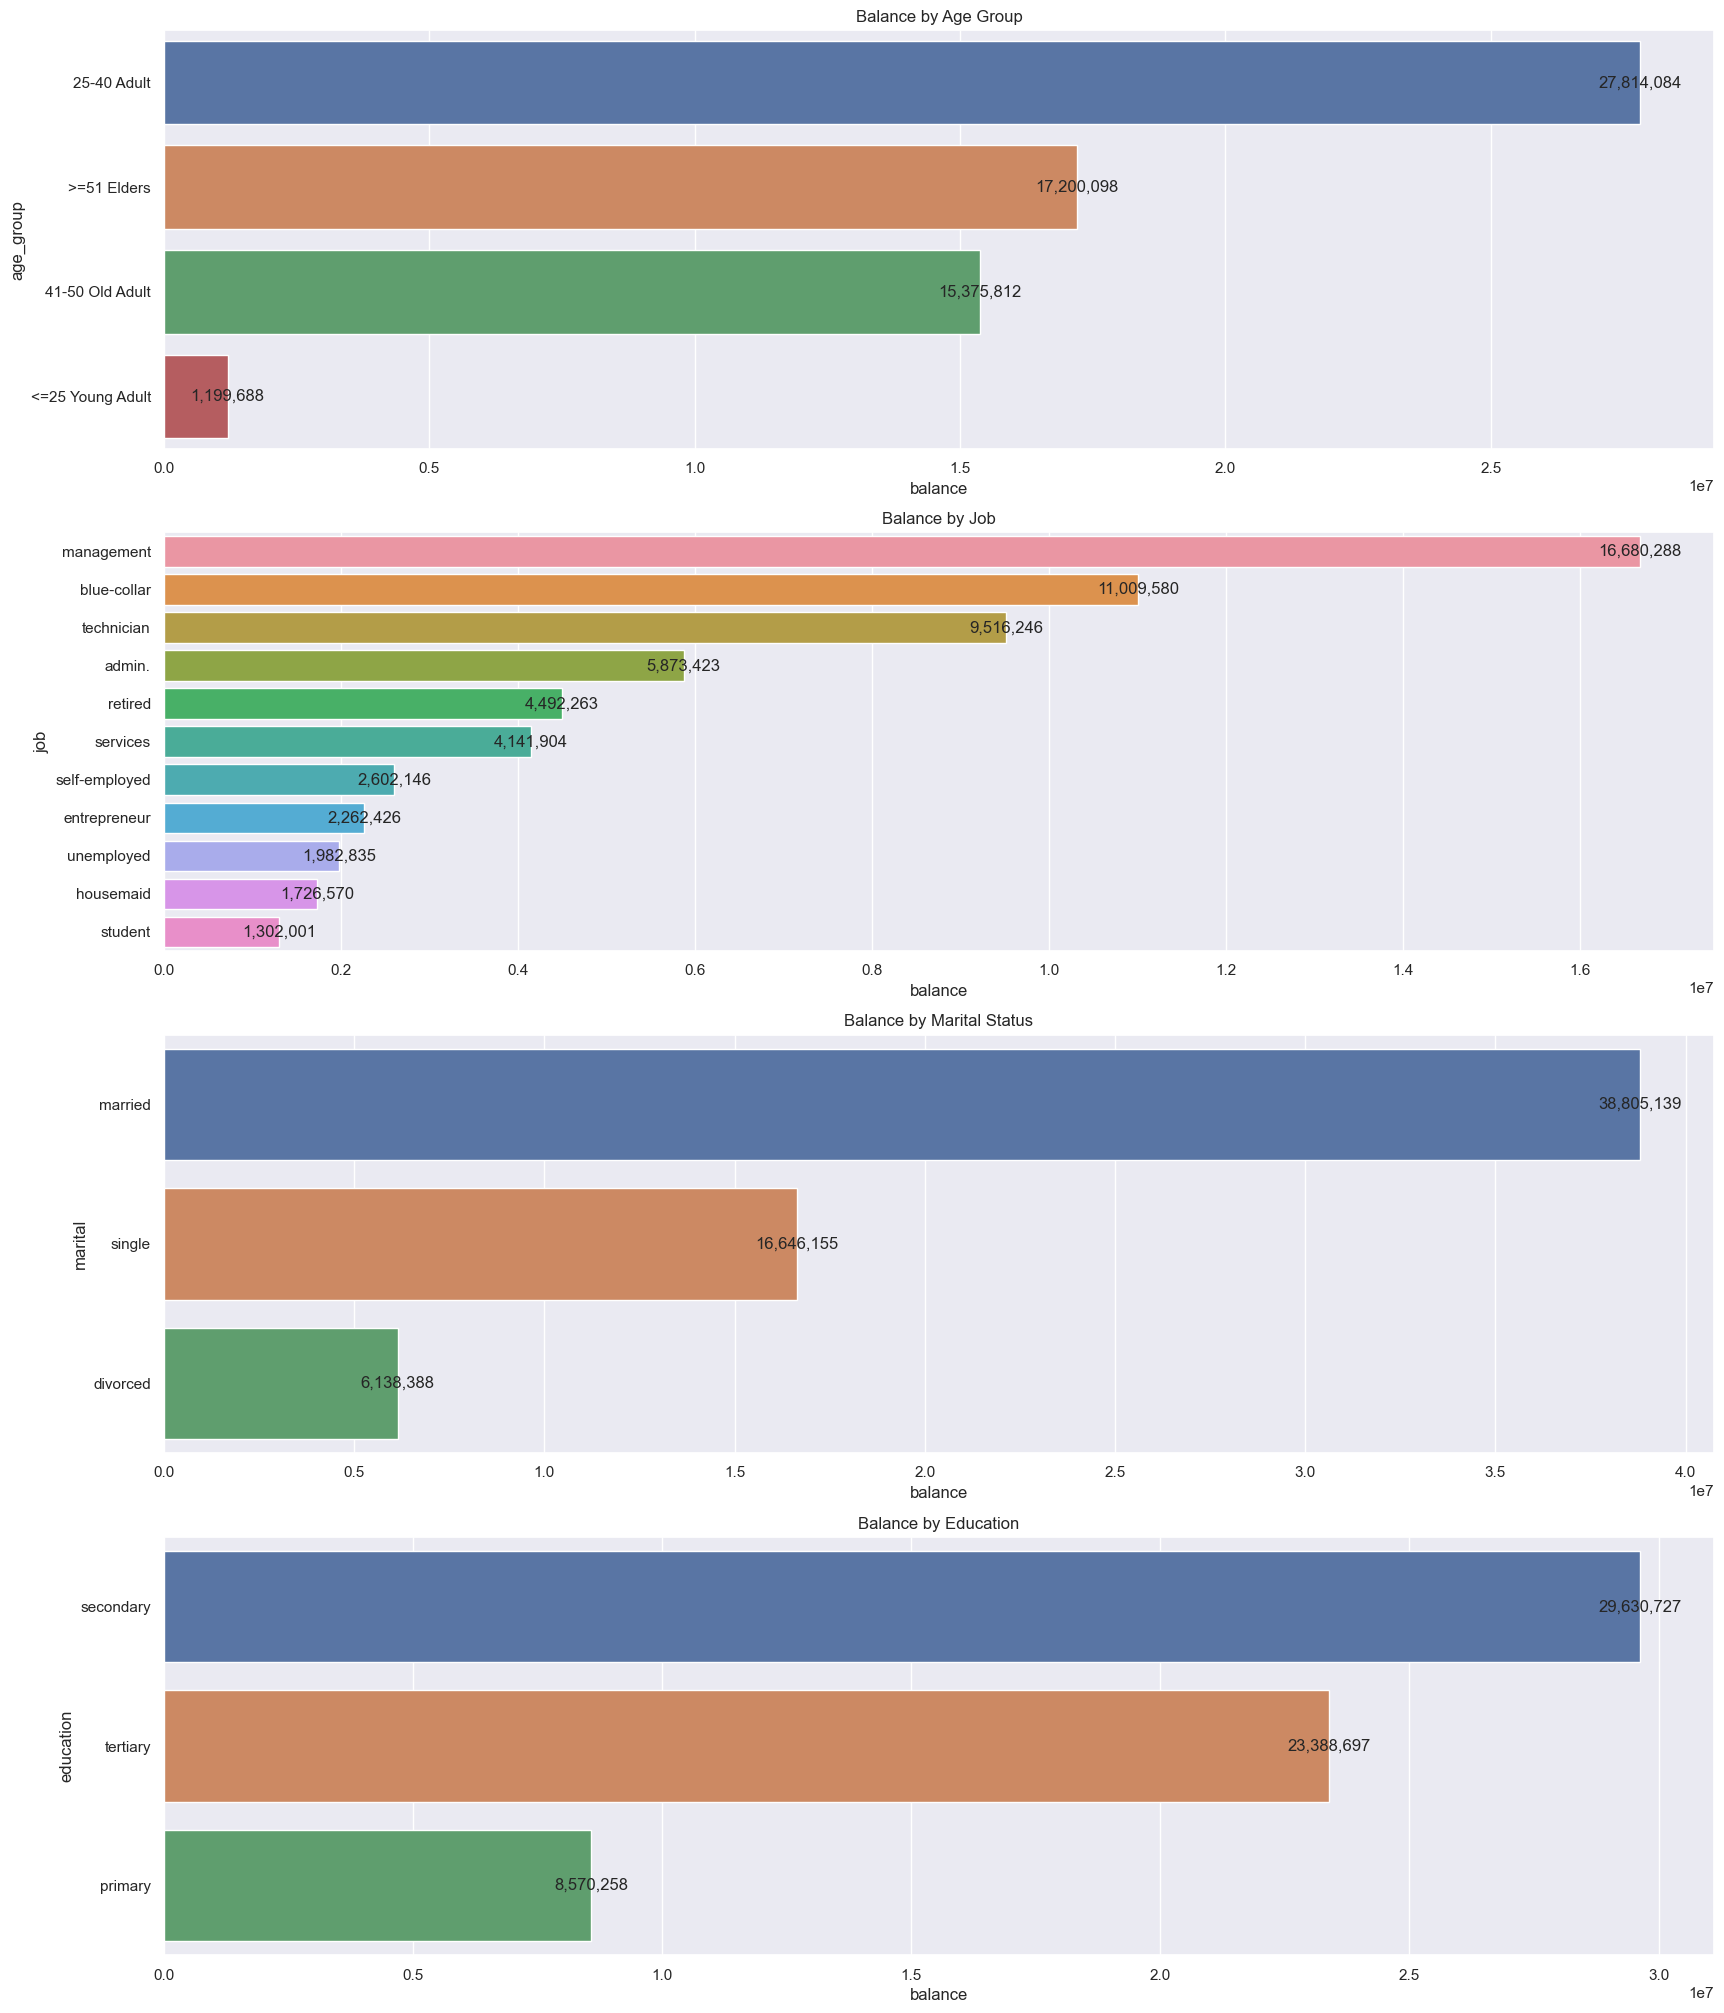

In [31]:
#To view how customer demographics affects Balance
locale.setlocale(locale.LC_ALL, '')

fig, axs = plt.subplots(nrows=4, figsize=(20, 25))

age_bal = capstone1.groupby('age_group')['balance'].sum().sort_values(ascending=False).reset_index()
sns.barplot(y='age_group', data=age_bal, x='balance', ax=axs[0])
axs[0].set_title('Balance by Age Group')
for i, v in enumerate(age_bal['balance']):
    axs[0].text(v, i, f"{locale.format_string('%d', v, grouping=True)}", ha='center', va='center')

job_bal = capstone1.groupby('job')['balance'].sum().sort_values(ascending=False).reset_index()
sns.barplot(y='job', data=job_bal, x='balance', ax=axs[1])
axs[1].set_title('Balance by Job')
for i, v in enumerate(job_bal['balance']):
    axs[1].text(v, i, f"{locale.format_string('%d', v, grouping=True)}", ha='center', va='center')

marital_bal = capstone1.groupby('marital')['balance'].sum().sort_values(ascending=False).reset_index()
sns.barplot(y='marital', data=marital_bal, x='balance', ax=axs[2])
axs[2].set_title('Balance by Marital Status')
for i, v in enumerate(marital_bal['balance']):
    axs[2].text(v, i, f"{locale.format_string('%d', v, grouping=True)}", ha='center', va='center')

education_bal = capstone1.groupby('education')['balance'].sum().sort_values(ascending=False).reset_index()
sns.barplot(y='education', data=education_bal, x='balance', ax=axs[3])
axs[3].set_title('Balance by Education')
for i, v in enumerate(education_bal['balance']):
    axs[3].text(v, i, f"{locale.format_string('%d', v, grouping=True)}", ha='center', va='center')

plt.show()

Observation:
Customers who fall within the age group of 25 to 40 years contribute the most in terms of deposit. This is a reflection of the most of the accounts opened being attributed to the same age group. Although the Blue-collar workers have a higher number of accounts compared to Managment workers, the deposit contributed is less( N5MM Less). The un-employed, housemaid and students contribute the least (below N2MM). This is probably as a result of the nature of their sources of income. However, deposits by the self-employed and entrepreneurs is low. This is also reflected in the number of accounts opened by these categories. Nexus Bank obviously has a lot of work to do in terms of focusing on these areas to drive deposits.

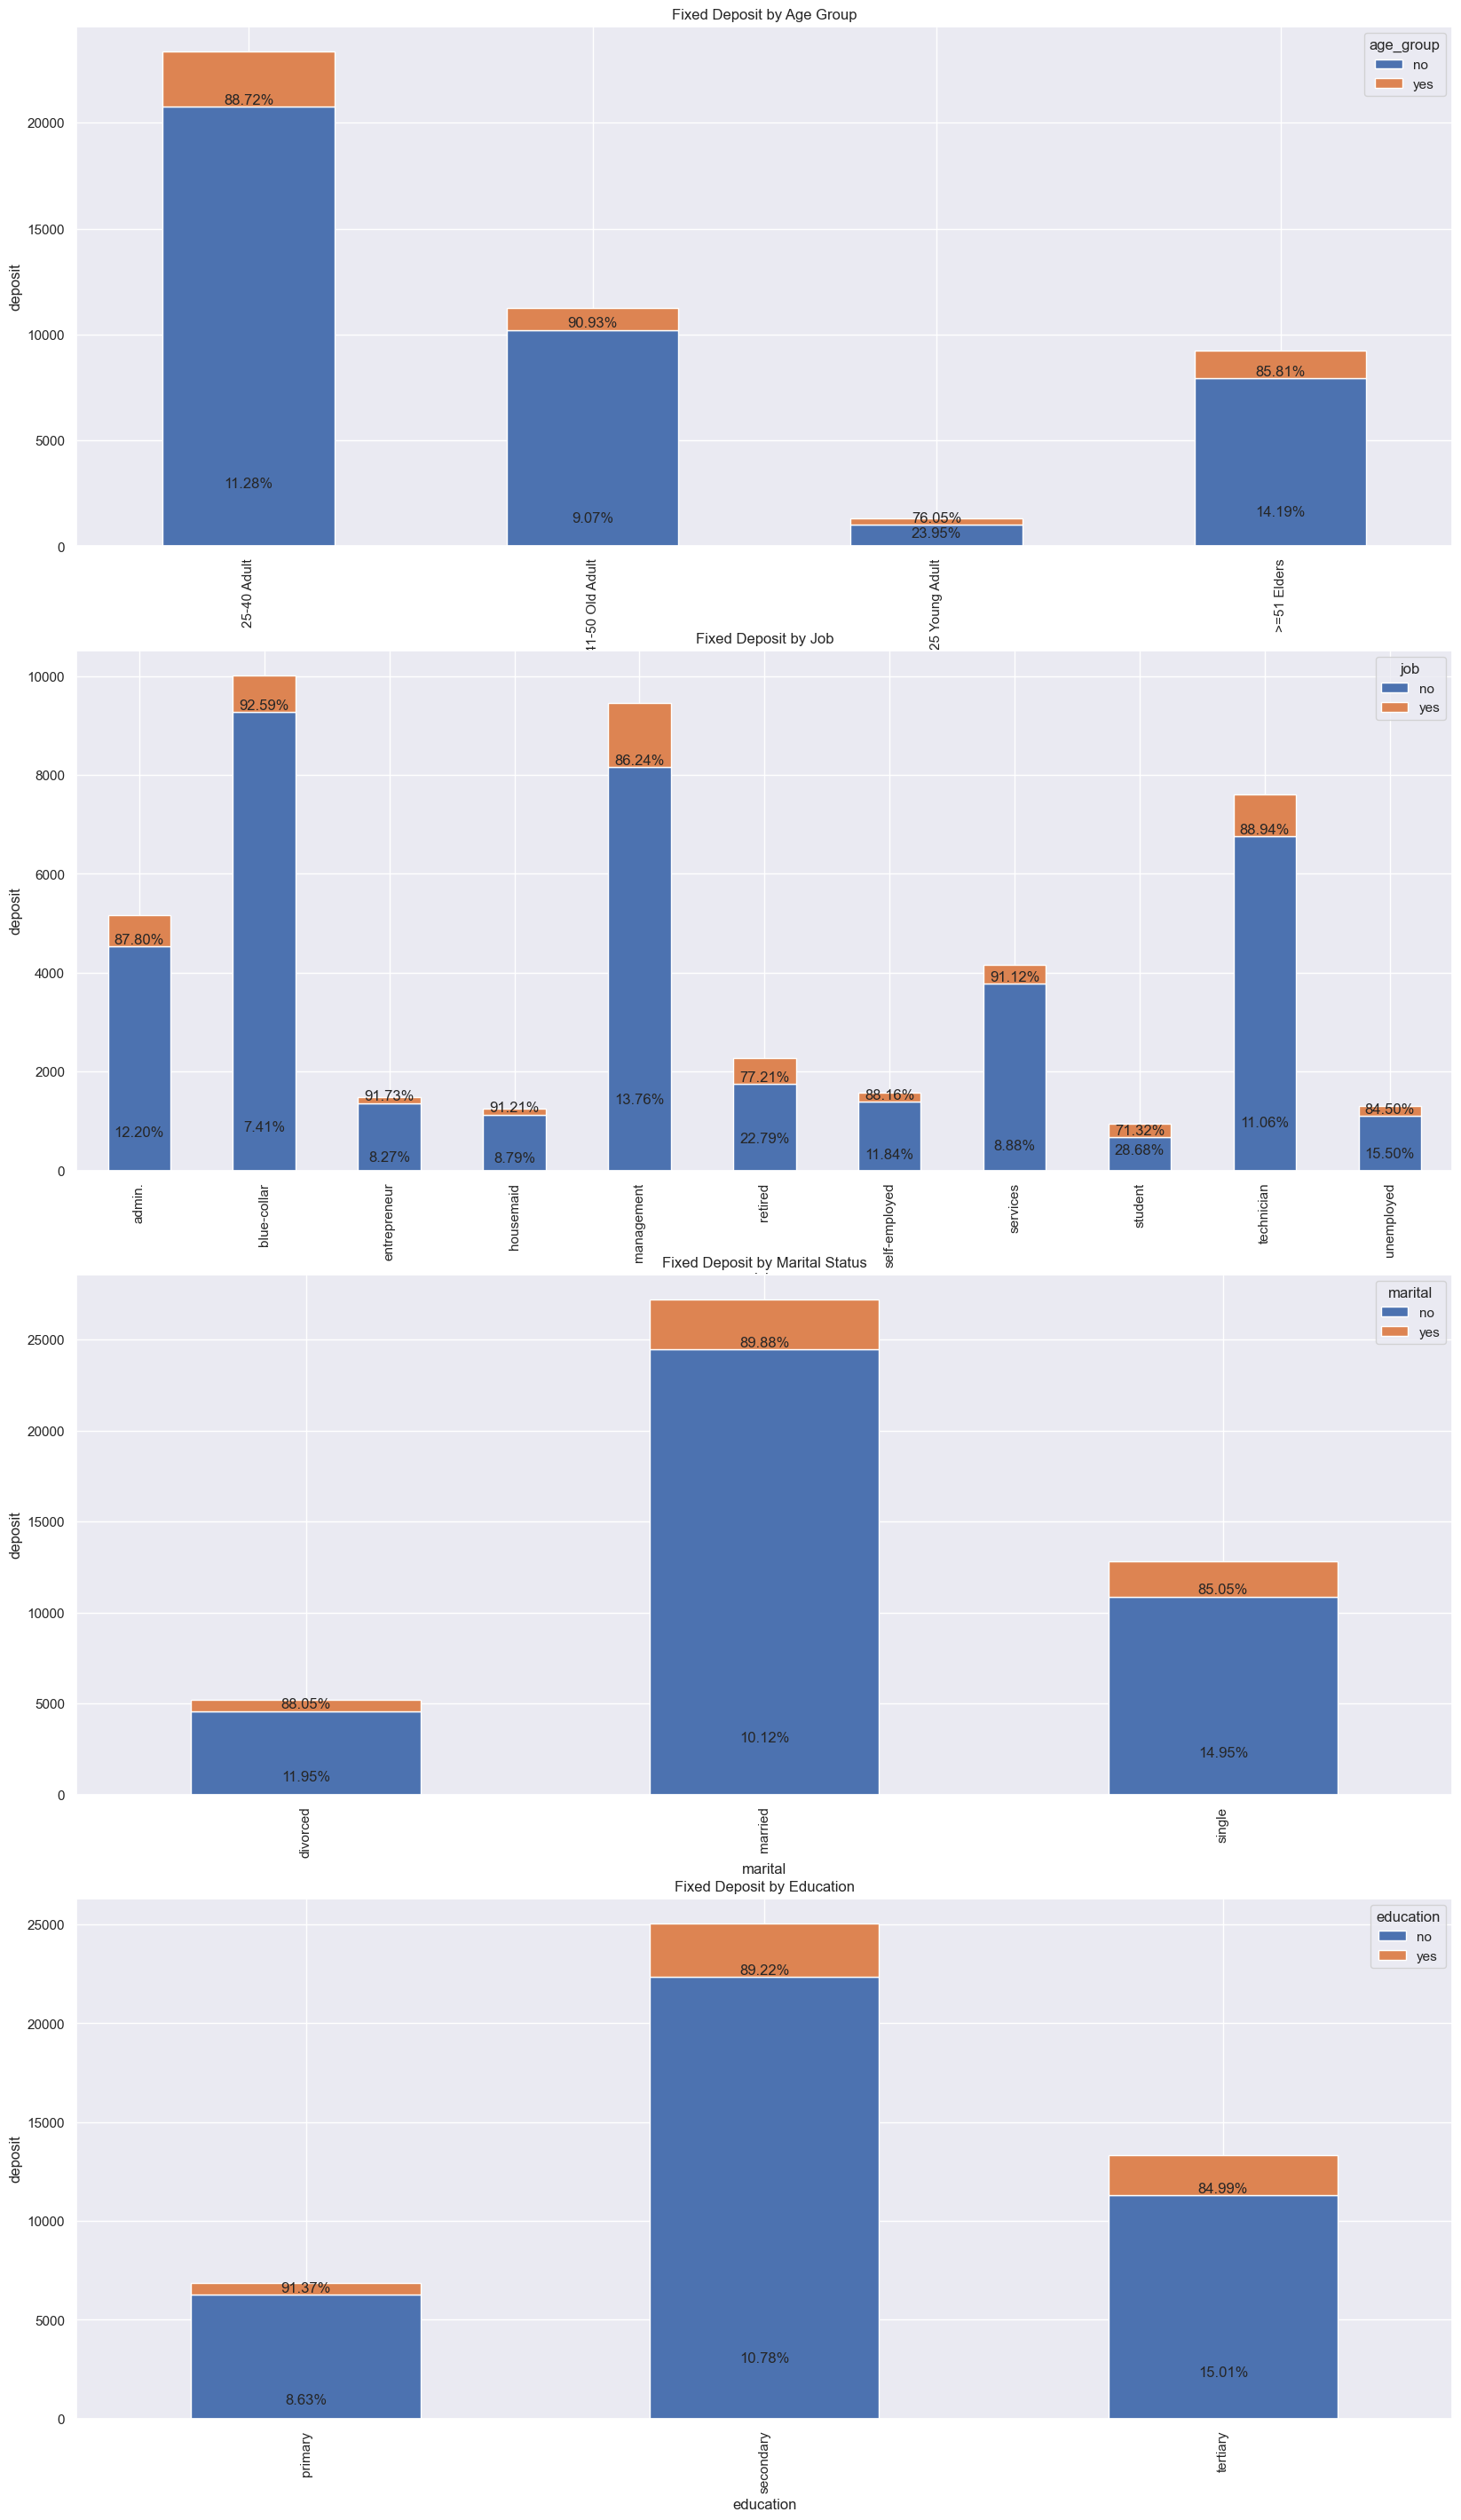

In [32]:
#To view how customer demographics affects Fixed deposit


fig, axs = plt.subplots(nrows=4, figsize=(20, 35))

age_deposit = pd.crosstab(capstone1['age_group'], capstone1['deposit'])
sns.set(style="darkgrid")
age_deposit.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_xlabel('age_group')
axs[0].set_ylabel('deposit')
axs[0].set_title('Fixed Deposit by Age Group')
axs[0].legend(title='age_group')

job_deposit = pd.crosstab(capstone1['job'], capstone1['deposit'])
sns.set(style="darkgrid")
job_deposit.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_xlabel('job')
axs[1].set_ylabel('deposit')
axs[1].set_title('Fixed Deposit by Job')
axs[1].legend(title='job')

marital_deposit = pd.crosstab(capstone1['marital'], capstone1['deposit'])
sns.set(style="darkgrid")
marital_deposit.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_xlabel('marital')
axs[2].set_ylabel('deposit')
axs[2].set_title('Fixed Deposit by Marital Status')
axs[2].legend(title='marital')

education_deposit = pd.crosstab(capstone1['education'], capstone1['deposit'])
sns.set(style="darkgrid")
education_deposit.plot(kind='bar', stacked=True, ax=axs[3])
axs[3].set_xlabel('education')
axs[3].set_ylabel('deposit')
axs[3].set_title('Fixed Deposit by Education')
axs[3].legend(title='education')

for i in range(len(age_deposit)):
    for j in range(len(age_deposit.columns)):
        count = age_deposit.iloc[i, j]
        percent = count / age_deposit.iloc[i].sum() * 100
        axs[0].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(job_deposit)):
    for j in range(len(job_deposit.columns)):
        count = job_deposit.iloc[i, j]
        percent = count / job_deposit.iloc[i].sum() * 100
        axs[1].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(marital_deposit)):
    for j in range(len(marital_deposit.columns)):
        count = marital_deposit.iloc[i, j]
        percent = count / marital_deposit.iloc[i].sum() * 100
        axs[2].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(education_deposit)):
    for j in range(len(education_deposit.columns)):
        count = education_deposit.iloc[i, j]
        percent = count / education_deposit.iloc[i].sum() * 100
        axs[3].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

plt.show()

Observation:
This is also a reflection of the general overview of the deposit subscription (88.3% /11.70%). The customer type with the highest subscription is also a reflection of the customers with the highest number of accounts.
1.Age:Customers with the highest subscription to fixed deposits fall with in the age 25 to 40 years.
2.Job:The Blue collar, Management and technician job categories, also have the highest subscription to fixed deposit
3.Education: While customers with secondary education have the highest subscription

As stated earlier, Nexus bank needs to focus on other job categories, age groups and education brackground. There is alot of potential yet to be mined.

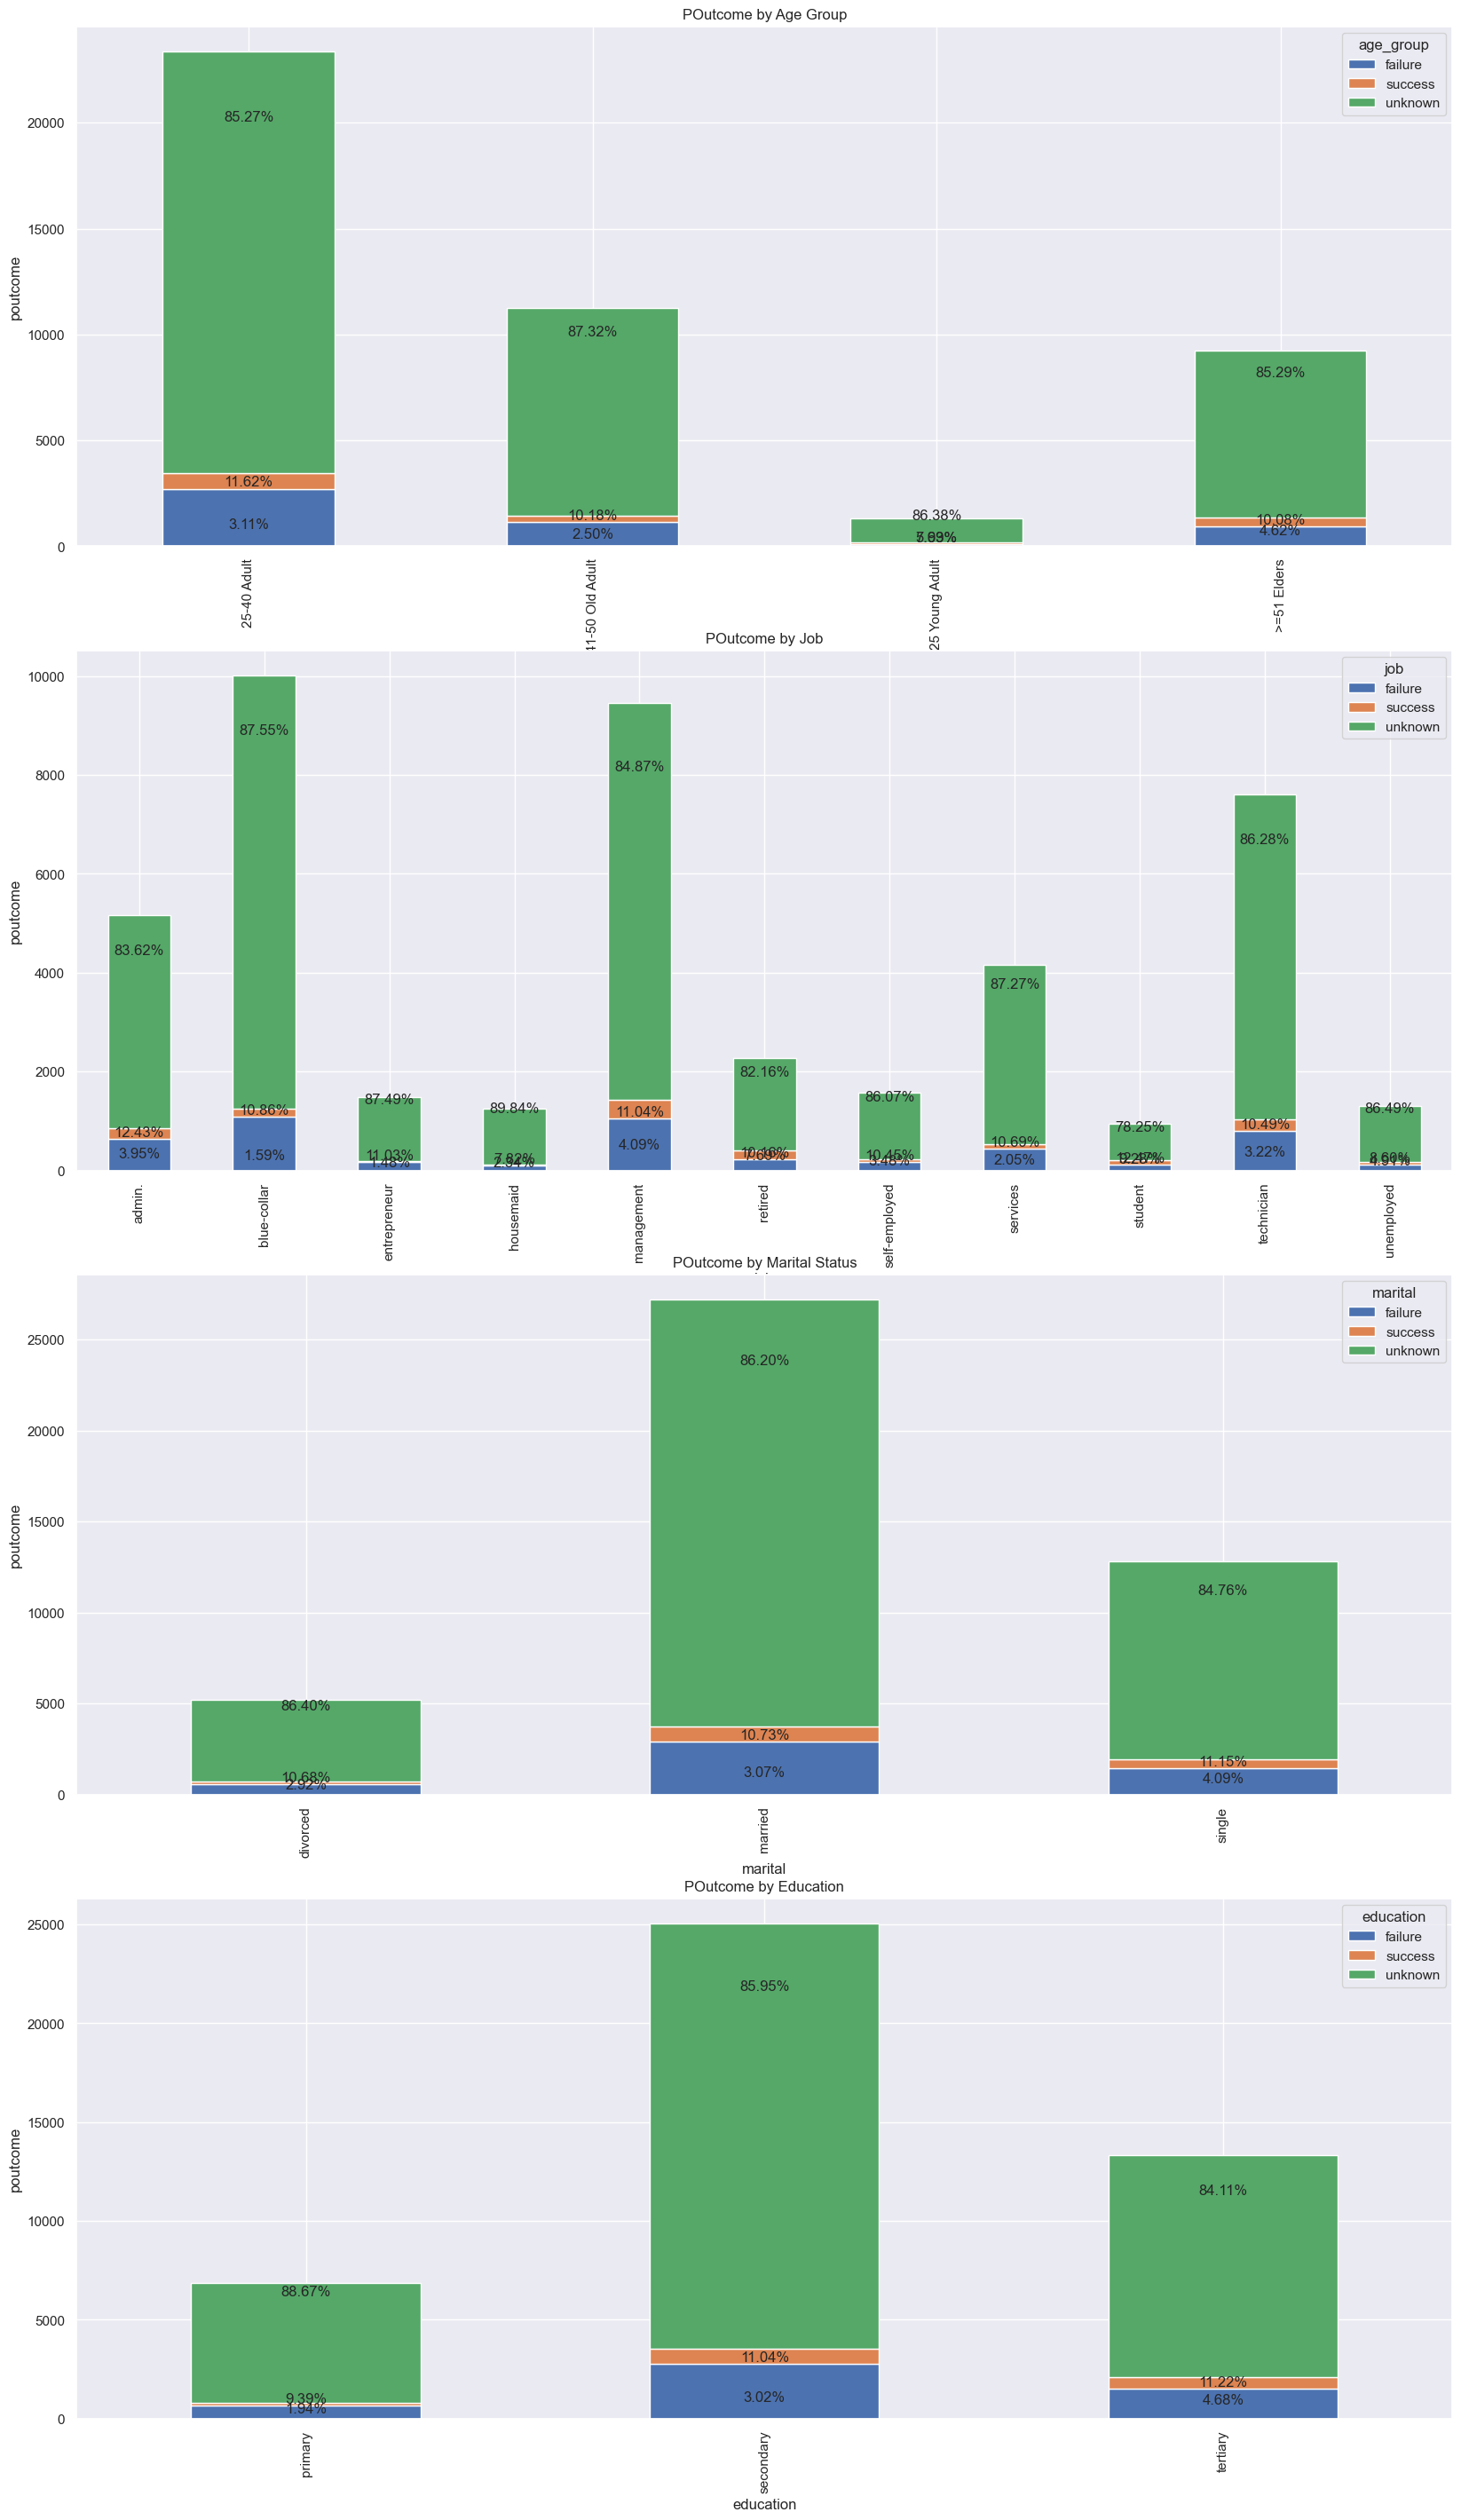

In [33]:
#To view how customer demographics in relation to Poutcome(that is outcome of previous campaign):


fig, axs = plt.subplots(nrows=4, figsize=(20, 35))

age_poutcome = pd.crosstab(capstone1['age_group'], capstone1['poutcome'])
sns.set(style="darkgrid")
age_poutcome.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_xlabel('age_group')
axs[0].set_ylabel('poutcome')
axs[0].set_title('POutcome by Age Group')
axs[0].legend(title='age_group')

job_poutcome = pd.crosstab(capstone1['job'], capstone1['poutcome'])
sns.set(style="darkgrid")
job_poutcome.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_xlabel('job')
axs[1].set_ylabel('poutcome')
axs[1].set_title('POutcome by Job')
axs[1].legend(title='job')

marital_poutcome = pd.crosstab(capstone1['marital'], capstone1['poutcome'])
sns.set(style="darkgrid")
marital_poutcome.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_xlabel('marital')
axs[2].set_ylabel('poutcome')
axs[2].set_title('POutcome by Marital Status')
axs[2].legend(title='marital')

education_poutcome = pd.crosstab(capstone1['education'], capstone1['poutcome'])
sns.set(style="darkgrid")
education_poutcome.plot(kind='bar', stacked=True, ax=axs[3])
axs[3].set_xlabel('education')
axs[3].set_ylabel('poutcome')
axs[3].set_title('POutcome by Education')
axs[3].legend(title='education')

for i in range(len(age_poutcome)):
    for j in range(len(age_poutcome.columns)):
        count = age_poutcome.iloc[i, j]
        percent = count / age_poutcome.iloc[i].sum() * 100
        axs[0].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(job_poutcome)):
    for j in range(len(job_poutcome.columns)):
        count = job_poutcome.iloc[i, j]
        percent = count / job_poutcome.iloc[i].sum() * 100
        axs[1].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(marital_poutcome)):
    for j in range(len(marital_poutcome.columns)):
        count = marital_poutcome.iloc[i, j]
        percent = count / marital_poutcome.iloc[i].sum() * 100
        axs[2].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

for i in range(len(education_poutcome)):
    for j in range(len(education_poutcome.columns)):
        count = education_poutcome.iloc[i, j]
        percent = count / education_poutcome.iloc[i].sum() * 100
        axs[3].text(i, count, f"{percent:.2f}%", ha='center', va='bottom')

plt.show()

Observation:
The charts show that the last campaign was not a success. Success rate is less than 1%. This is also a reflection of the general overview. Nexus bank has to change the campaign strategies previously deployed. Agressive marketing strategies and awareness should be used.

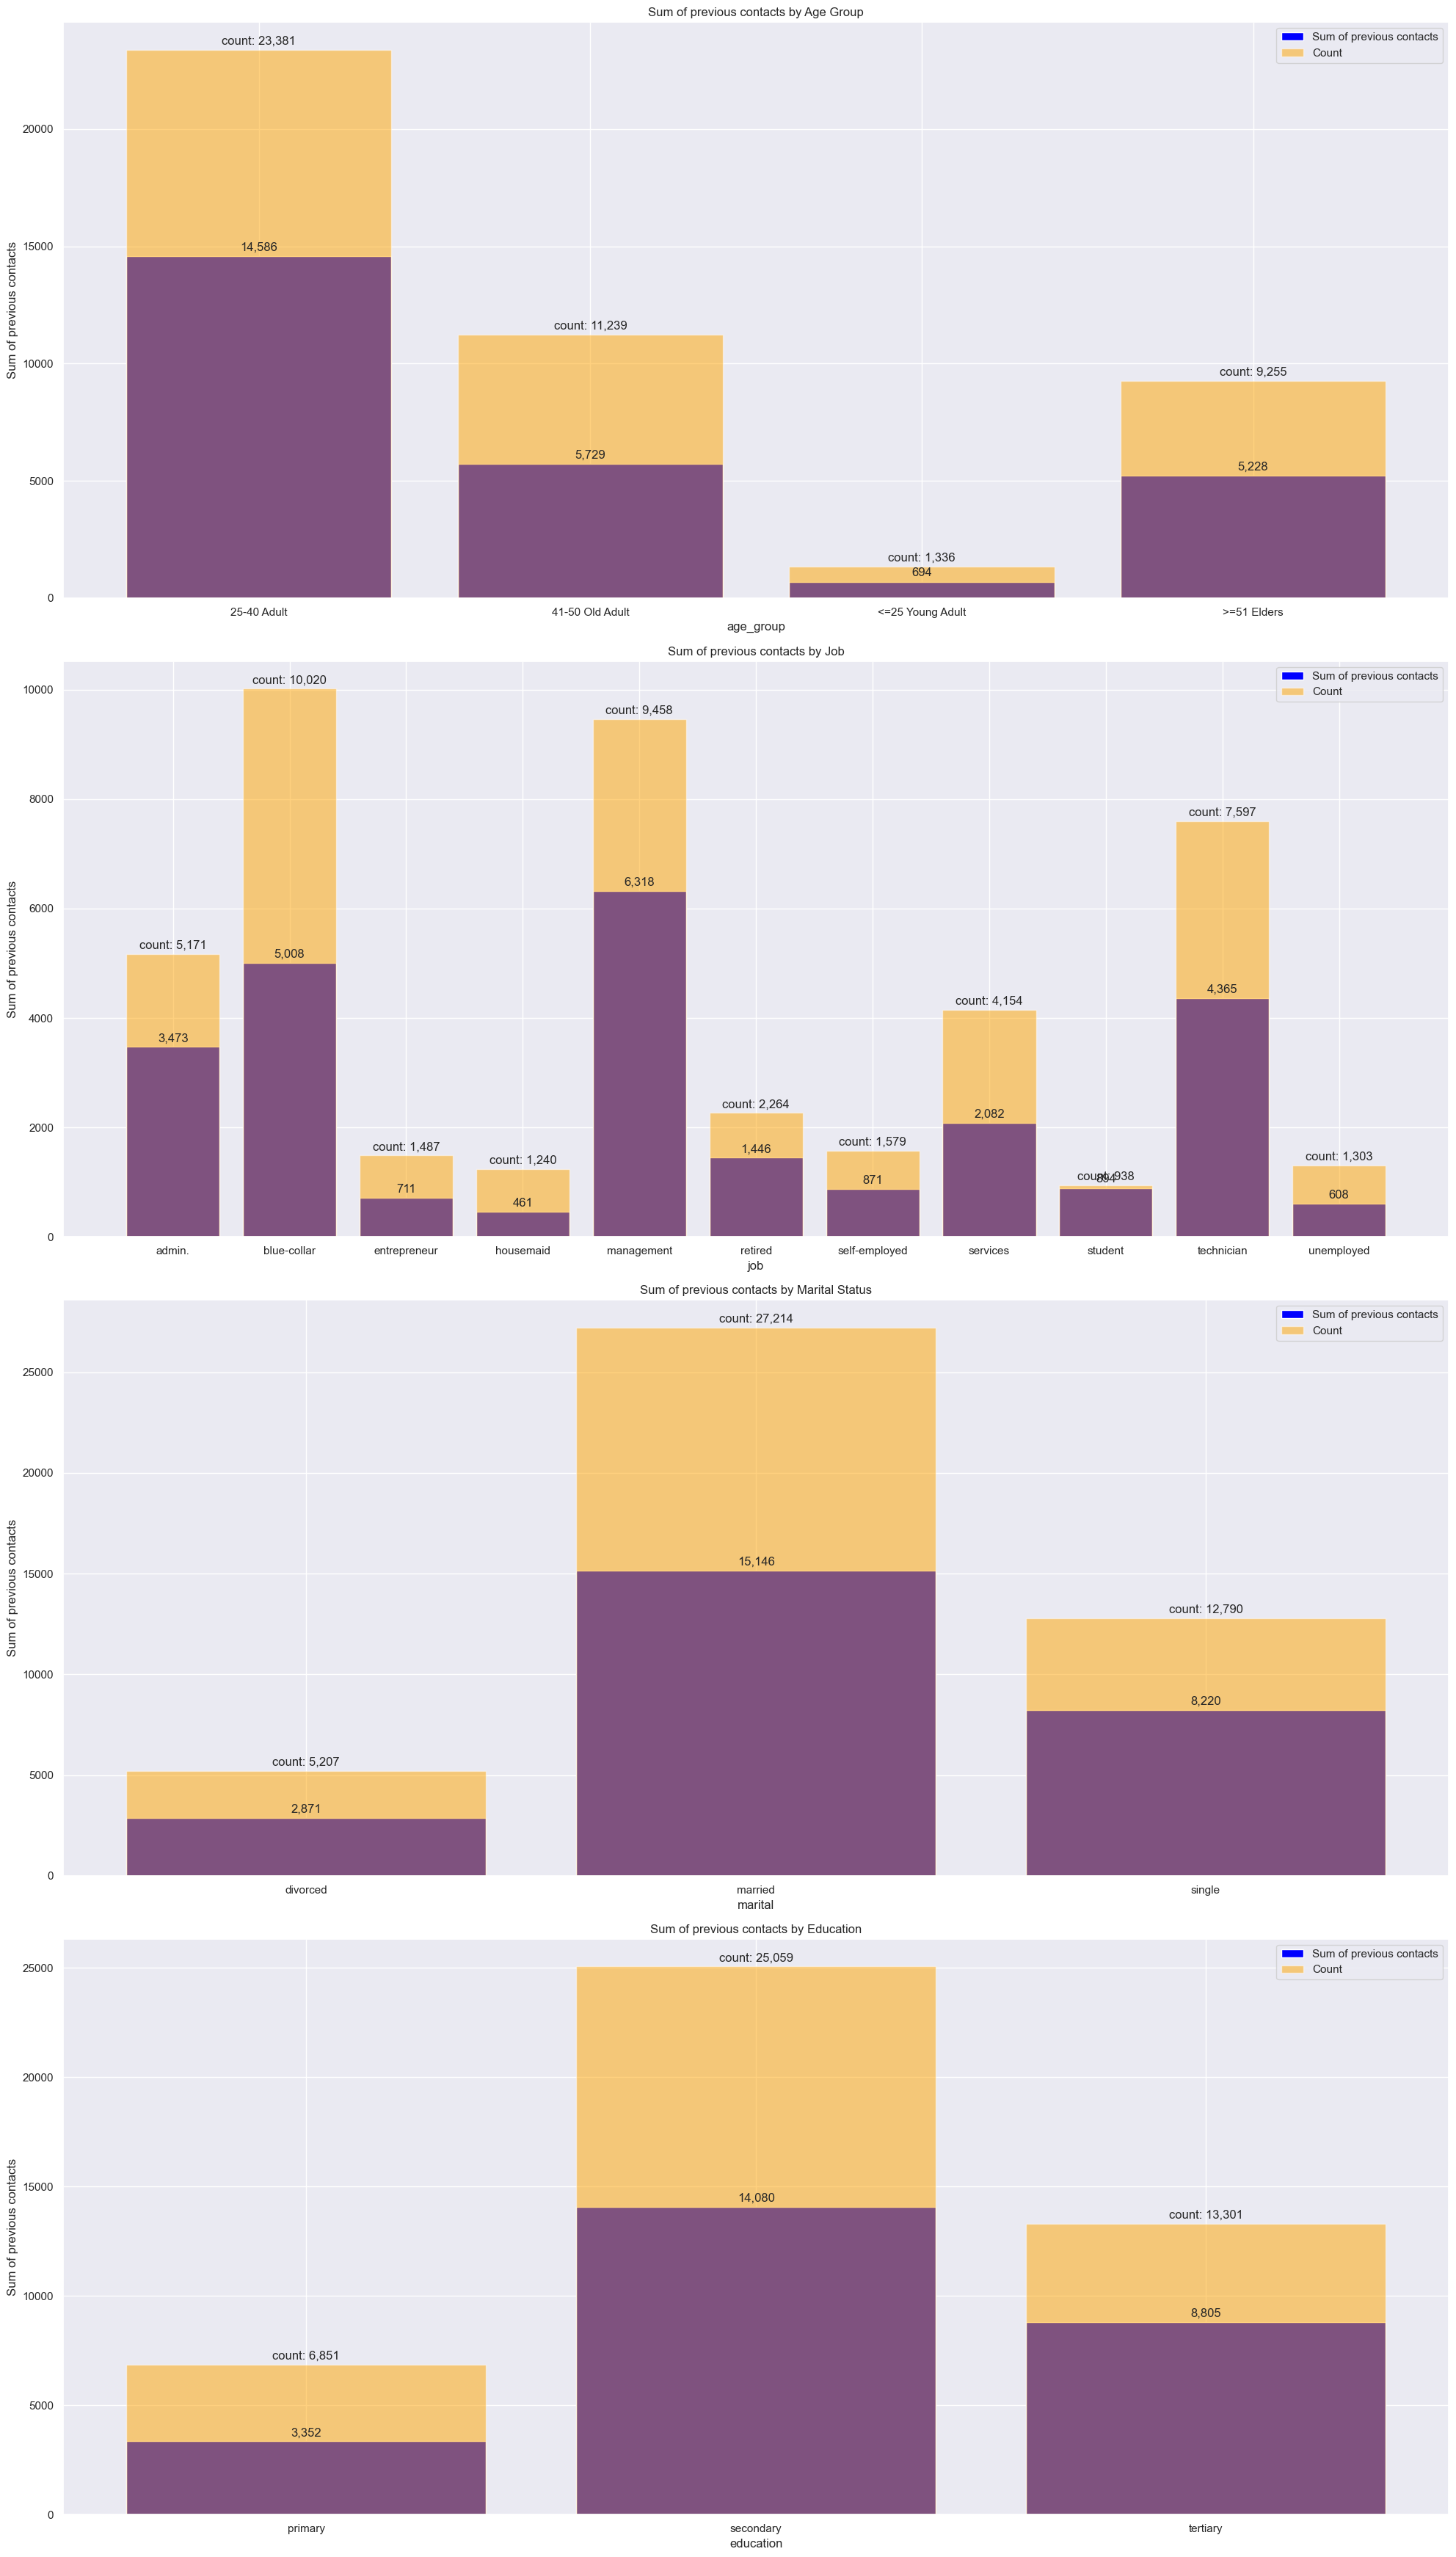

In [34]:
#To compare the number of contacts made to customer before the campaign in various demographics (PREVIOUS)


fig, axs = plt.subplots(nrows=4, figsize=(20, 35))

# Grouping data
age_previous = capstone1.groupby('age_group')['previous'].sum()
age_count = capstone1.groupby('age_group')['previous'].count()

x = np.arange(len(age_previous))

# Plot sum of previous contacts
axs[0].bar(x, age_previous, label='Sum of previous contacts', color='blue')
axs[0].set_xlabel('age_group')
axs[0].set_ylabel('Sum of previous contacts')
axs[0].set_title('Sum of previous contacts by Age Group')

# Plot count of contacts
axs[0].bar(x, age_count, alpha=0.5, label='Count', color='orange')

axs[0].set_xticks(x)
axs[0].set_xticklabels(age_previous.index)
axs[0].legend()

# Annotate count values
for i, (prev, count) in enumerate(zip(age_previous, age_count)):
    axs[0].annotate(f'{prev:,.0f}', xy=(i, prev), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')
    axs[0].annotate(f'count: {count:,.0f}', xy=(i, count), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Repeat the same process for the other subplots

job_previous = capstone1.groupby('job')['previous'].sum()
job_count = capstone1.groupby('job')['previous'].count()

x = np.arange(len(job_previous))

axs[1].bar(x, job_previous, label='Sum of previous contacts', color='blue')
axs[1].set_xlabel('job')
axs[1].set_ylabel('Sum of previous contacts')
axs[1].set_title('Sum of previous contacts by Job')

axs[1].bar(x, job_count, alpha=0.5, label='Count', color='orange')

axs[1].set_xticks(x)
axs[1].set_xticklabels(job_previous.index)
axs[1].legend()

for i, (prev, count) in enumerate(zip(job_previous, job_count)):
    axs[1].annotate(f'{prev:,.0f}', xy=(i, prev), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')
    axs[1].annotate(f'count: {count:,.0f}', xy=(i, count), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Repeat the same process for the remaining subplots

marital_previous = capstone1.groupby('marital')['previous'].sum()
marital_count = capstone1.groupby('marital')['previous'].count()

x = np.arange(len(marital_previous))

axs[2].bar(x, marital_previous, label='Sum of previous contacts', color='blue')
axs[2].set_xlabel('marital')
axs[2].set_ylabel('Sum of previous contacts')
axs[2].set_title('Sum of previous contacts by Marital Status')

axs[2].bar(x, marital_count, alpha=0.5, label='Count', color='orange')

axs[2].set_xticks(x)
axs[2].set_xticklabels(marital_previous.index)
axs[2].legend()

for i, (prev, count) in enumerate(zip(marital_previous, marital_count)):
    axs[2].annotate(f'{prev:,.0f}', xy=(i, prev), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')
    axs[2].annotate(f'count: {count:,.0f}', xy=(i, count), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

education_previous = capstone1.groupby('education')['previous'].sum()
education_count = capstone1.groupby('education')['previous'].count()

x = np.arange(len(education_previous))

axs[3].bar(x, education_previous, label='Sum of previous contacts', color='blue')
axs[3].set_xlabel('education')
axs[3].set_ylabel('Sum of previous contacts')
axs[3].set_title('Sum of previous contacts by Education')

axs[3].bar(x, education_count, alpha=0.5, label='Count', color='orange')

axs[3].set_xticks(x)
axs[3].set_xticklabels(education_previous.index)
axs[3].legend()

for i, (prev, count) in enumerate(zip(education_previous, education_count)):
    axs[3].annotate(f'{prev:,.0f}', xy=(i, prev), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')
    axs[3].annotate(f'count: {count:,.0f}', xy=(i, count), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

Observation:
Across the demographics, the charts above that an average of 50% of the customers were contacted before the present campaign. The pattern already shows that history may be repeated in terms of the success of the campaign. It is imperative that Nexus Bank carries out continous customer engagment during the course of the business year.

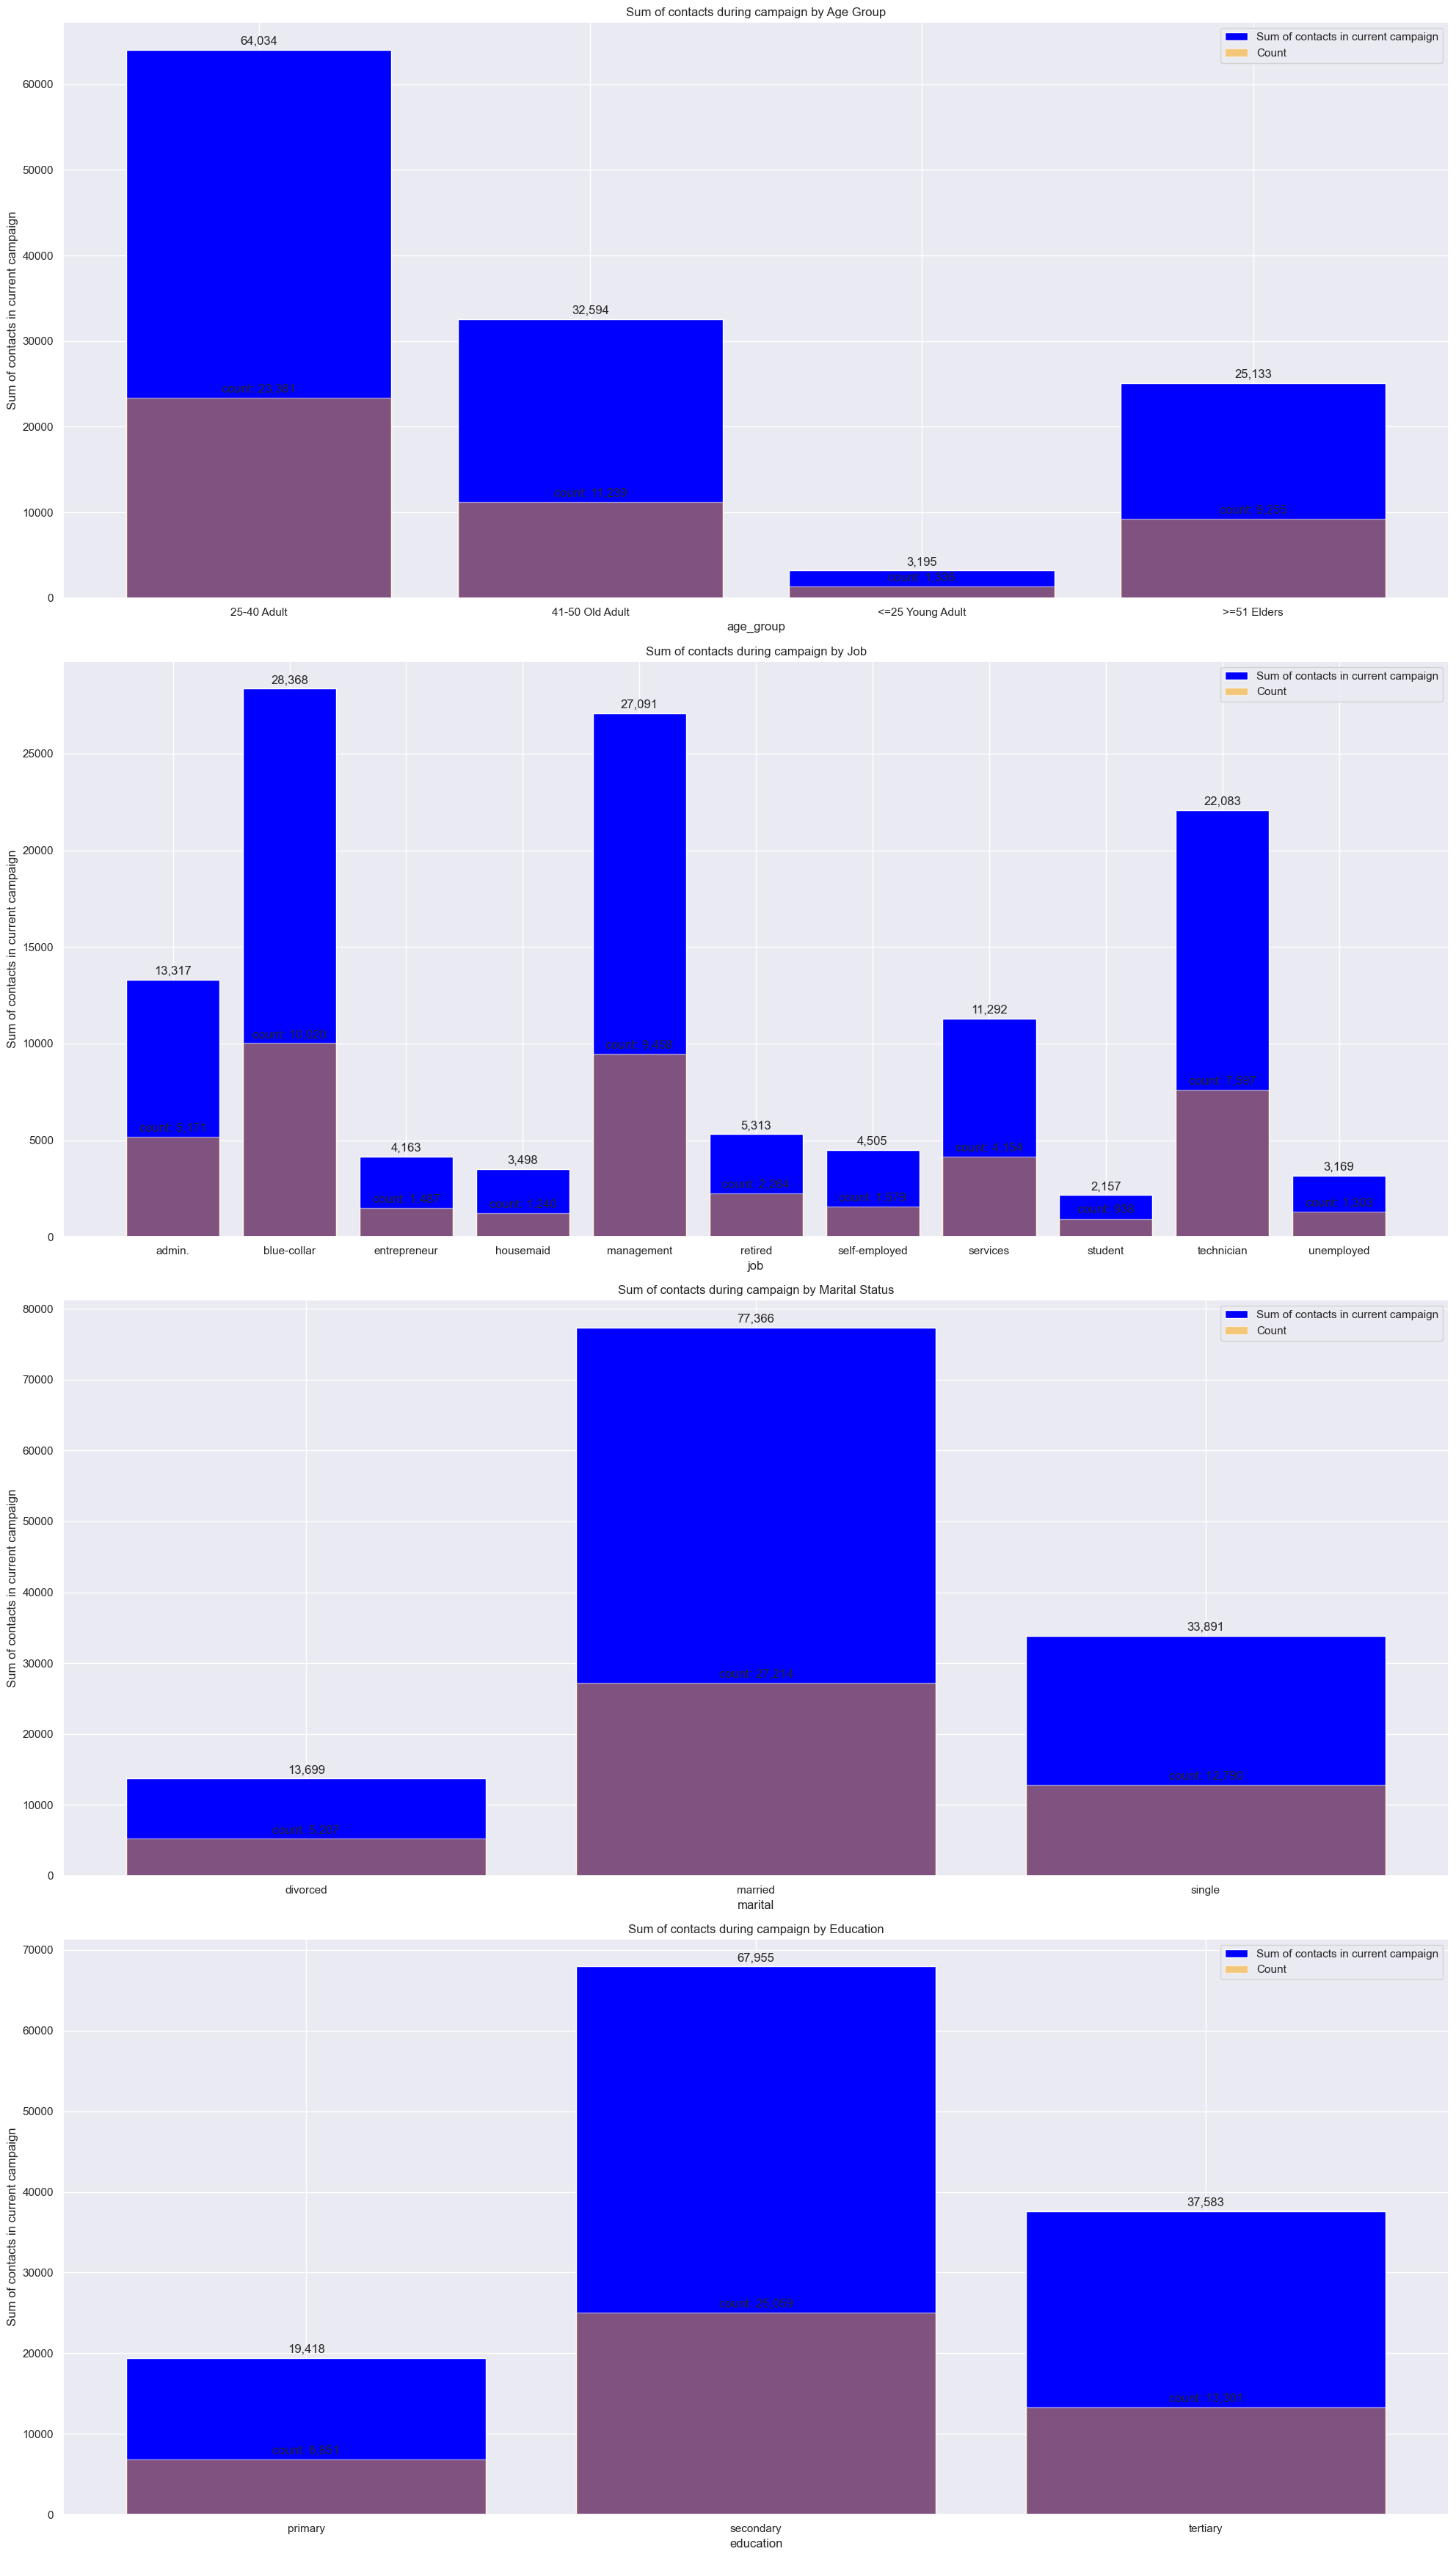

In [35]:
#To compare the number of contacts made to customer during the campaign in various demographics (CAMPAIGN)


fig, axs = plt.subplots(nrows=4, figsize=(20, 35))

# Grouping data
age_campaign = capstone1.groupby('age_group')['campaign'].sum()
age_count = capstone1.groupby('age_group')['campaign'].count()

x = np.arange(len(age_campaign))

# Plot sum of contacts
axs[0].bar(x, age_campaign, label='Sum of contacts in current campaign', color='blue')
axs[0].set_xlabel('age_group')
axs[0].set_ylabel('Sum of contacts in current campaign')
axs[0].set_title('Sum of contacts during campaign by Age Group')

# Plot count of contacts
axs[0].bar(x, age_count, alpha=0.5, label='Count', color='orange')

axs[0].set_xticks(x)
axs[0].set_xticklabels(age_campaign.index)
axs[0].legend()

# Annotate count values
for i, (campaign, count) in enumerate(zip(age_campaign, age_count)):
    axs[0].annotate(f'{campaign:,.0f}', xy=(i, campaign), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')
    axs[0].annotate(f'count: {count:,.0f}', xy=(i, count), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Repeat the same process for the other subplots

job_campaign = capstone1.groupby('job')['campaign'].sum()
job_count = capstone1.groupby('job')['campaign'].count()

x = np.arange(len(job_campaign))

axs[1].bar(x, job_campaign, label='Sum of contacts in current campaign', color='blue')
axs[1].set_xlabel('job')
axs[1].set_ylabel('Sum of contacts in current campaign')
axs[1].set_title('Sum of contacts during campaign by Job')

axs[1].bar(x, job_count, alpha=0.5, label='Count', color='orange')

axs[1].set_xticks(x)
axs[1].set_xticklabels(job_campaign.index)
axs[1].legend()

for i, (campaign, count) in enumerate(zip(job_campaign, job_count)):
    axs[1].annotate(f'{campaign:,.0f}', xy=(i, campaign), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')
    axs[1].annotate(f'count: {count:,.0f}', xy=(i, count), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Repeat the same process for the remaining subplots

marital_campaign = capstone1.groupby('marital')['campaign'].sum()
marital_count = capstone1.groupby('marital')['campaign'].count()

x = np.arange(len(marital_campaign))

axs[2].bar(x, marital_campaign, label='Sum of contacts in current campaign', color='blue')
axs[2].set_xlabel('marital')
axs[2].set_ylabel('Sum of contacts in current campaign')
axs[2].set_title('Sum of contacts during campaign by Marital Status')

axs[2].bar(x, marital_count, alpha=0.5, label='Count', color='orange')

axs[2].set_xticks(x)
axs[2].set_xticklabels(marital_campaign.index)
axs[2].legend()

for i, (campaign, count) in enumerate(zip(marital_campaign, marital_count)):
    axs[2].annotate(f'{campaign:,.0f}', xy=(i, campaign), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')
    axs[2].annotate(f'count: {count:,.0f}', xy=(i, count), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

education_campaign = capstone1.groupby('education')['campaign'].sum()
education_count = capstone1.groupby('education')['campaign'].count()

x = np.arange(len(education_campaign))

axs[3].bar(x, education_campaign, label='Sum of contacts in current campaign', color='blue')
axs[3].set_xlabel('education')
axs[3].set_ylabel('Sum of contacts in current campaign')
axs[3].set_title('Sum of contacts during campaign by Education')

axs[3].bar(x, education_count, alpha=0.5, label='Count', color='orange')

axs[3].set_xticks(x)
axs[3].set_xticklabels(education_campaign.index)
axs[3].legend()

for i, (campaign, count) in enumerate(zip(education_campaign, education_count)):
    axs[3].annotate(f'{campaign:,.0f}', xy=(i, campaign), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')
    axs[3].annotate(f'count: {count:,.0f}', xy=(i, count), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

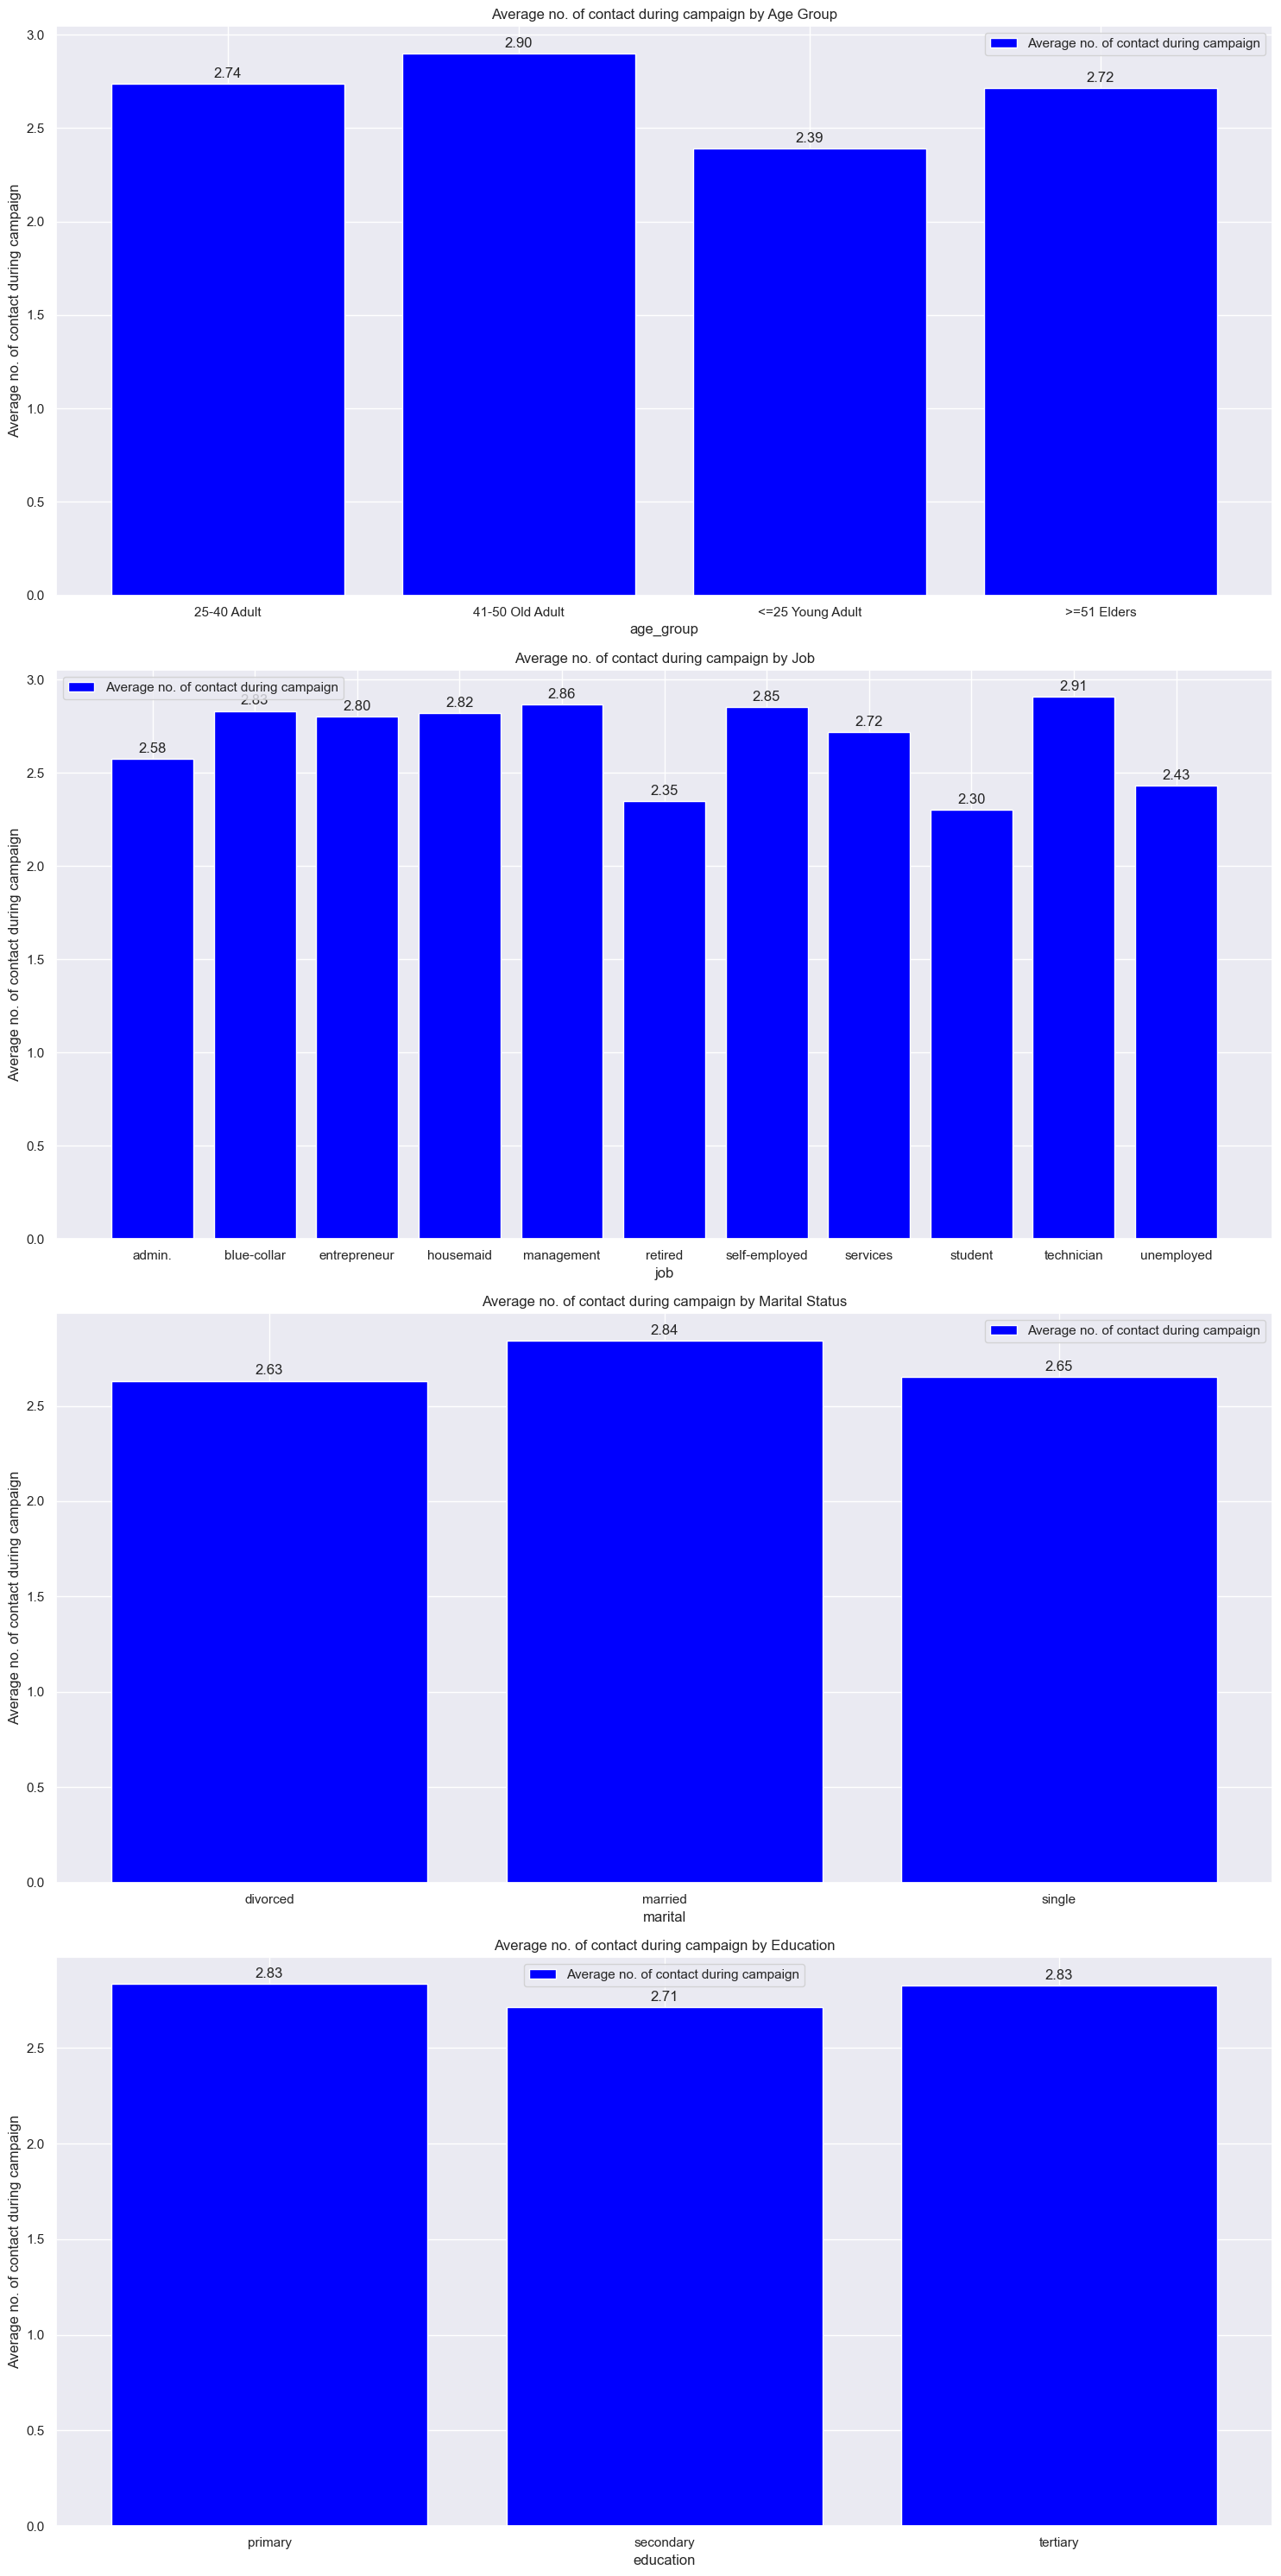

In [36]:
#To show average contact during current campaign per person in various demographics(CAMPAIGN)

fig, axs = plt.subplots(nrows=4, figsize=(15, 30))

# Grouping data
age_campaign = capstone1.groupby('age_group')['campaign'].mean()

x = np.arange(len(age_campaign))

# Plot average campaign
axs[0].bar(x, age_campaign, label='Average no. of contact during campaign', color='blue')
axs[0].set_xlabel('age_group')
axs[0].set_ylabel('Average no. of contact during campaign')
axs[0].set_title('Average no. of contact during campaign by Age Group')

axs[0].set_xticks(x)
axs[0].set_xticklabels(age_campaign.index)
axs[0].legend()

# Annotate average campaign values
for i, campaign in enumerate(age_campaign):
    axs[0].annotate(f'{campaign:.2f}', xy=(i, campaign), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Repeat the same process for the other subplots

job_campaign = capstone1.groupby('job')['campaign'].mean()

x = np.arange(len(job_campaign))

axs[1].bar(x, job_campaign, label='Average no. of contact during campaign', color='blue')
axs[1].set_xlabel('job')
axs[1].set_ylabel('Average no. of contact during campaign')
axs[1].set_title('Average no. of contact during campaign by Job')

axs[1].set_xticks(x)
axs[1].set_xticklabels(job_campaign.index)
axs[1].legend()

for i, campaign in enumerate(job_campaign):
    axs[1].annotate(f'{campaign:.2f}', xy=(i, campaign), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Repeat the same process for the remaining subplots

marital_campaign = capstone1.groupby('marital')['campaign'].mean()

x = np.arange(len(marital_campaign))

axs[2].bar(x, marital_campaign, label='Average no. of contact during campaign', color='blue')
axs[2].set_xlabel('marital')
axs[2].set_ylabel('Average no. of contact during campaign')
axs[2].set_title('Average no. of contact during campaign by Marital Status')

axs[2].set_xticks(x)
axs[2].set_xticklabels(marital_campaign.index)
axs[2].legend()

for i, campaign in enumerate(marital_campaign):
    axs[2].annotate(f'{campaign:.2f}', xy=(i, campaign), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

education_campaign = capstone1.groupby('education')['campaign'].mean()

x = np.arange(len(education_campaign))

axs[3].bar(x, education_campaign, label='Average no. of contact during campaign', color='blue')
axs[3].set_xlabel('education')
axs[3].set_ylabel('Average no. of contact during campaign')
axs[3].set_title('Average no. of contact during campaign by Education')

axs[3].set_xticks(x)
axs[3].set_xticklabels(education_campaign.index)
axs[3].legend()

for i, campaign in enumerate(education_campaign):
    axs[3].annotate(f'{campaign:.2f}', xy=(i, campaign), xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

Observation:
This shows that customers have been contacted more than 2 times during the current campaign. This is a positive development. As there should be more customer awareness and a better success rate. However, there should be constant customer engagement through out the course of the business year regadless of campaigns being conducted.

Multivariate Analysis

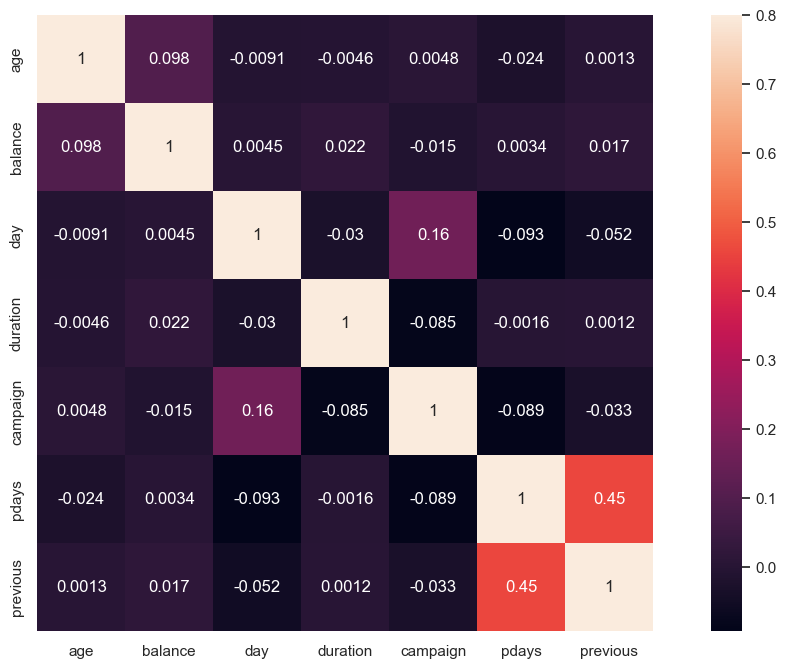

In [37]:
#Correlation; examining a column against another column
a= capstone1.corr()
f,ax= plt.subplots(figsize=(15,8))
sns.heatmap(a, vmax=.8, square=True, annot=True);

Observation: there is no strong relationship between the variables

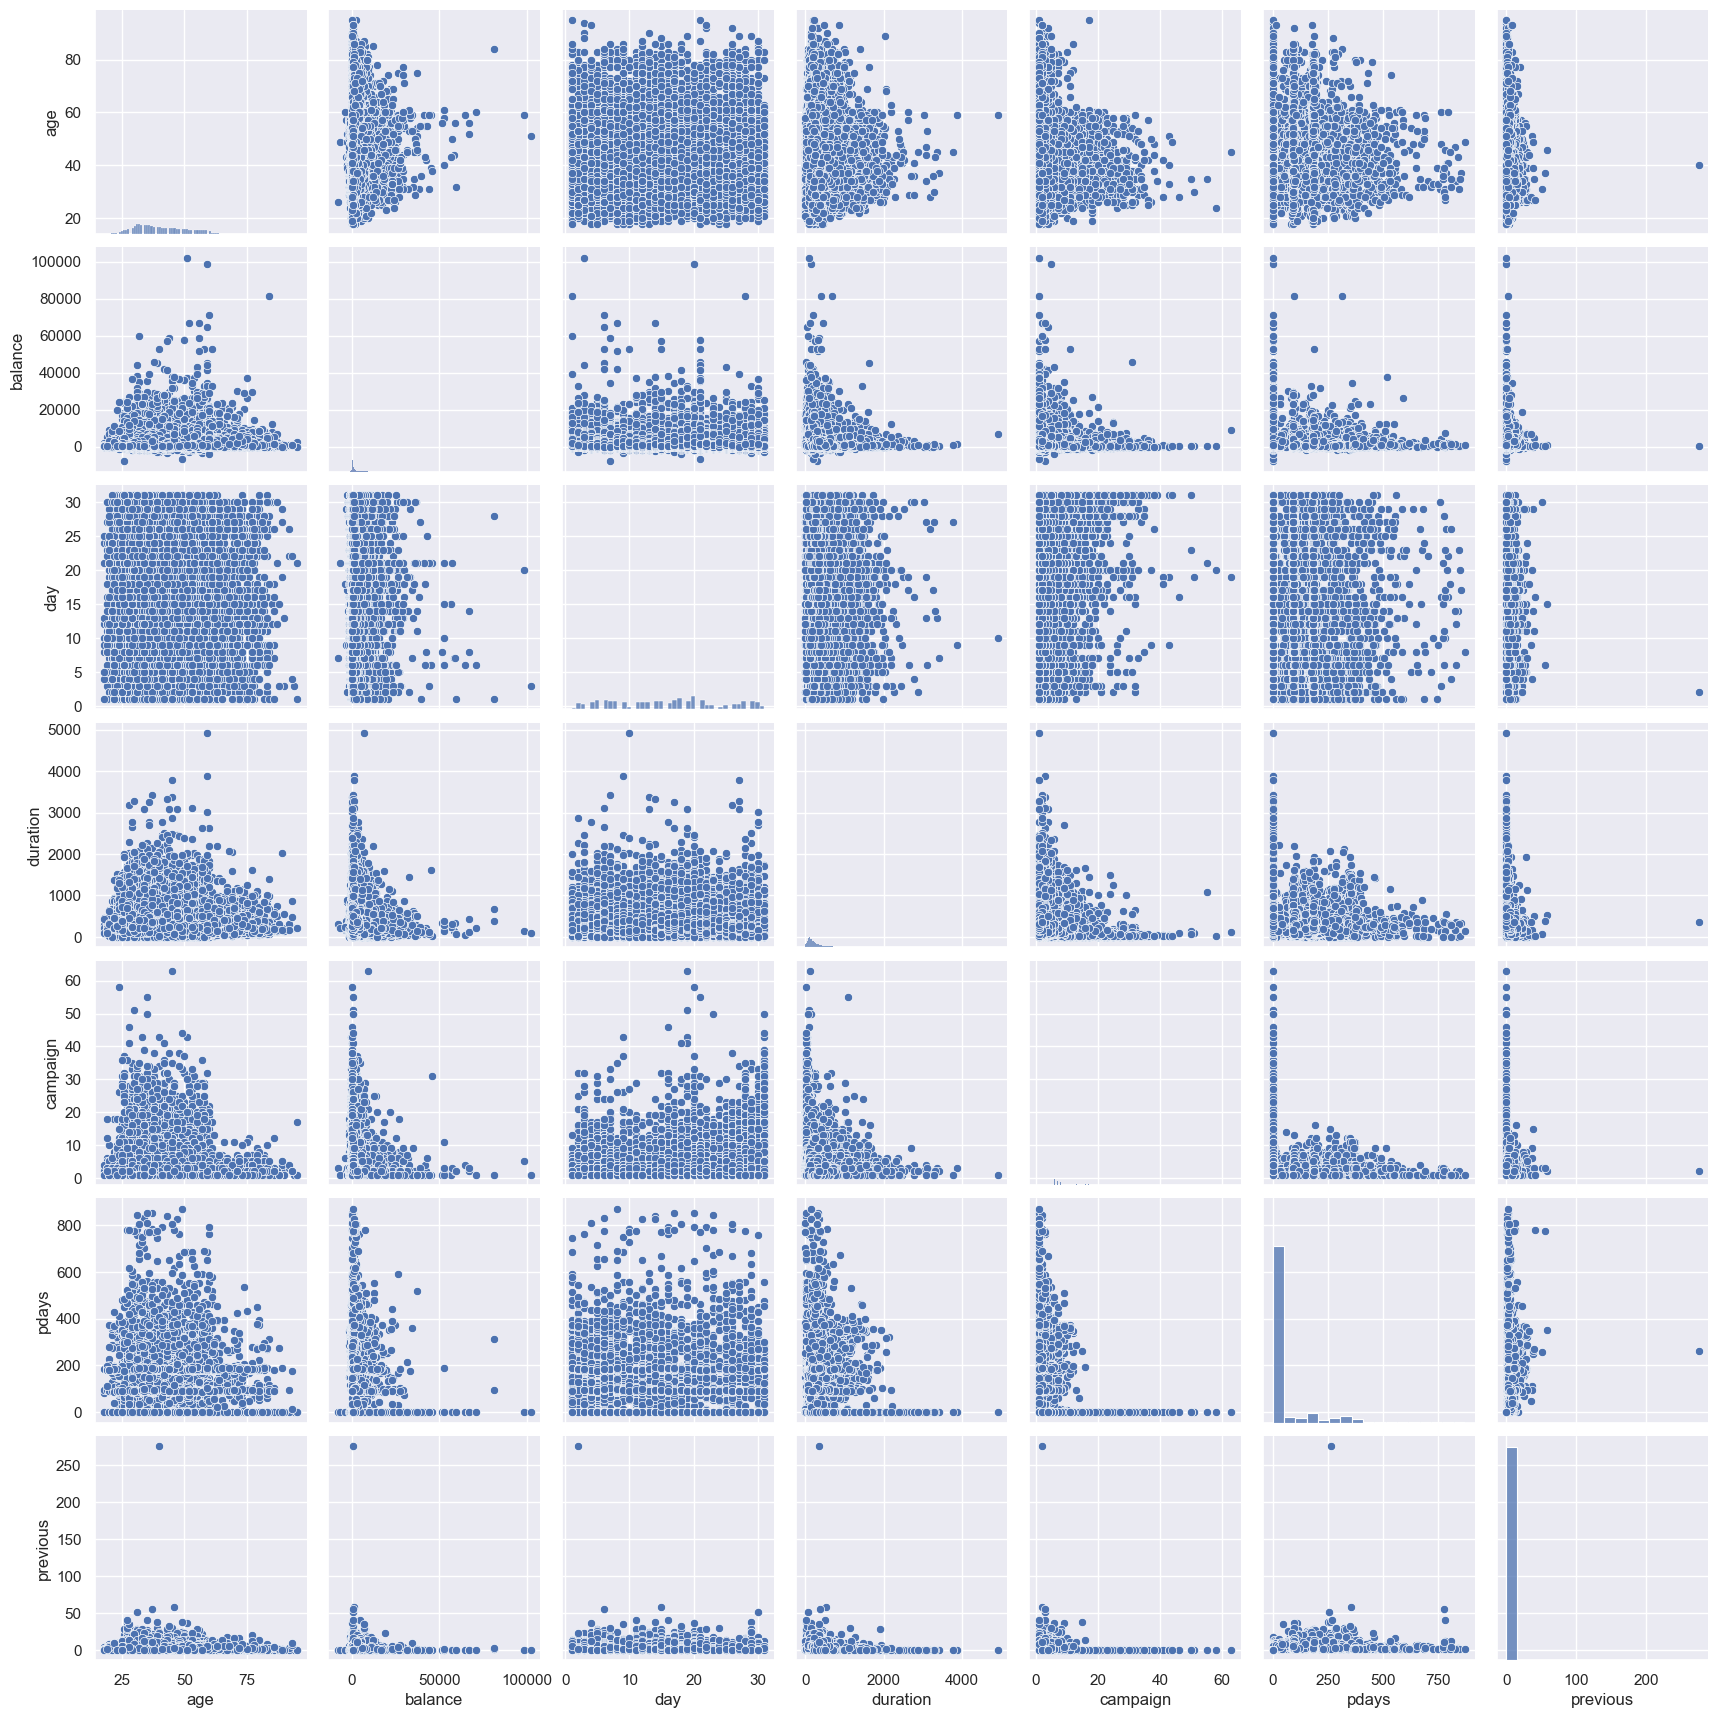

In [38]:
sns.pairplot(capstone1, size=2.5);

Observation: 
The outliers in the charts above are relatively insignificant. There also does not seem to be a strong relationship between any of the varibales

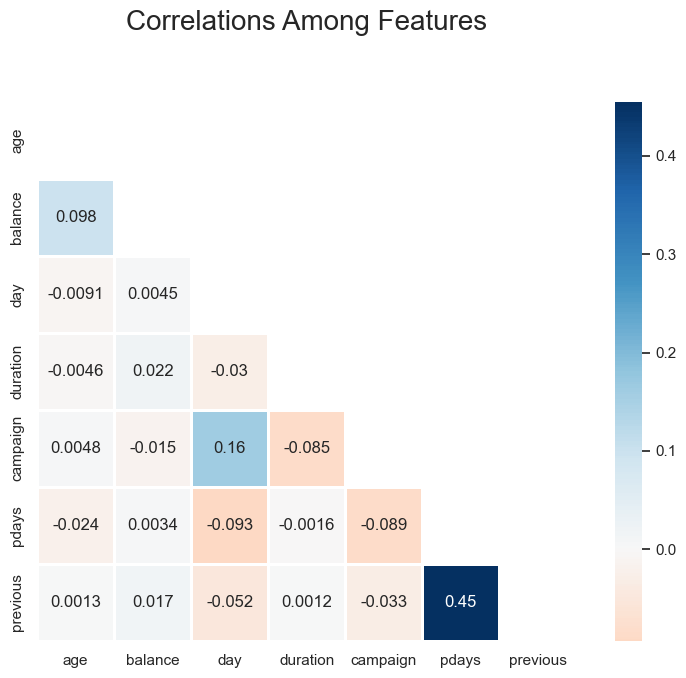

In [81]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(capstone.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (10,7))
sns.heatmap(capstone.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

Observation: There also does not seem to be a strong relationship between any of the varibales

# MACHINE LEARNING

# Feature Engineering

Data Pre-Processing

In [40]:
categorical = []
numerical = []

for i in capstone1.columns:
    if capstone1[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)
        
print(categorical, numerical, sep='\n\n\n')

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit', 'age_group', 'pmonths', 'duratmins']


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# Using the column 'default' for the first supervised learning model

In [41]:
capstone2=capstone1.copy()


In [42]:
#Transfrom 'default' column into numerical attributes
#We will assign default no=0 and yes=1

capstone2['default'] = capstone1['default'].map({'yes': 1, 'no': 0})
capstone2['default']

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: default, Length: 45211, dtype: int64

In [43]:
capstone2.drop(['age_group'], axis=1, inplace=True)

In [44]:
capstone2.drop(['pmonths'], axis=1, inplace=True)

In [45]:
capstone2.drop(['duratmins'], axis=1, inplace=True)

Splitting the data

In [46]:
#Selecting independent and dependent features

X = capstone2.drop(['default'], axis=1)
y = capstone2['default']

# Train-Test Split - Default

In [47]:
# Import algorithms


from sklearn.model_selection import  cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 16)
(9043, 16)
(36168,)
(9043,)


In [49]:
# Next, let us encode our categorical variables using one hot encoding

# Apply pd.get_dummies on training and test data

X_train = pd.get_dummies(X_train, columns=['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'])
X_test = pd.get_dummies(X_test, columns=['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'])

# Align the columns of the encoded test set with the columns of the encoded training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [50]:
display(X_train.head())
display(X_test.head())

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
3344    41      849   15        72         1     -1         0           0   
17965   49     1415   30       269         2     -1         0           0   
18299   42     3842   31       130         4     -1         0           1   
10221   37     -119   11       375        11     -1         0           0   
32192   56     3498   15       264         2     -1         0           0   

       job_blue-collar  job_entrepreneur  ...  month_mar  month_may  \
3344                 1                 0  ...          0          1   
17965                0                 0  ...          0          0   
18299                0                 0  ...          0          0   
10221                0                 0  ...          0          0   
32192                1                 0  ...          0          0   

       month_nov  month_oct  month_sep  poutcome_failure  poutcome_success  \
3344           0          0          0                 0                 0   
17965          0          0          0                 0                 0   
18299          0          0          0                 0                 0   
10221          0          0          0                 0                 0   
32192          0          0          0                 0                 0   

       poutcome_unknown  deposit_no  deposit_yes  
3344                  1           1            0  
17965                 1           1            0  
18299                 1           1            0  
10221                 1           1            0  
32192                 1           0            1  

[5 rows x 48 columns]

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
3776    40      580   16       192         1     -1         0           0   
9928    47     3644    9        83         2     -1         0           0   
33409   25      538   20       226         1     -1         0           0   
31885   42     1773    9       311         1    336         1           0   
15738   56      217   21       121         2     -1         0           0   

       job_blue-collar  job_entrepreneur  ...  month_mar  month_may  \
3776                 1                 0  ...          0          1   
9928                 0                 0  ...          0          0   
33409                0                 0  ...          0          0   
31885                0                 0  ...          0          0   
15738                0                 0  ...          0          0   

       month_nov  month_oct  month_sep  poutcome_failure  poutcome_success  \
3776           0          0          0                 0                 0   
9928           0          0          0                 0                 0   
33409          0          0          0                 0                 0   
31885          0          0          0                 1                 0   
15738          0          0          0                 0                 0   

       poutcome_unknown  deposit_no  deposit_yes  
3776                  1           1            0  
9928                  1           1            0  
33409                 1           1            0  
31885                 0           1            0  
15738                 1           1            0  

[5 rows x 48 columns]

Feature Scaling

In [51]:
# Robust Scaler is preferred here as it is more robust to outliers

from sklearn.preprocessing import RobustScaler

X_train[list(X_train.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_train[list(X_train.select_dtypes(exclude=['object']).columns)])
X_test[list(X_test.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_test[list(X_test.select_dtypes(exclude=['object']).columns)])


# scaler = RobustScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [52]:
display(X_train.head())
display(X_test.head())

age   balance       day  duration  campaign  pdays  previous  \
3344   0.133333  0.295806 -0.076923 -0.502326      -0.5    0.0       0.0   
17965  0.666667  0.712288  1.076923  0.413953       0.0    0.0       0.0   
18299  0.200000  2.498160  1.153846 -0.232558       1.0    0.0       0.0   
10221 -0.133333 -0.416483 -0.384615  0.906977       4.5    0.0       0.0   
32192  1.133333  2.245033 -0.076923  0.390698       0.0    0.0       0.0   

       job_admin.  job_blue-collar  job_entrepreneur  ...  month_mar  \
3344          0.0              1.0               0.0  ...        0.0   
17965         0.0              0.0               0.0  ...        0.0   
18299         1.0              0.0               0.0  ...        0.0   
10221         0.0              0.0               0.0  ...        0.0   
32192         0.0              1.0               0.0  ...        0.0   

       month_may  month_nov  month_oct  month_sep  poutcome_failure  \
3344         1.0        0.0        0.0        0.0               0.0   
17965        0.0        0.0        0.0        0.0               0.0   
18299        0.0        0.0        0.0        0.0               0.0   
10221        0.0        0.0        0.0        0.0               0.0   
32192        0.0        0.0        0.0        0.0               0.0   

       poutcome_success  poutcome_unknown  deposit_no  deposit_yes  
3344                0.0               0.0         0.0          0.0  
17965               0.0               0.0         0.0          0.0  
18299               0.0               0.0         0.0          0.0  
10221               0.0               0.0         0.0          0.0  
32192               0.0               0.0        -1.0          1.0  

[5 rows x 48 columns]

age   balance       day  duration  campaign  pdays  previous  \
3776   0.066667  0.094276  0.000000  0.046083      -0.5    0.0       0.0   
9928   0.533333  2.386831 -0.538462 -0.456221       0.0    0.0       0.0   
33409 -0.933333  0.062851  0.307692  0.202765      -0.5    0.0       0.0   
31885  0.200000  0.986906 -0.538462  0.594470      -0.5  337.0       1.0   
15738  1.133333 -0.177329  0.384615 -0.281106       0.0    0.0       0.0   

       job_admin.  job_blue-collar  job_entrepreneur  ...  month_mar  \
3776          0.0              1.0               0.0  ...        0.0   
9928          0.0              0.0               0.0  ...        0.0   
33409         0.0              0.0               0.0  ...        0.0   
31885         0.0              0.0               0.0  ...        0.0   
15738         0.0              0.0               0.0  ...        0.0   

       month_may  month_nov  month_oct  month_sep  poutcome_failure  \
3776         1.0        0.0        0.0        0.0               0.0   
9928         0.0        0.0        0.0        0.0               0.0   
33409        0.0        0.0        0.0        0.0               0.0   
31885        0.0        0.0        0.0        0.0               1.0   
15738        0.0        0.0        0.0        0.0               0.0   

       poutcome_success  poutcome_unknown  deposit_no  deposit_yes  
3776                0.0               0.0         0.0          0.0  
9928                0.0               0.0         0.0          0.0  
33409               0.0               0.0         0.0          0.0  
31885               0.0              -1.0         0.0          0.0  
15738               0.0               0.0         0.0          0.0  

[5 rows x 48 columns]

In [53]:
print(X_train.shape)
print(X_test.shape)

(36168, 48)
(9043, 48)


# Model Selections

Classifier: Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      8905
           1       0.06      0.16      0.08       138

    accuracy                           0.95      9043
   macro avg       0.52      0.56      0.53      9043
weighted avg       0.97      0.95      0.96      9043



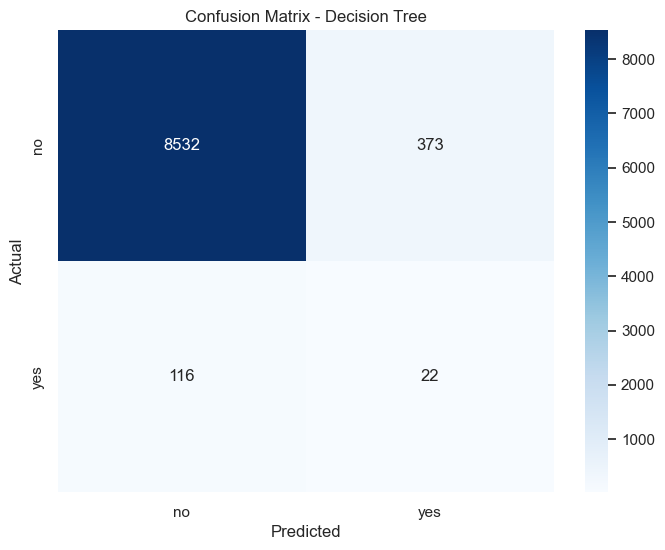





Classifier: K-Nearest Neighbors

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8905
           1       0.00      0.00      0.00       138

    accuracy                           0.98      9043
   macro avg       0.49      0.50      0.50      9043
weighted avg       0.97      0.98      0.98      9043



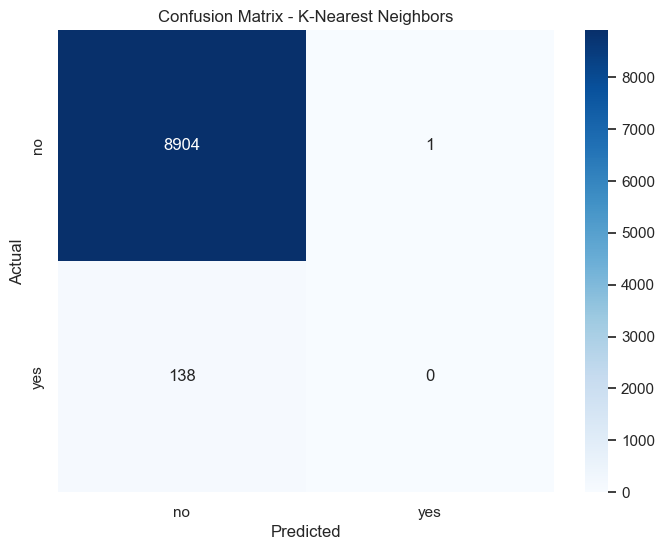





Classifier: Support Vector Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8905
           1       0.00      0.00      0.00       138

    accuracy                           0.98      9043
   macro avg       0.49      0.50      0.50      9043
weighted avg       0.97      0.98      0.98      9043



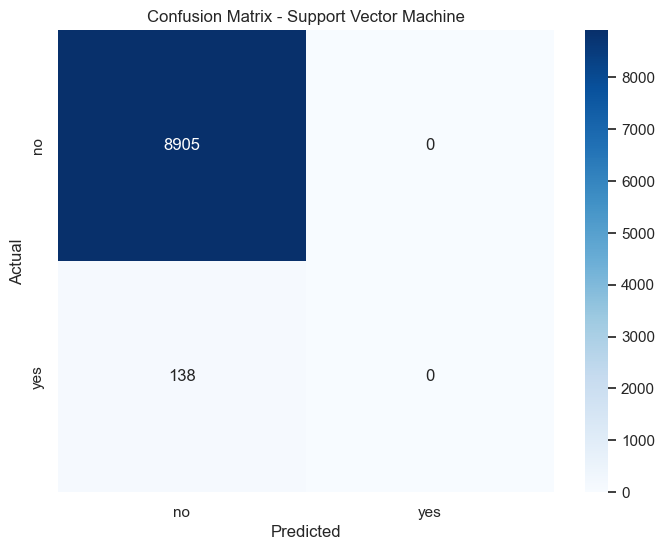





Classifier: Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8905
           1       0.14      0.01      0.01       138

    accuracy                           0.98      9043
   macro avg       0.56      0.50      0.50      9043
weighted avg       0.97      0.98      0.98      9043



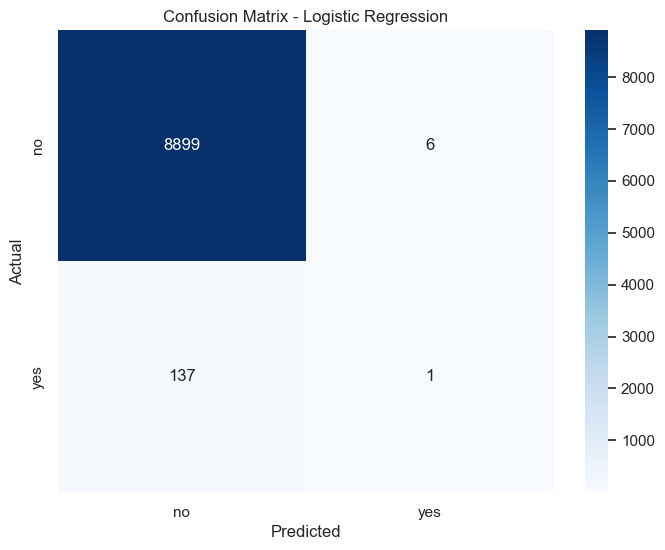





Classifier: Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8905
           1       0.00      0.00      0.00       138

    accuracy                           0.98      9043
   macro avg       0.49      0.50      0.50      9043
weighted avg       0.97      0.98      0.98      9043



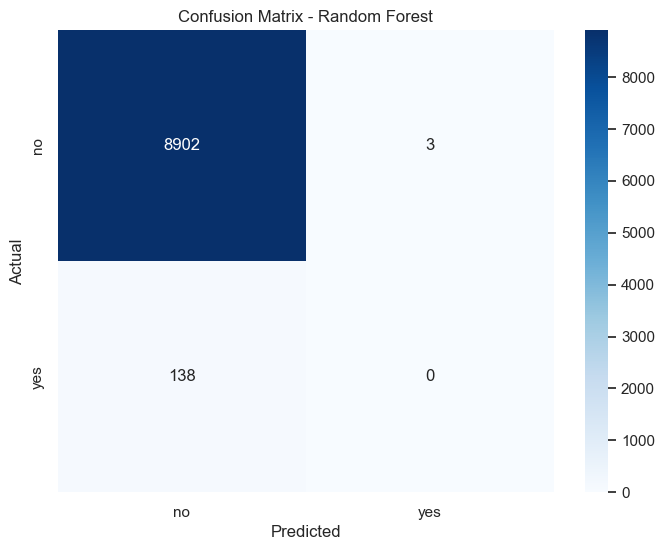





Classifier: Naive Bayes

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.28      0.43      8905
           1       0.02      0.93      0.04       138

    accuracy                           0.29      9043
   macro avg       0.51      0.61      0.23      9043
weighted avg       0.98      0.29      0.43      9043



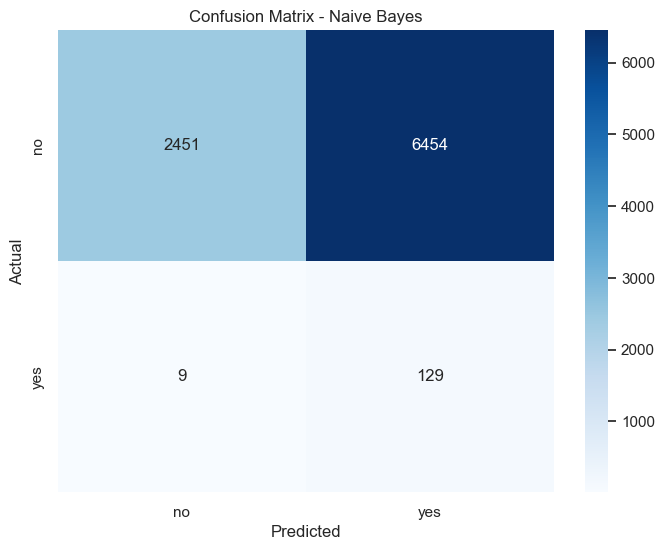





Classifier: Gradient Boosting Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8905
           1       0.08      0.01      0.01       138

    accuracy                           0.98      9043
   macro avg       0.53      0.50      0.50      9043
weighted avg       0.97      0.98      0.98      9043



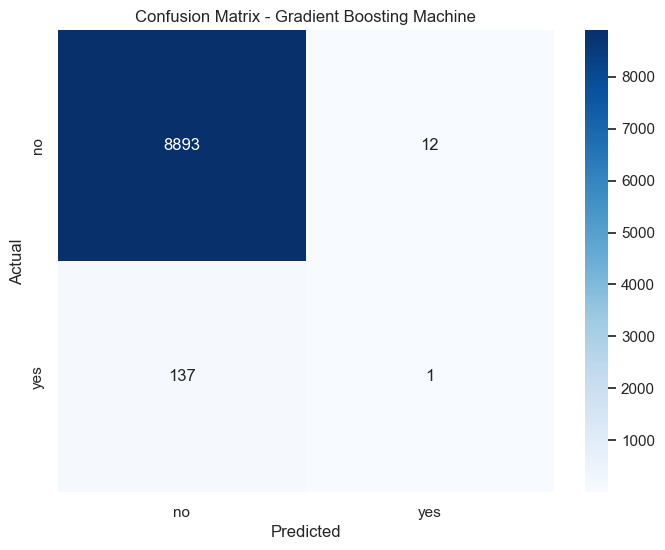





Classifier: XGBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8905
           1       0.08      0.03      0.04       138

    accuracy                           0.98      9043
   macro avg       0.53      0.51      0.52      9043
weighted avg       0.97      0.98      0.98      9043



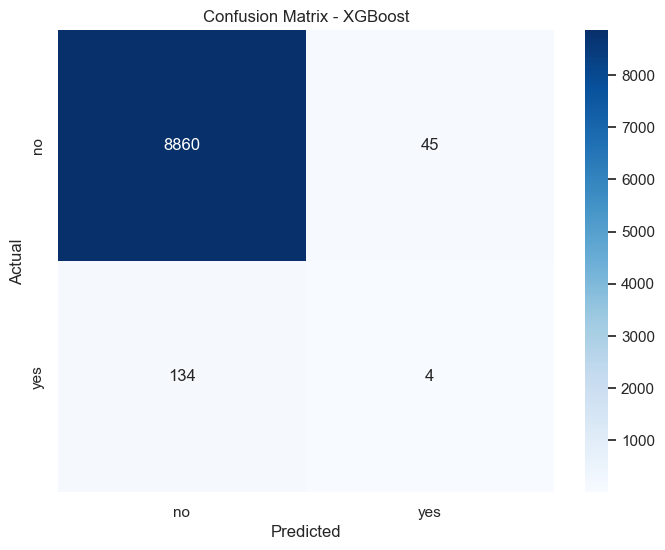

In [65]:
classifiers = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (SVC(), "Support Vector Machine"),
    (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(), "Random Forest"),
    (GaussianNB(), "Naive Bayes"),
    (GradientBoostingClassifier(), "Gradient Boosting Machine"),
    (xgb.XGBClassifier(), "XGBoost")
]

# Iterate through the list of classifiers
for classifier, name in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Print the classifier's name
    print("Classifier:", name)
    
    # Print the classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    
  
    
    # Create Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plotting the confusion matrix with colors
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['no','yes'], yticklabels=['no','yes'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Add a separator for clarity
    
    print("="*100)
    print('\n\n\n')

In [66]:

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


for classifier, name in classifiers:
    y_pred = classifier.predict(X_test)  # Replace X_test with your test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision,
                                    'Recall': recall, 'F1-Score': f1}, ignore_index=True)
    metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

display(metrics_df)
    
    


Model  Accuracy  Precision    Recall  F1-Score
0     Support Vector Machine  0.984740   0.969712  0.984740  0.977168
1        K-Nearest Neighbors  0.984629   0.969710  0.984629  0.977113
2        Logistic Regression  0.984187   0.971989  0.984187  0.977101
3              Random Forest  0.984408   0.969707  0.984408  0.977002
4  Gradient Boosting Machine  0.983523   0.970973  0.983523  0.976761
7                    XGBoost  0.980206   0.971314  0.980206  0.975544
5              Decision Tree  0.945925   0.972381  0.945925  0.958566
6                Naive Bayes  0.285304   0.981436  0.285304  0.425328

In [67]:
importances = classifier.feature_importances_

feature_names = X_train.columns  # Replace with the actual feature names or column labels
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                Feature  Importance
1               balance    0.063458
43     poutcome_failure    0.031558
24           housing_no    0.028785
8       job_blue-collar    0.028455
10        job_housemaid    0.028451
31            month_apr    0.027805
29    contact_telephone    0.026222
13    job_self-employed    0.025879
14         job_services    0.025368
39            month_may    0.025326
26              loan_no    0.025196
11       job_management    0.025079
37            month_jun    0.024909
22  education_secondary    0.024715
0                   age    0.024621
5                 pdays    0.024578
4              campaign    0.023324
40            month_nov    0.023198
46           deposit_no    0.023049
36            month_jul    0.022957
35            month_jan    0.022762
3              duration    0.022536
9      job_entrepreneur    0.022296
2                   day    0.022211
7            job_admin.    0.022078
16       job_technician    0.021712
18     marital_divorced    0

Oservation:

The SVM ( Support Vector Machine) is the best Metrix to use to predict the future probability of Loan default in Nexus Bank. This is based on F1 score of 0.97 and Accuracy of 0.98. We are also able to note that current account balance is the feature that has the highest effect on loan default. This is followed by the failure of the previous marketing campaign (poutcome). Here, Nexus Bank should be focus more on the true positives to ensure low default rate is maintained. It is also important to note that the high number of True Positives is as a result of the original data having more customers not defauting on thier loans (96.20%)

# Using the column 'deposit' for the second supervised learning model

In [68]:
capstone3=capstone.copy()

In [69]:
#Transfrom 'deposit' column into numerical attributes
#We will assign default no=0 and yes=1

capstone3['deposit'] = capstone3['deposit'].map({'no': 0 ,'yes': 1 })
capstone3['deposit']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: deposit, Length: 45211, dtype: int64

Splitting data

In [70]:
#Selecting independent and dependent features

X1 = capstone3.drop(['deposit'], axis=1)
y1 = capstone3['deposit']

# Train-Test Split - Deposit

In [71]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2, random_state=42)

print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(36168, 16)
(9043, 16)
(36168,)
(9043,)


In [72]:
# Next, let us encode our categorical variables using one hot encoding

# Apply pd.get_dummies on training and test data

X1_train = pd.get_dummies(X1_train, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
X1_test = pd.get_dummies(X1_test, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

# Align the columns of the encoded test set with the columns of the encoded training set
X1_test = X1_test.reindex(columns=X1_train.columns, fill_value=0)

In [73]:
display(X1_train.head())
display(X1_test.head())

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
3344    41      849   15        72         1     -1         0           0   
17965   49     1415   30       269         2     -1         0           0   
18299   42     3842   31       130         4     -1         0           1   
10221   37     -119   11       375        11     -1         0           0   
32192   56     3498   15       264         2     -1         0           0   

       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
3344                 1                 0  ...          0          0   
17965                0                 0  ...          0          0   
18299                0                 0  ...          0          0   
10221                0                 0  ...          1          0   
32192                1                 0  ...          0          0   

       month_may  month_nov  month_oct  month_sep  poutcome_failure  \
3344           1          0          0          0                 0   
17965          0          0          0          0                 0   
18299          0          0          0          0                 0   
10221          0          0          0          0                 0   
32192          0          0          0          0                 0   

       poutcome_other  poutcome_success  poutcome_unknown  
3344                0                 0                 1  
17965               0                 0                 1  
18299               0                 0                 1  
10221               0                 0                 1  
32192               0                 0                 1  

[5 rows x 51 columns]

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
3776    40      580   16       192         1     -1         0           0   
9928    47     3644    9        83         2     -1         0           0   
33409   25      538   20       226         1     -1         0           0   
31885   42     1773    9       311         1    336         1           0   
15738   56      217   21       121         2     -1         0           0   

       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
3776                 1                 0  ...          0          0   
9928                 0                 0  ...          1          0   
33409                0                 0  ...          0          0   
31885                0                 0  ...          0          0   
15738                0                 0  ...          0          0   

       month_may  month_nov  month_oct  month_sep  poutcome_failure  \
3776           1          0          0          0                 0   
9928           0          0          0          0                 0   
33409          0          0          0          0                 0   
31885          0          0          0          0                 1   
15738          0          0          0          0                 0   

       poutcome_other  poutcome_success  poutcome_unknown  
3776                0                 0                 1  
9928                0                 0                 1  
33409               0                 0                 1  
31885               0                 0                 0  
15738               0                 0                 1  

[5 rows x 51 columns]

Feature Scaling

In [74]:
# Robust Scaler is preferred here as it is more robust to outliers

from sklearn.preprocessing import RobustScaler

X1_train[list(X1_train.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X1_train[list(X1_train.select_dtypes(exclude=['object']).columns)])
X1_test[list(X1_test.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X1_test[list(X1_test.select_dtypes(exclude=['object']).columns)])


# scaler = RobustScaler()

# X1_train = scaler.fit_transform(X_train)
# X1_test = scaler.fit_transform(X_test)

In [75]:
display(X1_train.head())
display(X1_test.head())

age   balance       day  duration  campaign  pdays  previous  \
3344   0.133333  0.295806 -0.076923 -0.502326      -0.5    0.0       0.0   
17965  0.666667  0.712288  1.076923  0.413953       0.0    0.0       0.0   
18299  0.200000  2.498160  1.153846 -0.232558       1.0    0.0       0.0   
10221 -0.133333 -0.416483 -0.384615  0.906977       4.5    0.0       0.0   
32192  1.133333  2.245033 -0.076923  0.390698       0.0    0.0       0.0   

       job_admin.  job_blue-collar  job_entrepreneur  ...  month_jun  \
3344          0.0              1.0               0.0  ...        0.0   
17965         0.0              0.0               0.0  ...        0.0   
18299         1.0              0.0               0.0  ...        0.0   
10221         0.0              0.0               0.0  ...        1.0   
32192         0.0              1.0               0.0  ...        0.0   

       month_mar  month_may  month_nov  month_oct  month_sep  \
3344         0.0        1.0        0.0        0.0        0.0   
17965        0.0        0.0        0.0        0.0        0.0   
18299        0.0        0.0        0.0        0.0        0.0   
10221        0.0        0.0        0.0        0.0        0.0   
32192        0.0        0.0        0.0        0.0        0.0   

       poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
3344                0.0             0.0               0.0               0.0  
17965               0.0             0.0               0.0               0.0  
18299               0.0             0.0               0.0               0.0  
10221               0.0             0.0               0.0               0.0  
32192               0.0             0.0               0.0               0.0  

[5 rows x 51 columns]

age   balance       day  duration  campaign  pdays  previous  \
3776   0.066667  0.094276  0.000000  0.046083      -0.5    0.0       0.0   
9928   0.533333  2.386831 -0.538462 -0.456221       0.0    0.0       0.0   
33409 -0.933333  0.062851  0.307692  0.202765      -0.5    0.0       0.0   
31885  0.200000  0.986906 -0.538462  0.594470      -0.5  337.0       1.0   
15738  1.133333 -0.177329  0.384615 -0.281106       0.0    0.0       0.0   

       job_admin.  job_blue-collar  job_entrepreneur  ...  month_jun  \
3776          0.0              1.0               0.0  ...        0.0   
9928          0.0              0.0               0.0  ...        1.0   
33409         0.0              0.0               0.0  ...        0.0   
31885         0.0              0.0               0.0  ...        0.0   
15738         0.0              0.0               0.0  ...        0.0   

       month_mar  month_may  month_nov  month_oct  month_sep  \
3776         0.0        1.0        0.0        0.0        0.0   
9928         0.0        0.0        0.0        0.0        0.0   
33409        0.0        0.0        0.0        0.0        0.0   
31885        0.0        0.0        0.0        0.0        0.0   
15738        0.0        0.0        0.0        0.0        0.0   

       poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
3776                0.0             0.0               0.0               0.0  
9928                0.0             0.0               0.0               0.0  
33409               0.0             0.0               0.0               0.0  
31885               1.0             0.0               0.0              -1.0  
15738               0.0             0.0               0.0               0.0  

[5 rows x 51 columns]

In [76]:
print(X1_train.shape)
print(X1_test.shape)

(36168, 51)
(9043, 51)


# Model Selection

Classifier: Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.49      0.50      0.49      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



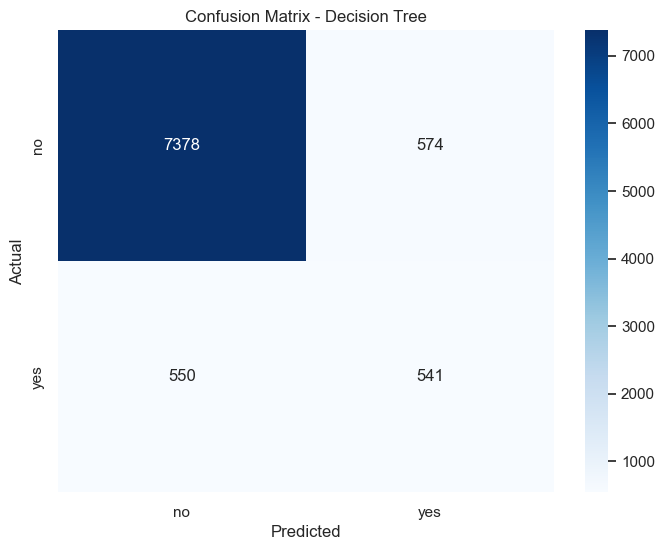





Classifier: K-Nearest Neighbors

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.60      0.34      0.43      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.65      0.69      9043
weighted avg       0.88      0.89      0.88      9043



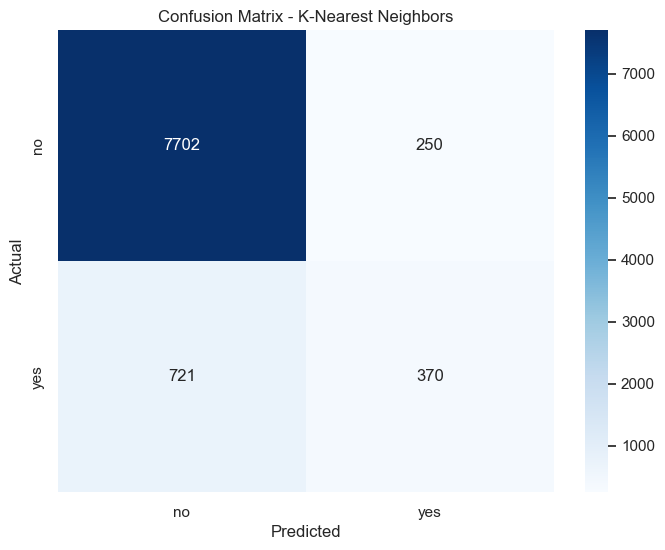





Classifier: Support Vector Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



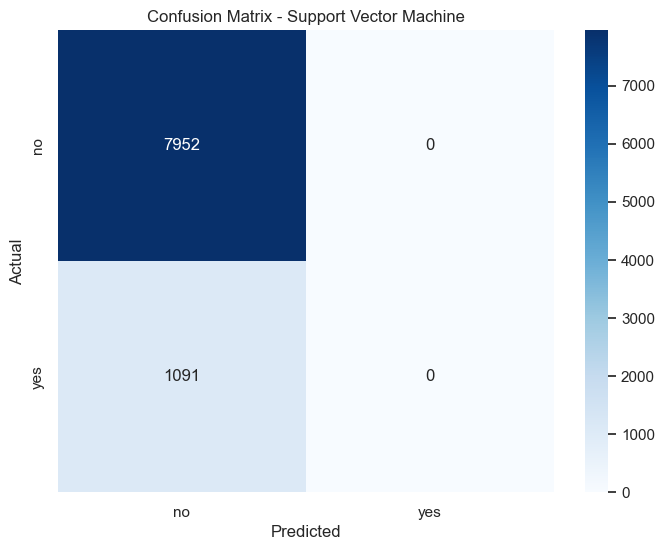





Classifier: Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.65      0.34      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



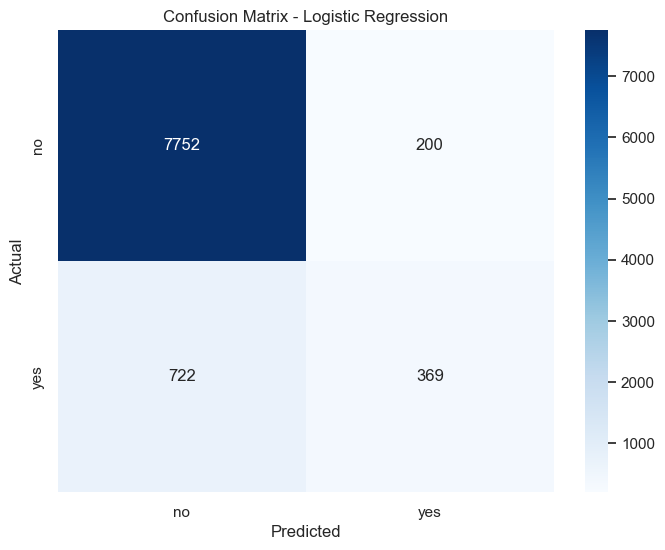





Classifier: Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



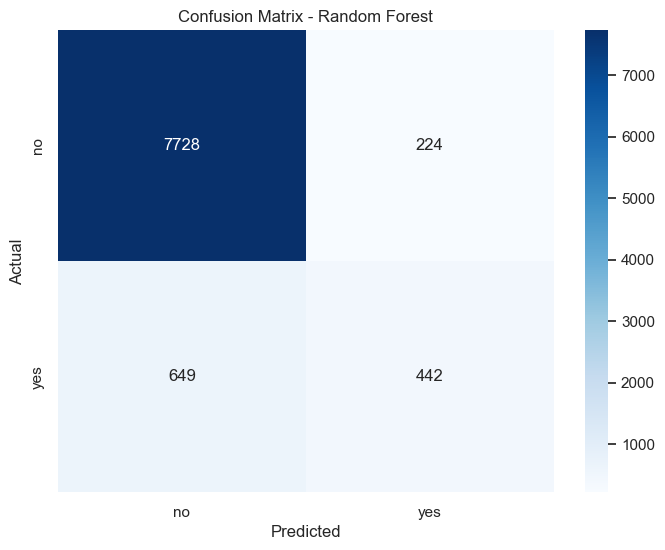





Classifier: Naive Bayes

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7952
           1       0.39      0.51      0.44      1091

    accuracy                           0.85      9043
   macro avg       0.66      0.70      0.68      9043
weighted avg       0.87      0.85      0.85      9043



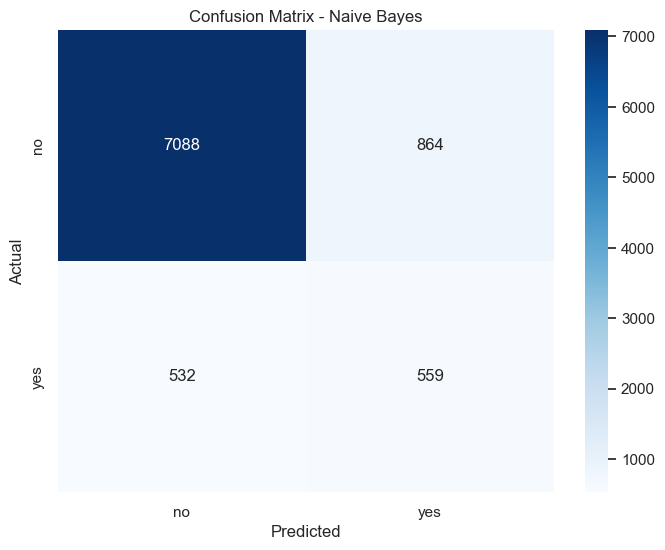





Classifier: Gradient Boosting Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.42      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043



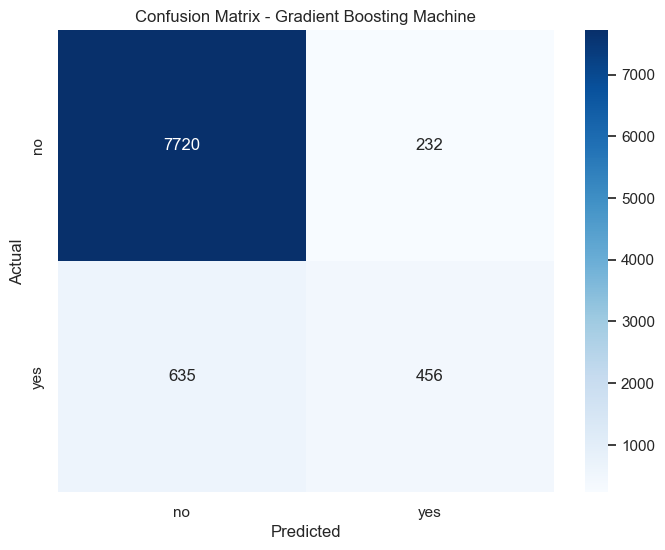





Classifier: XGBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7952
           1       0.66      0.49      0.57      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.73      0.76      9043
weighted avg       0.90      0.91      0.90      9043



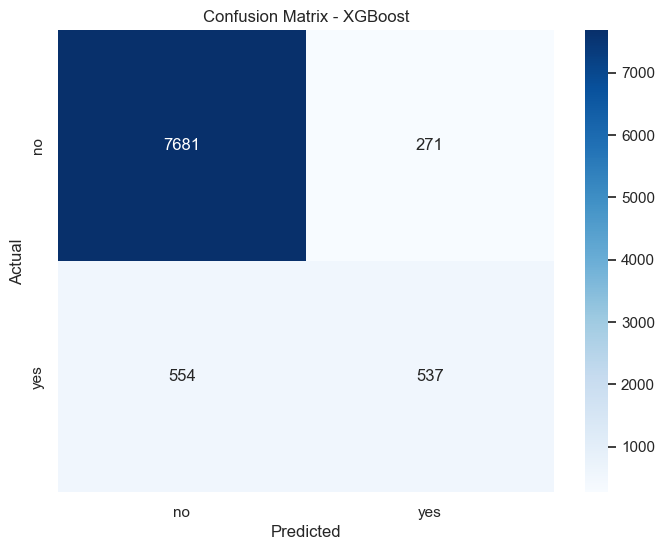

In [77]:
classifiers = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (SVC(), "Support Vector Machine"),
    (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(), "Random Forest"),
    (GaussianNB(), "Naive Bayes"),
    (GradientBoostingClassifier(), "Gradient Boosting Machine"),
    (xgb.XGBClassifier(), "XGBoost")
]

# Iterate through the list of classifiers
for classifier, name in classifiers:
    # Train the classifier
    classifier.fit(X1_train, y1_train)
    
    # Predict on the test set
    y1_pred = classifier.predict(X1_test)
    
    # Print the classifier's name
    print("Classifier:", name)
    
    # Print the classification report
    print("\nClassification Report:\n")
    print(classification_report(y1_test, y1_pred))
    
  
    
    # Create Confusion Matrix
    cm = confusion_matrix(y1_test, y1_pred)
    # Plotting the confusion matrix with colors
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['no','yes'], yticklabels=['no','yes'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Add a separator for clarity
    
    print("="*100)
    print('\n\n\n')

In [78]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


for classifier, name in classifiers:
    y1_pred = classifier.predict(X1_test)  # Replace X1_test with your test data
    accuracy = accuracy_score(y1_test, y1_pred)
    precision = precision_score(y1_test, y1_pred, average='weighted')
    recall = recall_score(y1_test, y1_pred, average='weighted')
    f1 = f1_score(y1_test, y1_pred, average='weighted')
    metrics_df = metrics_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision,
                                    'Recall': recall, 'F1-Score': f1}, ignore_index=True)
    metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

display(metrics_df)
    

Model  Accuracy  Precision    Recall  F1-Score
7                    XGBoost  0.908769   0.900378  0.908769  0.902769
0  Gradient Boosting Machine  0.904125   0.892484  0.904125  0.894450
1              Random Forest  0.903461   0.891295  0.903461  0.893042
2        Logistic Regression  0.898043   0.882671  0.898043  0.883632
3        K-Nearest Neighbors  0.892624   0.876081  0.892624  0.879389
4              Decision Tree  0.875705   0.876887  0.875705  0.876287
5                Naive Bayes  0.845626   0.865355  0.845626  0.854174
6     Support Vector Machine  0.879354   0.773264  0.879354  0.822904

In [79]:
importances = classifier.feature_importances_

feature_names = X1_train.columns  # Replace with the actual feature names or column labels
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                Feature  Importance
49     poutcome_success    0.219707
34      contact_unknown    0.088121
42            month_mar    0.050826
3              duration    0.042660
45            month_oct    0.039759
41            month_jun    0.038485
35            month_apr    0.031300
46            month_sep    0.030984
28           housing_no    0.030599
30              loan_no    0.024898
37            month_dec    0.023950
38            month_feb    0.022073
44            month_nov    0.021853
40            month_jul    0.019421
43            month_may    0.017319
39            month_jan    0.015799
36            month_aug    0.015716
8       job_blue-collar    0.015548
5                 pdays    0.014061
2                   day    0.013297
33    contact_telephone    0.012710
24   education_tertiary    0.011403
32     contact_cellular    0.011137
0                   age    0.010797
20      marital_married    0.009814
48       poutcome_other    0.009763
4              campaign    0

Observation:

The XGBoost is the best Metrix to use to predict the future probability of Deposit in Nexus Bank. This is based on F1 score of 0.90 and Accuracy of 0.90. We are also able to note that the success of the previous marketing campaign (poutcome) is the variable with the most effect on deposit. Here, Nexus Bank should focus more on the false negatives to drive the deposit. It is imperative to note that the high number of True Positives is due to the original data having more customers not subscribing to fixed deposit (86.30%).

# Un-Supervised Learning: Age and Account Balance

In [39]:
capstone1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'age_group', 'pmonths', 'duratmins'],
      dtype='object')

In [87]:
A= capstone.iloc[:, [0,5]]. values

In [88]:
A

array([[  58, 2143],
       [  44,   29],
       [  33,    2],
       ...,
       [  72, 5715],
       [  57,  668],
       [  37, 2971]], dtype=int64)

In [89]:
from sklearn.cluster import KMeans
wcss = []

In [90]:
for i in range (1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(A)
    wcss.append(kmeans.inertia_)

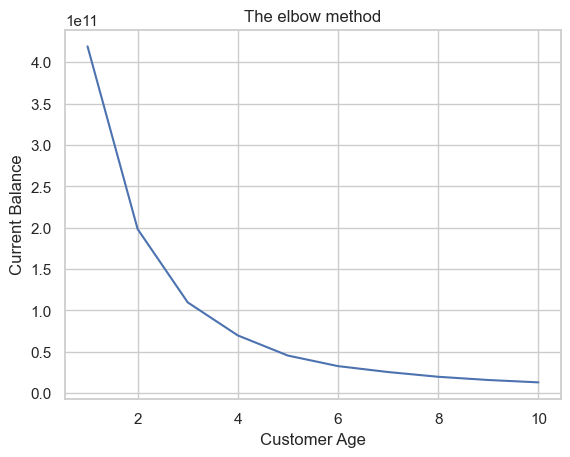

In [91]:
#to find the optimal number of clusters (elbow method)

plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Customer Age')
plt.ylabel('Current Balance')
plt.show()

In [92]:
kmeansmodel= KMeans(n_clusters = 5, init='k-means++', random_state=0)

In [93]:
y_kmeans = kmeansmodel.fit_predict(A)

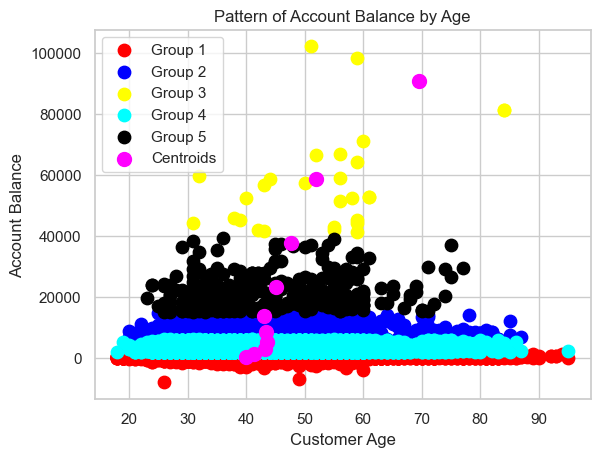

In [98]:
plt.scatter(A[y_kmeans == 0,0], A[y_kmeans == 0,1], s= 80, c= 'red', label= 'Group 1')
plt.scatter(A[y_kmeans == 1,0], A[y_kmeans == 1,1], s= 80, c= 'blue', label= 'Group 2')
plt.scatter(A[y_kmeans == 2,0], A[y_kmeans == 2,1], s= 80, c= 'yellow', label= 'Group 3')
plt.scatter(A[y_kmeans == 3,0], A[y_kmeans == 3,1], s= 80, c= 'cyan', label= 'Group 4')
plt.scatter(A[y_kmeans == 4,0], A[y_kmeans == 4,1], s= 80, c= 'black', label= 'Group 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='magenta', label = 'Centroids')
plt.title('Pattern of Account Balance by Age')
plt.xlabel('Customer Age')
plt.ylabel('Account Balance')
plt.legend()
plt.show()

Observation:
From the chart above, the top 5 customers with the highest balace are age 50 years an above. Majority of the account balance is from $40,000 and below. Also customers within the ages 25 years and below do not contribute significant value to the overall account balance at Nexus Bank.

Nexus Bank should focus on Group 3 to identify what is encouraging the customers to have an overall high deposit with the bank. This information can be used to engage customers in Groups 1, 2 and 4. 

# In Conclusion: 

1. The customers type with the highest number of accounts in the data set is the 'Adult' with an age range of 25 to 40 years old. The customers below 25 years old have the least number of accounts. This shows that Nexus bank has a market group that is yet to be mined. Efficient and effective market drive within this group will serve as a source of new deposits for the bank.

2. There may be an indication that the Nexus bank does not have customer/consumer friendly packages for Retirees and Students(2.1%).

3. There are obvious untapped potentials to source for new accounts from Entrepreneurs and the Self-employed. 

4. Are the interest rates for personal loans unattractive? Is there adequate awareness of the personal and housing loan products available to potential customers? There is an obvious lapse in the number of loan disbursed in Nexus bank. The bank should carry out strategic campaigns to focus on these issues. This is despite a low default rate of 1.80%. 

5. Compared to other financial institutions, are the fixed deposit rates unattractive? Is there adequate awareness? Nexus Bank should drill down to the reasons why the figures are low. Although The ideal ratio of fixed deposit (FD) investment to regular deposits in banks can vary depending on its financial goals, risk tolerance, and liquidity needs. There is no one-size-fits-all answer to this question as it depends on various factors. However, here are some general considerations to keep in mind such as Risk and Return, Liquidity needs as well asDiversification. Nexus Bank should also carry out investigations to find out what other banks are offering. Also aggressive marketing campaigns need to be carried out urgently to enable the bank improve subscription to the term deposits.

6.  Nexus bank needs to discuss the frequency of the campaigns and how the maximum time duration required to contact the customer after

7. Nexus bank may wish to set a maximum time for campaign calls to ensure efficiency and effective customer engagement.

8. Despite a 100% customer contact the failure and unknown outcome of the previous campaign accounts for 99% of the total figure. This may be an indication that the last campaign was not a success. Was there adequate awareness? Were effective marketing strategies deployed? What are the lessons learnt and way forward, this are the questions Nexus Bank needs to review.

9. As stated earlier, there are demographics Nexus Bank need to focus on such as young adults, enterprenuers, self-employed, retirees, primary school and tertiary school graduates. Adequate campaigns and agrresive marketing strategies should be deployed.

10. The job categories with the highest number of Housing loans are Blue-Collar(70.60%), Services(66.59%) and Admin (61.54%). The other job categories fall below 60%. According to Investopedia, the ideal loan to deposit ratio is between 80% to 90%. Nexus bank clearly falls below the bench mark. There is potential for growth in the Management category (49.40%), Self-Employed (54.58%) and Entrepreneur (58.44%). A growth in these categories will have a significant impact on the overall figure.

11. The un-employed, housemaid and students contribute the least (below N2MM). This is probably as a result of the nature of their sources of income. However, deposits by the self-employed and entrepreneurs is low. This is also reflected in the number of accounts opened by these categories. Nexus Bank obviously has a lot of work to do in terms of focusing on these areas to drive deposits.

12. The charts show that the last campaign was not a success. Success rate is less than 1%. This is also a reflection of the general overview. Nexus bank has to change the campaign strategies previously deployed. Aggressive marketing strategies and awareness should be used

13. It is imperative that Nexus Bank carries out continuous customer engagement during the course of the business year.

14. Thhe currenct campaign shows that customers have been contacted more than 2 times. This is a positive development. As there should be more customer awareness and a better success rate. However, there should be constant customer engagement through out the course of the business year regadless of campaigns being conducted.

15.  There is no strong relationship between the variables. The outliers in the charts are relatively insignificant. There also does not seem to be a strong relationship between any of the variables

16. The SVM ( Support Vector Machine) is the best Metrix to use to predict the future probability of Loan default in Nexus Bank. This is based on F1 score of 0.97 and Accuracy of 0.98. We are also able to note that current account balance is the feature that has the highest effect on loan default. This is followed by the failure of the previous marketing campaign (poutcome). Here, Nexus Bank should be focus more on the true positives to ensure low default rate is maintained. It is also important to note that the high number of True Positives is as a result of the original data having more customers not defauting on thier loans (96.20%)

17. The XGBoost is the best Metrix to use to predict the future probability of Deposit in Nexus Bank. This is based on F1 score of 0.90 and Accuracy of 0.90. We are also able to note that the success of the previous marketing campaign (poutcome) is the variable with the most effect on deposit. Here, Nexus Bank should focus more on the false negatives to drive the deposit. It is imperative to note that the high number of True Positives is due to the original data having more customers not subscribing to fixed deposit (86.30%).

18. the top 5 customers with the highest balace are age 50 years an above. Majority of the account balance is from $40,000 and below. Also customers within the ages 25 years and below do not contribute significant value to the overall account balance at Nexus Bank. Nexus Bank should focus on Group 3 to identify what is encouraging the customers to have an overall high deposit with the bank. This information can be used to engage customers in Groups 1, 2 and 4.

